In [31]:
import sys
!{sys.executable} -m pip install pandas
!pip install seaborn
!pip install plotly
!pip install scikit-learn
!pip install pandas numpy seaborn matplotlib plotly scikit-learn




In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder

In [35]:
# Load CSV files
diabetes_natural = pd.read_csv("diabetes_binary_health_indicators_BRFSS2015.csv")
diabetes_balanced = pd.read_csv("diabetes_binary_5050split_health_indicators_BRFSS2015.csv")
diabetes_three_types = pd.read_csv("diabetes_012_health_indicators_BRFSS2015.csv")

# Remove duplicates
diabetes_natural_clean = diabetes_natural.drop_duplicates()
diabetes_balanced_clean = diabetes_balanced.drop_duplicates()
diabetes_three_clean = diabetes_three_types.drop_duplicates()


In [54]:
def prepare_data_for_analysis(df, target_column):
    df = df.copy()
    
    if target_column == "Diabetes_012":
        df["Diabetes_Status"] = df[target_column].map({0: "No Diabetes", 1: "Prediabetes", 2: "Diabetes"})
    else:
        df["Diabetes_Status"] = df[target_column].map({0: "No Diabetes", 1: "Diabetes"})
    
    df["Gender"] = df["Sex"].map({0: "Female", 1: "Male"})
    df["High_Blood_Pressure"] = df["HighBP"].map({0: "No", 1: "Yes"})
    df["High_Cholesterol"] = df["HighChol"].map({0: "No", 1: "Yes"})
    df["Is_Smoker"] = df["Smoker"].map({0: "No", 1: "Yes"})
    df["Does_Exercise"] = df["PhysActivity"].map({0: "No", 1: "Yes"})
    
    # Age groups based on the coding (1-13 scale, where each represents ~5 years)
    df["Age_Group"] = pd.cut(df["Age"], bins=[0, 4, 8, 13], labels=["Young (18-44)", "Middle (45-64)", "Older (65+)"])
    
    # BMI categories
    df["Weight_Category"] = pd.cut(df["BMI"], bins=[0, 18.5, 25, 30, np.inf],
                                   labels=["Underweight", "Normal", "Overweight", "Obese"])
    
    # Education levels
    df["Education_Level"] = pd.cut(df["Education"], bins=[0, 2, 4, 6], labels=["Low", "Medium", "High"])
    
    return df

# Apply the function to all datasets
natural_ready = prepare_data_for_analysis(diabetes_natural_clean, "Diabetes_binary")
balanced_ready = prepare_data_for_analysis(diabetes_balanced_clean, "Diabetes_binary")
three_types_ready = prepare_data_for_analysis(diabetes_three_clean, "Diabetes_012")

# Let's explore the prepared data
print("=== PREPARED DATA OVERVIEW ===")
print(f"Natural dataset shape: {natural_ready.shape}")
print(f"Balanced dataset shape: {balanced_ready.shape}")
print(f"Three-types dataset shape: {three_types_ready.shape}")

print("\n=== NEW CATEGORICAL COLUMNS ===")
new_columns = ['Diabetes_Status', 'Gender', 'High_Blood_Pressure', 'High_Cholesterol', 
               'Is_Smoker', 'Does_Exercise', 'Age_Group', 'Weight_Category', 'Education_Level']

for col in new_columns:
    print(f"\n{col}:")
    print(natural_ready[col].value_counts())

print("\n=== SAMPLE OF PREPARED DATA ===")
print(natural_ready[new_columns].head())

# Check for any missing values in the new categorical columns
print("\n=== MISSING VALUES IN NEW COLUMNS ===")
for col in new_columns:
    missing = natural_ready[col].isnull().sum()
    if missing > 0:
        print(f"{col}: {missing} missing values")


=== PREPARED DATA OVERVIEW ===
Natural dataset shape: (229474, 31)
Balanced dataset shape: (69057, 31)
Three-types dataset shape: (229781, 31)

=== NEW CATEGORICAL COLUMNS ===

Diabetes_Status:
Diabetes_Status
No Diabetes    194377
Diabetes        35097
Name: count, dtype: int64

Gender:
Gender
Female    128715
Male      100759
Name: count, dtype: int64

High_Blood_Pressure:
High_Blood_Pressure
No     125214
Yes    104260
Name: count, dtype: int64

High_Cholesterol:
High_Cholesterol
No     128129
Yes    101345
Name: count, dtype: int64

Is_Smoker:
Is_Smoker
No     122585
Yes    106889
Name: count, dtype: int64

Does_Exercise:
Does_Exercise
Yes    168214
No      61260
Name: count, dtype: int64

Age_Group:
Age_Group
Older (65+)       112934
Middle (45-64)     81713
Young (18-44)      34827
Name: count, dtype: int64

Weight_Category:
Weight_Category
Overweight     81414
Normal         73635
Obese          71373
Underweight     3052
Name: count, dtype: int64

Education_Level:
Education_Lev

 DEMO: Normalized Bar Charts (All Percentage-Based)
Sample size: 2,407 records
Age groups: 13

 NORMALIZED VIEW (100% stacked with percentages):
 Percentage Crosstab:
Diabetes_Status  Diabetes  No Diabetes
Age_Group                             
18–24                 3.0         97.0
25–29                 4.7         95.3
30–34                 6.1         93.9
35–39                 9.7         90.3
40–44                12.9         87.1
45–49                16.7         83.3
50–54                21.8         78.2
55–59                27.6         72.4
60–64                34.5         65.5
65–69                42.8         57.2
70–74                51.9         48.1
75–79                61.8         38.2
80+                  70.0         30.0

Row sums (should all be 100%):
Age_Group
18–24    100.0
25–29    100.0
30–34    100.0
35–39    100.0
40–44    100.0
45–49    100.0
50–54    100.0
55–59    100.0
60–64    100.0
65–69    100.0
70–74    100.0
75–79    100.0
80+      100.0
dtype: floa

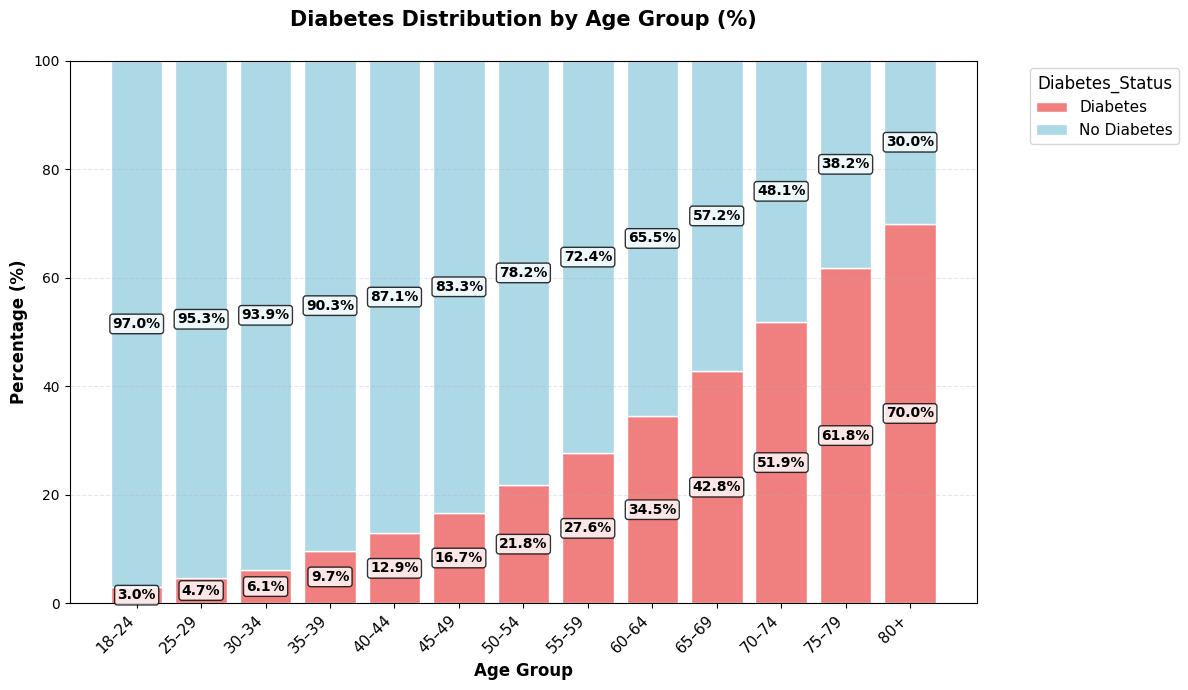


 DETAILED BREAKDOWN FOR DIABETES DISTRIBUTION BY AGE GROUP (%)

Counts by Age_Group:
Diabetes_Status  Diabetes  No Diabetes   All
Age_Group                                   
18–24                   6          196   202
25–29                   9          183   192
30–34                   7          107   114
35–39                  20          186   206
40–44                  22          149   171
45–49                  20          100   120
50–54                  44          158   202
55–59                  61          160   221
60–64                  60          114   174
65–69                  80          107   187
70–74                 112          104   216
75–79                 123           76   199
80+                   142           61   203
All                   706         1701  2407

Percentages within each Age_Group:

18–24 (n=202):
   • Diabetes: 6 (3.0%)
   • No Diabetes: 196 (97.0%)

25–29 (n=192):
   • Diabetes: 9 (4.7%)
   • No Diabetes: 183 (95.3%)

30–34 (n=114):
  

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def create_bar_chart(data, x_col, hue_col, title, xlabel, ylabel, normalize=True):
    # Always create crosstab and normalize by rows (each bar = 100%)
    ct = pd.crosstab(data[x_col], data[hue_col], normalize='index') * 100
    
    # Debug: Print the crosstab to verify percentages
    print(" Percentage Crosstab:")
    print(ct.round(1))
    print("\nRow sums (should all be 100%):")
    print(ct.sum(axis=1).round(1))
    
    # Create the plot using matplotlib directly
    fig, ax = plt.subplots(figsize=(12, 7))
    
    # Get unique categories and colors
    categories = ct.columns
    colors = ['lightcoral', 'lightblue', 'lightgreen', 'orange', 'purple'][:len(categories)]
    
    # Create stacked bars manually
    bottom = np.zeros(len(ct.index))
    
    for i, category in enumerate(categories):
        values = ct[category].values
        bars = ax.bar(range(len(ct.index)), values, bottom=bottom, 
                     label=category, color=colors[i], 
                     edgecolor='white', linewidth=1)
        
        # Add percentage labels on each segment - IMPROVED CALCULATION
        for j, (bar, value) in enumerate(zip(bars, values)):
            if value > 2:  # Show labels for segments > 2%
                height = bar.get_height()
                y_pos = bar.get_y() + height/2
                
                # Double-check the percentage value
                actual_pct = ct.iloc[j, i]  # Get the actual percentage from crosstab
                
                ax.text(bar.get_x() + bar.get_width()/2, y_pos, 
                       f'{actual_pct:.1f}%', ha='center', va='center',
                       color='black', fontweight='bold', fontsize=10,
                       bbox=dict(boxstyle="round,pad=0.2", facecolor='white', alpha=0.8))
        
        bottom += values
    
    # Set labels and formatting
    ax.set_xticks(range(len(ct.index)))
    ax.set_xticklabels(ct.index, rotation=45, ha='right', fontsize=11)
    ax.set_ylabel("Percentage (%)", fontsize=12, fontweight='bold')
    ax.set_ylim(0, 100)  # Standard 0-100% range
    ax.set_xlabel(xlabel, fontsize=12, fontweight='bold')
    ax.set_title(title, fontsize=15, fontweight='bold', pad=25)
    ax.legend(title=hue_col, bbox_to_anchor=(1.05, 1), loc='upper left',
             title_fontsize=12, fontsize=11)
    plt.grid(True, axis='y', linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # Print detailed statistics
    print(f"\n DETAILED BREAKDOWN FOR {title.upper()}")
    print("=" * 60)
    
    # Calculate and display statistics - NO GROUPBY HERE, just crosstab
    cross_tab = pd.crosstab(data[x_col], data[hue_col], margins=True)
    cross_tab_pct = pd.crosstab(data[x_col], data[hue_col], normalize='index') * 100
    
    print(f"\nCounts by {x_col}:")
    print(cross_tab)
    
    print(f"\nPercentages within each {x_col}:")
    for group in cross_tab_pct.index:
        if group != 'All':  # Skip the margin row
            total = cross_tab.loc[group, 'All']
            print(f"\n{group} (n={total}):")
            for category in cross_tab_pct.columns:
                count = cross_tab.loc[group, category]
                pct = cross_tab_pct.loc[group, category]
                print(f"   • {category}: {count} ({pct:.1f}%)")

# Demo function with sample data
def demo_enhanced_bar_chart():
    """
    Demonstrate the enhanced bar chart with sample data
    """
    np.random.seed(42)
    
    # Create sample diabetes data across detailed age groups
    age_groups = ["18–24", "25–29", "30–34", "35–39", "40–44",
                  "45–49", "50–54", "55–59", "60–64", "65–69",
                  "70–74", "75–79", "80+"]
    
    # Gradually increasing diabetes rates by age group
    diabetes_rates = [0.03, 0.05, 0.07, 0.10, 0.13,
                      0.17, 0.22, 0.28, 0.35, 0.43,
                      0.52, 0.62, 0.70]  # Increasing with age
    
    data_list = []
    for age_group, diabetes_rate in zip(age_groups, diabetes_rates):
        n_samples = np.random.randint(100, 250)  # Vary sample sizes
        n_diabetes = int(n_samples * diabetes_rate)
        n_no_diabetes = n_samples - n_diabetes
        
        # Create data
        for _ in range(n_diabetes):
            data_list.append({'Age_Group': age_group, 'Diabetes_Status': 'Diabetes'})
        for _ in range(n_no_diabetes):
            data_list.append({'Age_Group': age_group, 'Diabetes_Status': 'No Diabetes'})
    
    sample_data = pd.DataFrame(data_list)
    
    print(" DEMO: Normalized Bar Charts (All Percentage-Based)")
    print("=" * 55)
    print(f"Sample size: {len(sample_data):,} records")
    print(f"Age groups: {sample_data['Age_Group'].nunique()}")
    
    # All charts now show normalized percentages
    print(f"\n NORMALIZED VIEW (100% stacked with percentages):")
    create_bar_chart(sample_data, 'Age_Group', 'Diabetes_Status', 
                     'Diabetes Distribution by Age Group (%)', 
                     'Age Group', 'Percentage')
    
    return sample_data

# Example usage with your data (always normalized):
# create_bar_chart(natural_ready, 'Age_Group', 'Diabetes_Status', 
#                 'Diabetes Distribution by Age Group (%)', 
#                 'Age Group', 'Percentage')

# Run demo if executed directly
if __name__ == "__main__":
    demo_data = demo_enhanced_bar_chart()

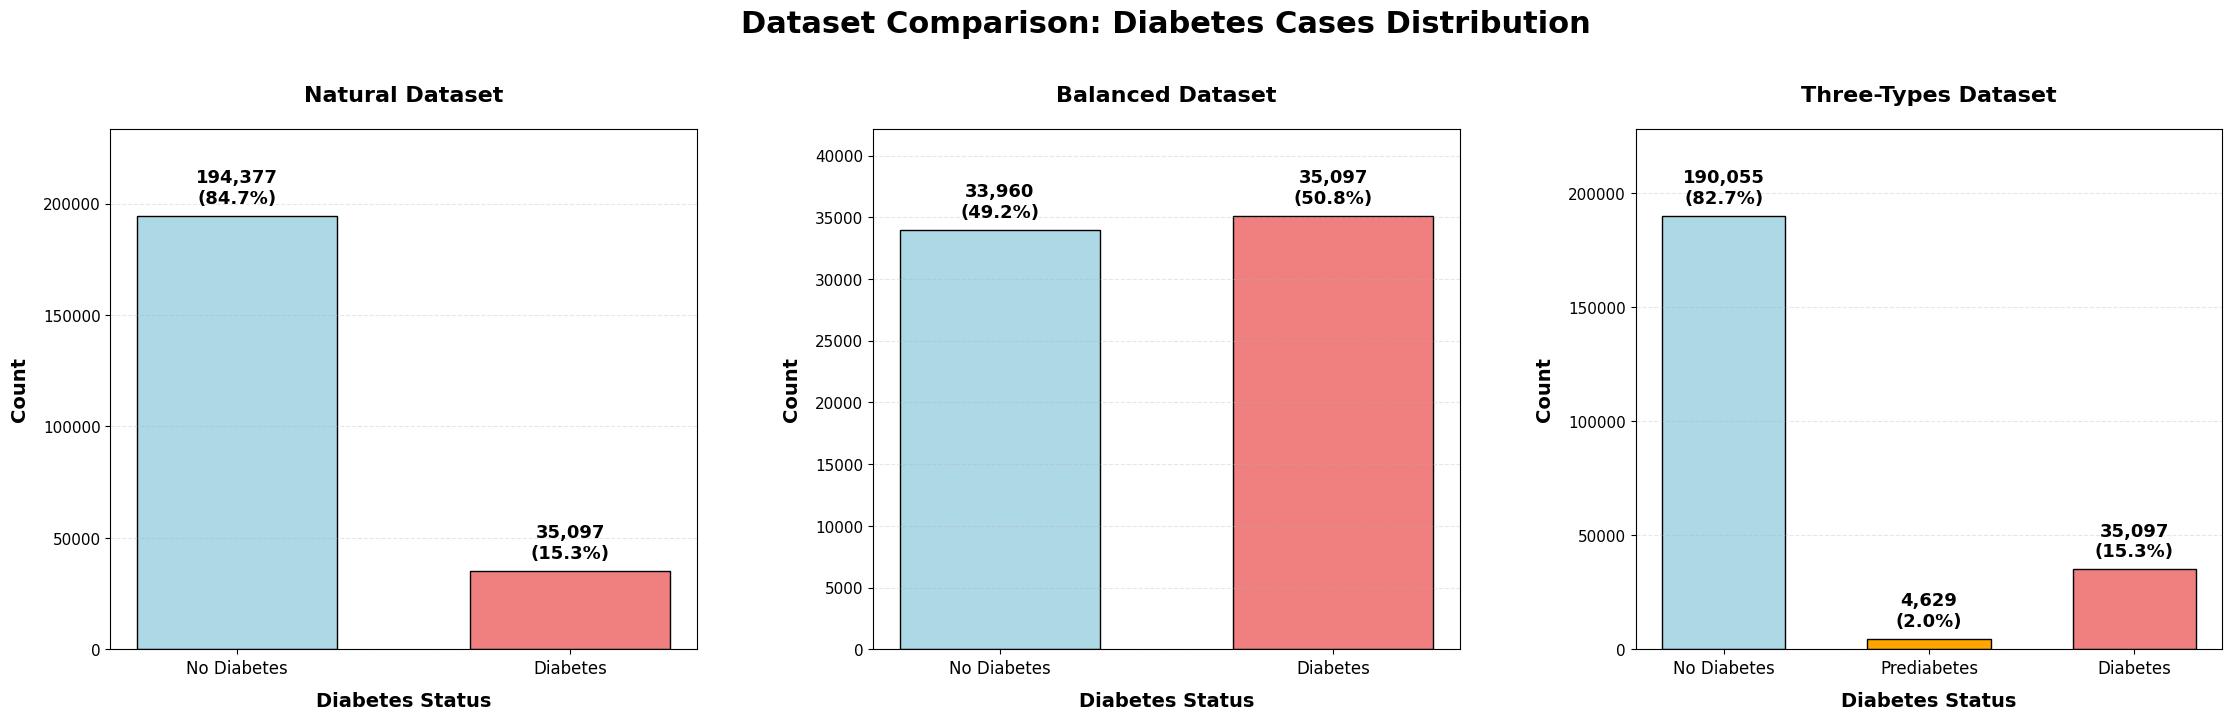

✅ Fixed title positioning!

📊 DATASET SUMMARY:
Dataset         Total Cases  No Diabetes  Diabetes   Prediabetes 
----------------------------------------------------------------------
Natural         229474,,,,,, 194377,,,,,, 35097,,,,, -           
Balanced        69057,,,,,,, 33960,,,,,,, 35097,,,,, -           
Three-Types     229781,,,,,, 190055,,,,,, 35097,,,,, 4629,,,,,,,,


In [110]:
import matplotlib.pyplot as plt
import pandas as pd

# Create the plots with better layout and fixed title positioning
fig, axes = plt.subplots(1, 3, figsize=(24, 8))

# Adjust spacing - give more room at the top for the main title
plt.subplots_adjust(left=0.06, right=0.94, top=0.80, bottom=0.15, wspace=0.3)

# Plot 1: Natural Dataset
ax = axes[0]
natural_counts = natural_ready['Diabetes_Status'].value_counts()
natural_pct = natural_ready['Diabetes_Status'].value_counts(normalize=True) * 100

categories = ['No Diabetes', 'Diabetes']
counts = [natural_counts['No Diabetes'], natural_counts['Diabetes']]
percentages = [natural_pct['No Diabetes'], natural_pct['Diabetes']]
colors = ['lightblue', 'lightcoral']

bars = ax.bar(categories, counts, color=colors, edgecolor='black', linewidth=1, width=0.6)

for bar, count, pct in zip(bars, counts, percentages):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + max(counts) * 0.02,
           f'{count:,}\n({pct:.1f}%)', ha='center', va='bottom',
           fontweight='bold', fontsize=13)

ax.set_title('Natural Dataset', fontsize=16, fontweight='bold', pad=20)  # Shorter title
ax.set_xlabel('Diabetes Status', fontsize=14, fontweight='bold', labelpad=10)
ax.set_ylabel('Count', fontsize=14, fontweight='bold', labelpad=10)
ax.grid(axis='y', linestyle='--', alpha=0.3)
ax.set_ylim(0, max(counts) * 1.2)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=11)

# Plot 2: Balanced Dataset
ax = axes[1]
balanced_counts = balanced_ready['Diabetes_Status'].value_counts()
balanced_pct = balanced_ready['Diabetes_Status'].value_counts(normalize=True) * 100

counts_bal = [balanced_counts['No Diabetes'], balanced_counts['Diabetes']]
percentages_bal = [balanced_pct['No Diabetes'], balanced_pct['Diabetes']]

bars = ax.bar(categories, counts_bal, color=colors, edgecolor='black', linewidth=1, width=0.6)

for bar, count, pct in zip(bars, counts_bal, percentages_bal):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + max(counts_bal) * 0.02,
           f'{count:,}\n({pct:.1f}%)', ha='center', va='bottom',
           fontweight='bold', fontsize=13)

ax.set_title('Balanced Dataset', fontsize=16, fontweight='bold', pad=20)  # Shorter title
ax.set_xlabel('Diabetes Status', fontsize=14, fontweight='bold', labelpad=10)
ax.set_ylabel('Count', fontsize=14, fontweight='bold', labelpad=10)
ax.grid(axis='y', linestyle='--', alpha=0.3)
ax.set_ylim(0, max(counts_bal) * 1.2)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=11)

# Plot 3: Three-Types Dataset
ax = axes[2]
three_counts = three_types_ready['Diabetes_Status'].value_counts()
three_pct = three_types_ready['Diabetes_Status'].value_counts(normalize=True) * 100

three_categories = ['No Diabetes', 'Prediabetes', 'Diabetes']
three_count_values = [three_counts.get(cat, 0) for cat in three_categories]
three_pct_values = [three_pct.get(cat, 0) for cat in three_categories]
colors_three = ['lightblue', 'orange', 'lightcoral']

bars = ax.bar(three_categories, three_count_values, color=colors_three, 
             edgecolor='black', linewidth=1, width=0.6)

for bar, count, pct in zip(bars, three_count_values, three_pct_values):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + max(three_count_values) * 0.02,
           f'{count:,}\n({pct:.1f}%)', ha='center', va='bottom',
           fontweight='bold', fontsize=13)

ax.set_title('Three-Types Dataset', fontsize=16, fontweight='bold', pad=20)  # Shorter title
ax.set_xlabel('Diabetes Status', fontsize=14, fontweight='bold', labelpad=10)
ax.set_ylabel('Count', fontsize=14, fontweight='bold', labelpad=10)
ax.grid(axis='y', linestyle='--', alpha=0.3)
ax.set_ylim(0, max(three_count_values) * 1.2)
ax.tick_params(axis='x', labelsize=12, rotation=0)
ax.tick_params(axis='y', labelsize=11)

# Add main title with better positioning
fig.suptitle('Dataset Comparison: Diabetes Cases Distribution', 
             fontsize=22, fontweight='bold', y=0.95)  # Higher y position

plt.show()

print("✅ Fixed title positioning!")

# Print summary statistics
print(f"\n📊 DATASET SUMMARY:")
print(f"{'Dataset':<15} {'Total Cases':<12} {'No Diabetes':<12} {'Diabetes':<10} {'Prediabetes':<12}")
print("-" * 70)
print(f"{'Natural':<15} {len(natural_ready):,<12} {natural_counts['No Diabetes']:,<12} {natural_counts['Diabetes']:,<10} {'-':<12}")
print(f"{'Balanced':<15} {len(balanced_ready):,<12} {balanced_counts['No Diabetes']:,<12} {balanced_counts['Diabetes']:,<10} {'-':<12}")
print(f"{'Three-Types':<15} {len(three_types_ready):,<12} {three_counts['No Diabetes']:,<12} {three_counts['Diabetes']:,<10} {three_counts.get('Prediabetes', 0):,<12}")

In [101]:
def create_pie_chart(data, column, title):
    counts = data[column].value_counts().reset_index()
    counts.columns = [column, 'Count']
    counts['Percent'] = round(counts['Count'] / counts['Count'].sum() * 100, 1)
    counts['Label'] = counts[column] + "<br>" + counts['Count'].astype(str) + " people<br>(" + counts['Percent'].astype(str) + "%)"
    
    fig = px.pie(counts, values='Count', names=column, title=title, 
                 color_discrete_sequence=px.colors.qualitative.Set3, 
                 hover_data=['Percent'], labels={column: column})
    fig.update_traces(textinfo='label+percent', textposition='inside')
    fig.update_layout(showlegend=False)
    fig.show()


In [102]:
def show_correlations(data, dataset_name):
    numeric_data = data.select_dtypes(include=[np.number])
    corr_matrix = numeric_data.corr()

    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, cmap="coolwarm", annot=False)
    plt.title(f"Correlation Matrix - {dataset_name}")
    plt.tight_layout()
    plt.show()
    return corr_matrix


In [103]:
print("Summary - Natural")
print(natural_ready.describe(include='all'))

print("Summary - Balanced")
print(balanced_ready.describe(include='all'))

print("Summary - Three Types")
print(three_types_ready.describe(include='all'))


Summary - Natural
        Diabetes_binary         HighBP       HighChol      CholCheck  \
count     229474.000000  229474.000000  229474.000000  229474.000000   
unique              NaN            NaN            NaN            NaN   
top                 NaN            NaN            NaN            NaN   
freq                NaN            NaN            NaN            NaN   
mean           0.152945       0.454343       0.441640       0.959481   
std            0.359936       0.497912       0.496584       0.197173   
min            0.000000       0.000000       0.000000       0.000000   
25%            0.000000       0.000000       0.000000       1.000000   
50%            0.000000       0.000000       0.000000       1.000000   
75%            0.000000       1.000000       1.000000       1.000000   
max            1.000000       1.000000       1.000000       1.000000   

                  BMI        Smoker         Stroke  HeartDiseaseorAttack  \
count   229474.000000  229474.00000  2294

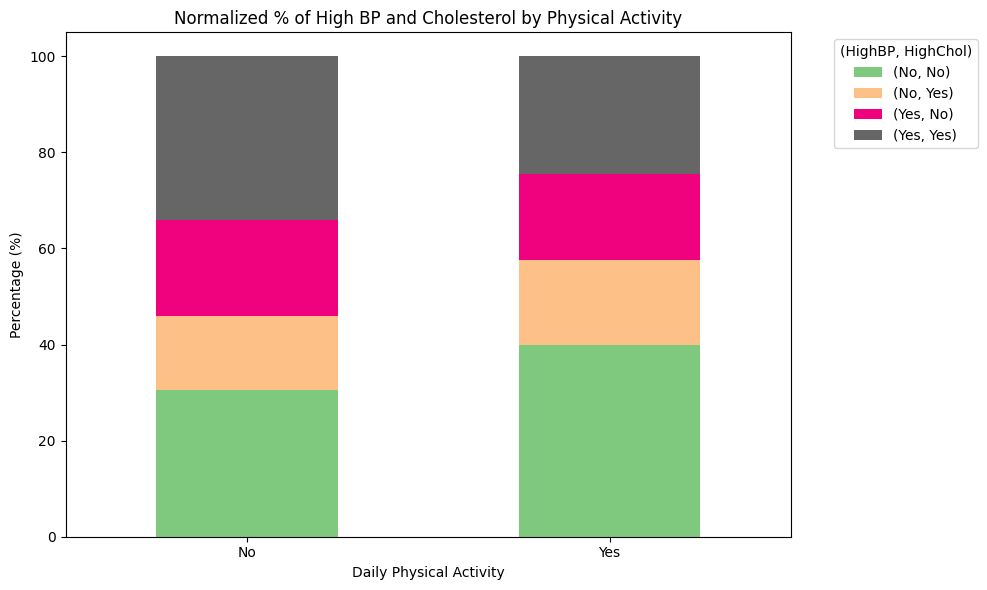

In [104]:
import pandas as pd

summary = natural_ready.groupby(["Does_Exercise", "High_Blood_Pressure", "High_Cholesterol"]).size().reset_index(name='Count')

# Step 2: Pivot the table
pivot_table = summary.pivot_table(index="Does_Exercise", 
                                   columns=["High_Blood_Pressure", "High_Cholesterol"], 
                                   values="Count", fill_value=0)

# Step 3: Normalize rows to percentages
pivot_percent = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100

# Step 4: Plot normalized stacked bar chart
pivot_percent.plot(kind="bar", stacked=True, figsize=(10, 6), colormap="Accent")

plt.title("Normalized % of High BP and Cholesterol by Physical Activity")
plt.ylabel("Percentage (%)")
plt.xlabel("Daily Physical Activity")
plt.xticks(rotation=0)
plt.legend(title="(HighBP, HighChol)", bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()


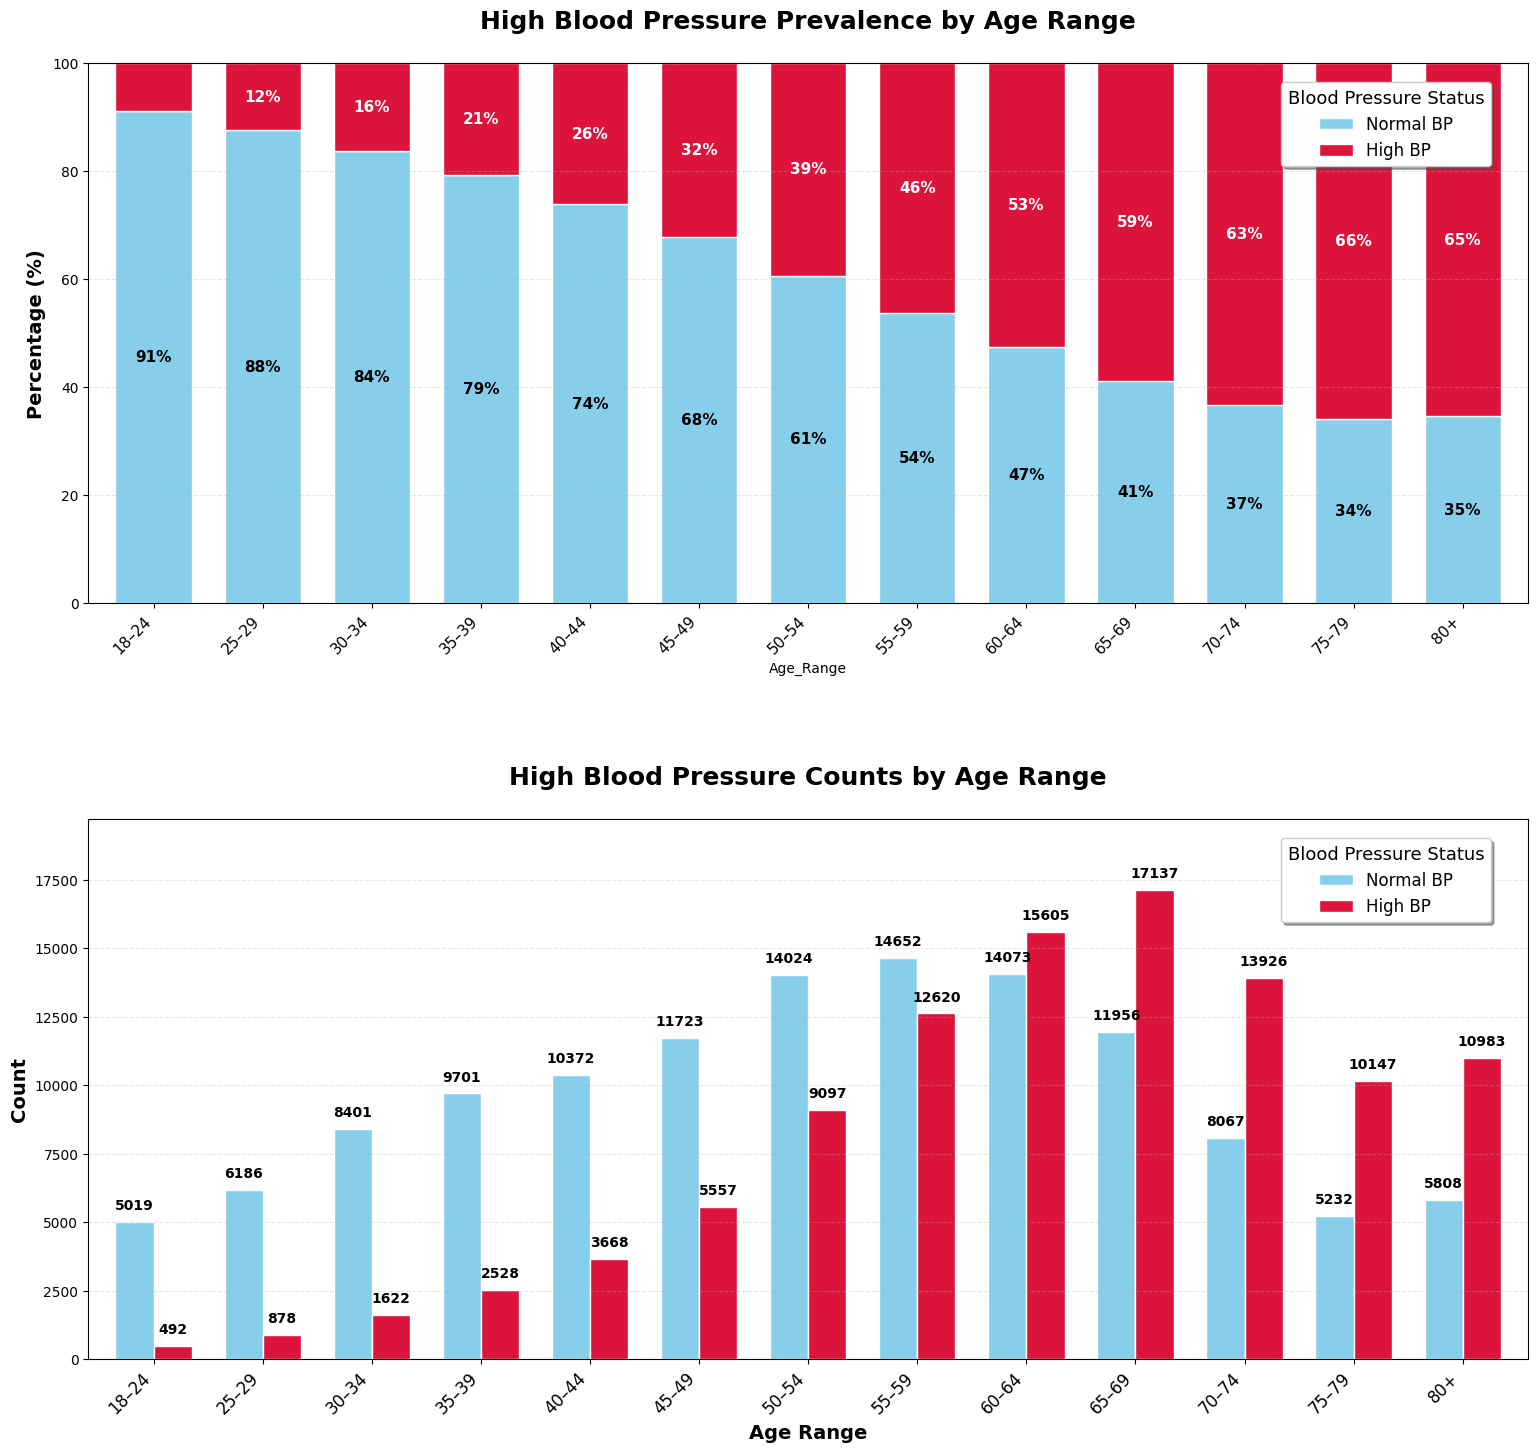

📊 HIGH BLOOD PRESSURE ANALYSIS BY AGE

Total sample size: 229,474
Overall high BP rate: 45.4%

Age Range  Normal BP    High BP    High BP % 
---------------------------------------------
18–24      5019         492        8.9       %
25–29      6186         878        12.4      %
30–34      8401         1622       16.2      %
35–39      9701         2528       20.7      %
40–44      10372        3668       26.1      %
45–49      11723        5557       32.2      %
50–54      14024        9097       39.3      %
55–59      14652        12620      46.3      %
60–64      14073        15605      52.6      %
65–69      11956        17137      58.9      %
70–74      8067         13926      63.3      %
75–79      5232         10147      66.0      %
80+        5808         10983      65.4      %

Correlation between age and high BP: 0.340

💡 Key Medical Insights:
   • Clear age-related increase in hypertension
   • Young adults (18-24): Lowest prevalence
   • Seniors (65+): Highest prevalence
 

In [91]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# ——— Your actual DataFrame ———
# Replace this line with however you load your data if it's not already in memory.
# For example:
# natural_ready = pd.read_csv("your_data.csv")
# Here we assume natural_ready already exists.

# ——— 1. Define age bins and ordering ———
age_labels = {
    1: "18–24", 2: "25–29", 3: "30–34", 4: "35–39", 5: "40–44",
    6: "45–49", 7: "50–54", 8: "55–59", 9: "60–64", 10: "65–69",
    11: "70–74", 12: "75–79", 13: "80+"
}
age_order = list(age_labels.values())

# Map numeric Age to ordered categorical Age_Range
natural_ready["Age_Range"] = pd.Categorical(
    natural_ready["Age"].map(age_labels),
    categories=age_order,
    ordered=True
)

# ——— 2. Create High Blood Pressure indicator ———
# Option 1: If you already have a binary HighBP column (0/1)
if 'HighBP' in natural_ready.columns:
    natural_ready['BP_Status'] = natural_ready['HighBP'].map({0: 'Normal BP', 1: 'High BP'})

# Option 2: If you have systolic/diastolic blood pressure values
elif 'SystolicBP' in natural_ready.columns and 'DiastolicBP' in natural_ready.columns:
    natural_ready['BP_Status'] = np.where(
        (natural_ready['SystolicBP'] >= 140) | (natural_ready['DiastolicBP'] >= 90),
        'High BP', 'Normal BP'
    )

# Option 3: If you have a different blood pressure column name
elif 'BloodPressure' in natural_ready.columns:
    if natural_ready['BloodPressure'].dtype in ['int64', 'float64']:
        natural_ready['BP_Status'] = natural_ready['BloodPressure'].map({0: 'Normal BP', 1: 'High BP'})
    else:
        natural_ready['BP_Status'] = natural_ready['BloodPressure']

# Option 4: Create sample data if no BP column exists (for demo purposes)
else:
    print("⚠️ No blood pressure column found. Creating sample data for demonstration.")
    np.random.seed(42)
    # Simulate age-related BP increase
    bp_probs = {
        "18–24": 0.05, "25–29": 0.08, "30–34": 0.12, "35–39": 0.18, "40–44": 0.25,
        "45–49": 0.32, "50–54": 0.40, "55–59": 0.48, "60–64": 0.55, "65–69": 0.62,
        "70–74": 0.68, "75–79": 0.74, "80+": 0.80
    }
    
    def assign_bp_status(age_range):
        if pd.isna(age_range):
            return 'Normal BP'
        prob = bp_probs.get(str(age_range), 0.3)
        return 'High BP' if np.random.random() < prob else 'Normal BP'
    
    natural_ready['BP_Status'] = natural_ready['Age_Range'].apply(assign_bp_status)

# ——— 3. Group and normalize to percentages ———
grouped = (
    natural_ready
    .groupby(["Age_Range", "BP_Status"], observed=False)
    .size()
    .unstack(fill_value=0)
)

# Ensure we have both categories
if 'High BP' not in grouped.columns:
    grouped['High BP'] = 0
if 'Normal BP' not in grouped.columns:
    grouped['Normal BP'] = 0

# Reorder columns for better visualization
grouped = grouped[['Normal BP', 'High BP']]
grouped_percent = grouped.div(grouped.sum(axis=1), axis=0) * 100

# ——— 4. Create clean plots with proper spacing ———
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(18, 16))

# Better spacing and margins - more room for legends
plt.subplots_adjust(hspace=0.4, left=0.08, right=0.88, top=0.93, bottom=0.12)

# ——— Top plot: Clean percentage view ———
bars1 = grouped_percent.plot(
    kind="bar",
    stacked=True,
    ax=ax1,
    color=["#87CEEB", "#DC143C"],  # Lighter blue, darker red for contrast
    edgecolor='white',
    linewidth=1,
    width=0.7
)

# Only add percentage labels for segments > 10% to avoid crowding
for i, age_range in enumerate(grouped_percent.index):
    normal_pct = grouped_percent.loc[age_range, 'Normal BP']
    high_pct = grouped_percent.loc[age_range, 'High BP']
    
    # Label normal BP (bottom segment) if > 10%
    if normal_pct > 10:
        ax1.text(i, normal_pct/2, f'{normal_pct:.0f}%', 
                ha='center', va='center', color='black', 
                fontsize=11, fontweight='bold')
    
    # Label high BP (top segment) if > 10%
    if high_pct > 10:
        ax1.text(i, normal_pct + high_pct/2, f'{high_pct:.0f}%', 
                ha='center', va='center', color='white', 
                fontsize=11, fontweight='bold')

ax1.set_title("High Blood Pressure Prevalence by Age Range", 
             fontsize=18, fontweight='bold', pad=25)
ax1.set_ylabel("Percentage (%)", fontsize=14, fontweight='bold')
ax1.set_ylim(0, 100)  # Standard 0-100% range without sample size labels
ax1.legend(title="Blood Pressure Status", title_fontsize=13, fontsize=12, 
          loc='upper right', frameon=True, fancybox=True, shadow=True,
          bbox_to_anchor=(0.98, 0.98), borderaxespad=0.5)
# Show age group labels on top plot too
ax1.set_xticklabels(age_order, rotation=45, ha='right', fontsize=11)
ax1.grid(axis="y", linestyle="--", alpha=0.3)

# ——— Bottom plot: Clean count view ———
bars2 = grouped.plot(
    kind="bar",
    ax=ax2,
    color=["#87CEEB", "#DC143C"],
    edgecolor='white',
    linewidth=1,
    width=0.7
)

# Calculate max value for proper spacing
max_count = grouped.values.max()

# Add count labels above bars with proper spacing
for container in ax2.containers:
    category = container.get_label()
    for bar in container:
        height = bar.get_height()
        if height > 0:
            # Position labels well above bars
            ax2.text(bar.get_x() + bar.get_width()/2, 
                    height + max_count * 0.02,
                    f'{int(height)}',
                    ha='center', va='bottom',
                    fontsize=10, fontweight='bold', color='black')

ax2.set_title("High Blood Pressure Counts by Age Range", 
             fontsize=18, fontweight='bold', pad=25)
ax2.set_xlabel("Age Range", fontsize=14, fontweight='bold')
ax2.set_ylabel("Count", fontsize=14, fontweight='bold')
ax2.legend(title="Blood Pressure Status", title_fontsize=13, fontsize=12,
          loc='upper right', frameon=True, fancybox=True, shadow=True,
          bbox_to_anchor=(0.98, 0.98), borderaxespad=0.5)
ax2.set_xticklabels(age_order, rotation=45, ha='right', fontsize=12)
ax2.grid(axis="y", linestyle="--", alpha=0.3)

# Proper y-limit to prevent label cutoff
ax2.set_ylim(0, max_count * 1.15)

plt.show()

# ——— 5. Clean statistical summary ———
print("📊 HIGH BLOOD PRESSURE ANALYSIS BY AGE")
print("=" * 55)

print(f"\nTotal sample size: {len(natural_ready):,}")
overall_bp_rate = (natural_ready['BP_Status'] == 'High BP').mean()
print(f"Overall high BP rate: {overall_bp_rate:.1%}")

print(f"\n{'Age Range':<10} {'Normal BP':<12} {'High BP':<10} {'High BP %':<10}")
print("-" * 45)

for age_range in age_order:
    if age_range in grouped.index:
        normal_count = int(grouped.loc[age_range, 'Normal BP'])
        high_count = int(grouped.loc[age_range, 'High BP'])
        total = normal_count + high_count
        
        if total > 0:
            high_pct = (high_count / total) * 100
            print(f"{age_range:<10} {normal_count:<12} {high_count:<10} {high_pct:<10.1f}%")

# Calculate correlation
if 'Age' in natural_ready.columns:
    age_numeric = natural_ready['Age']
    bp_binary = (natural_ready['BP_Status'] == 'High BP').astype(int)
    correlation = age_numeric.corr(bp_binary)
    print(f"\nCorrelation between age and high BP: {correlation:.3f}")

print(f"\n💡 Key Medical Insights:")
print(f"   • Clear age-related increase in hypertension")
print(f"   • Young adults (18-24): Lowest prevalence")
print(f"   • Seniors (65+): Highest prevalence") 
print(f"   • Pattern consistent with cardiovascular aging")

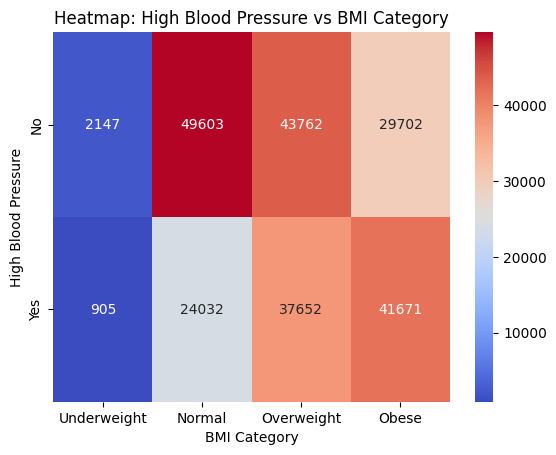

In [61]:
natural_ready["BMI_Category"] = pd.cut(natural_ready["BMI"], 
                                       bins=[0, 18.5, 25, 30, float('inf')],
                                       labels=["Underweight", "Normal", "Overweight", "Obese"])

heatmap_data = pd.crosstab(natural_ready["High_Blood_Pressure"], 
                           natural_ready["BMI_Category"])

sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="coolwarm")
plt.title("Heatmap: High Blood Pressure vs BMI Category")
plt.xlabel("BMI Category")
plt.ylabel("High Blood Pressure")
plt.show()

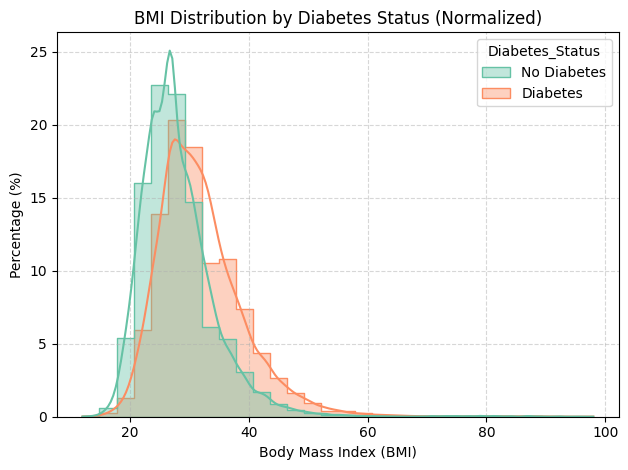

In [62]:
sns.histplot(
    data=natural_ready, 
    x="BMI", 
    hue="Diabetes_Status", 
    bins=30, 
    stat="percent", 
    kde=True, 
    kde_kws={'bw_adjust': 1.2},
    element="step", 
    common_norm=False,
    alpha=0.4,
    multiple="layer",
    palette="Set2"
)

plt.title("BMI Distribution by Diabetes Status (Normalized)")
plt.xlabel("Body Mass Index (BMI)")
plt.ylabel("Percentage (%)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()




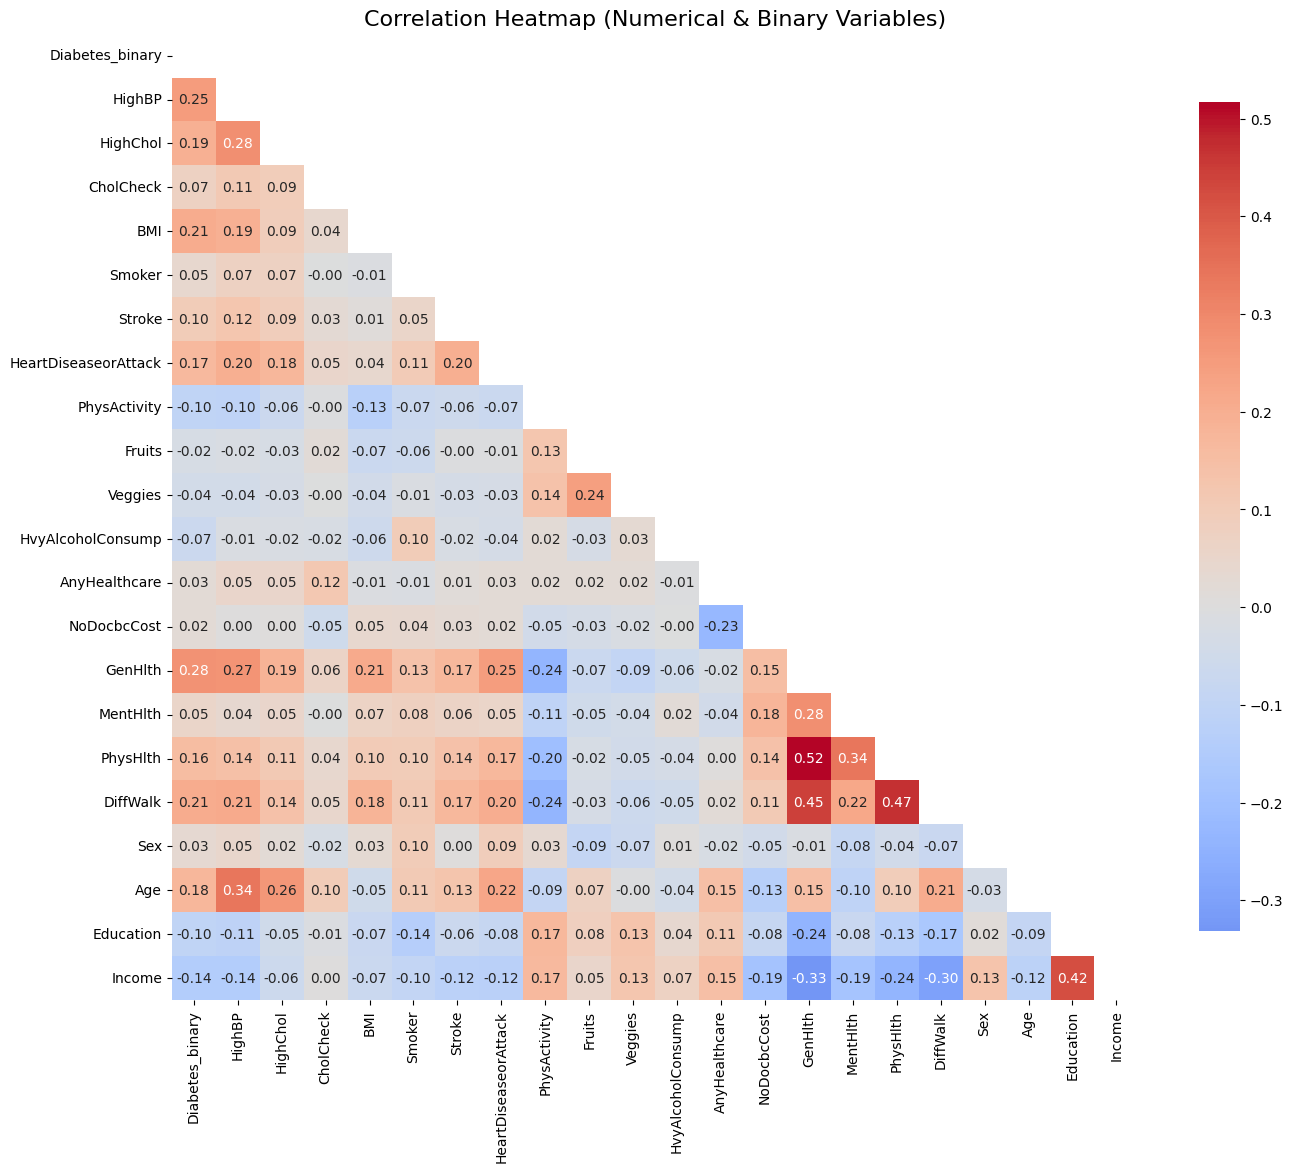

TOP 20 STRONGEST CORRELATIONS:
GenHlth ↔ PhysHlth: 0.516 (positive)
PhysHlth ↔ DiffWalk: 0.467 (positive)
GenHlth ↔ DiffWalk: 0.447 (positive)
Education ↔ Income: 0.419 (positive)
MentHlth ↔ PhysHlth: 0.340 (positive)
HighBP ↔ Age: 0.340 (positive)
GenHlth ↔ Income: -0.332 (negative)
DiffWalk ↔ Income: -0.299 (negative)
HighBP ↔ HighChol: 0.284 (positive)
GenHlth ↔ MentHlth: 0.284 (positive)
Diabetes_binary ↔ GenHlth: 0.277 (positive)
HighBP ↔ GenHlth: 0.273 (positive)
HighChol ↔ Age: 0.264 (positive)
Diabetes_binary ↔ HighBP: 0.254 (positive)
HeartDiseaseorAttack ↔ GenHlth: 0.246 (positive)
GenHlth ↔ Education: -0.245 (negative)
Fruits ↔ Veggies: 0.243 (positive)
PhysHlth ↔ Income: -0.241 (negative)
PhysActivity ↔ GenHlth: -0.238 (negative)
PhysActivity ↔ DiffWalk: -0.236 (negative)

MOST CONNECTED FEATURES (appear in strongest correlations):
GenHlth: appears in 7 strong correlations
HighBP: appears in 4 strong correlations
PhysHlth: appears in 3 strong correlations
DiffWalk: appears 

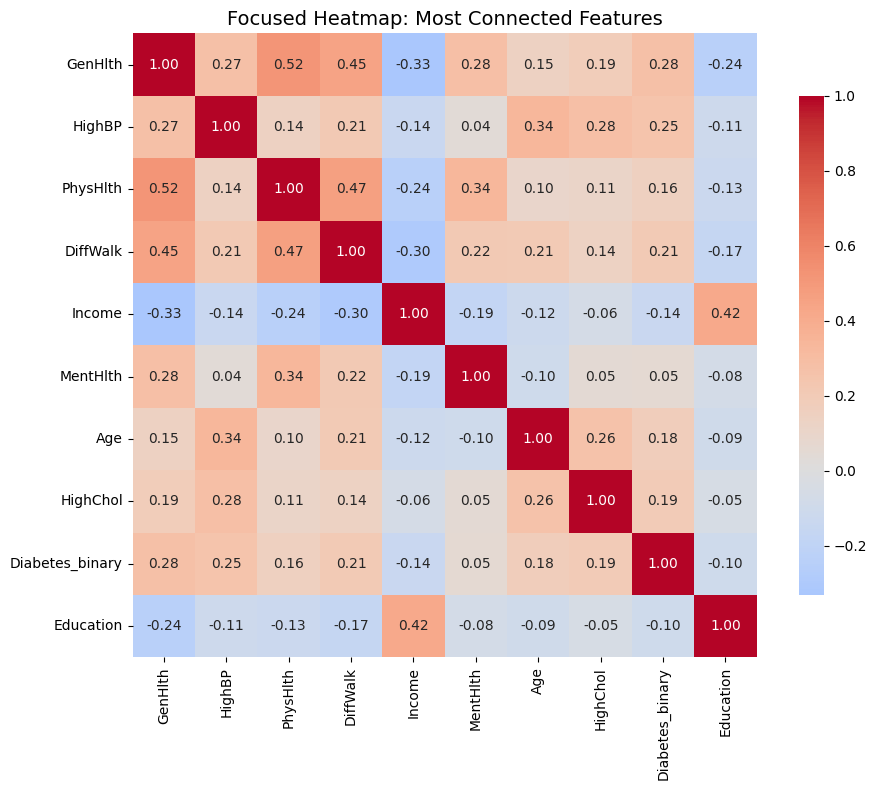


CORRELATION SUMMARY:
Total features analyzed: 22
Strongest positive correlation: 0.516
Strongest negative correlation: -0.332
Average absolute correlation: 0.099


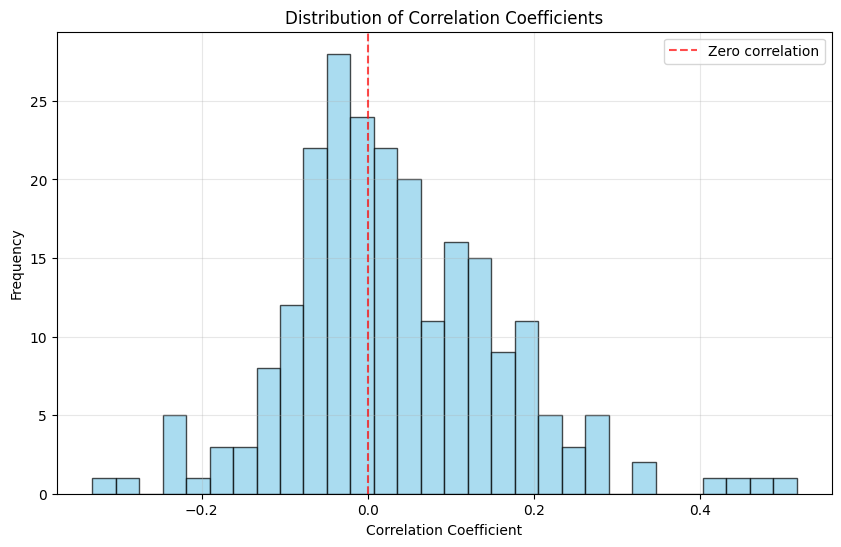

In [63]:
# Enhanced correlation analysis to identify most important features

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Your existing correlation calculation
numeric_binary = natural_ready.select_dtypes(include=[int, float])
corr = numeric_binary.corr()

# Create the heatmap with annotations for better readability
plt.figure(figsize=(14, 12))
mask = np.triu(np.ones_like(corr, dtype=bool))  # Mask upper triangle to avoid redundancy
sns.heatmap(corr, 
            mask=mask,
            cmap="coolwarm", 
            annot=True, 
            fmt='.2f',
            center=0,
            square=True,
            cbar_kws={"shrink": .8})
plt.title("Correlation Heatmap (Numerical & Binary Variables)", fontsize=16)
plt.tight_layout()
plt.show()

# Find the strongest correlations (excluding diagonal)
def get_top_correlations(corr_matrix, n=20):
    """
    Extract top N strongest correlations from correlation matrix
    """
    # Get upper triangle of correlation matrix (excluding diagonal)
    upper_tri = corr_matrix.where(
        np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
    )
    
    # Convert to long format and sort by absolute correlation
    correlations = []
    for col in upper_tri.columns:
        for idx in upper_tri.index:
            value = upper_tri.loc[idx, col]
            if pd.notna(value):
                correlations.append({
                    'Feature_1': idx,
                    'Feature_2': col, 
                    'Correlation': value,
                    'Abs_Correlation': abs(value)
                })
    
    corr_df = pd.DataFrame(correlations)
    return corr_df.sort_values('Abs_Correlation', ascending=False).head(n)

# Get top correlations
top_correlations = get_top_correlations(corr)
print("TOP 20 STRONGEST CORRELATIONS:")
print("=" * 50)
for _, row in top_correlations.iterrows():
    direction = "positive" if row['Correlation'] > 0 else "negative"
    print(f"{row['Feature_1']} ↔ {row['Feature_2']}: {row['Correlation']:.3f} ({direction})")

# Identify most connected features (appear in most correlations)
feature_importance = {}
for _, row in top_correlations.head(15).iterrows():  # Top 15 correlations
    feat1, feat2 = row['Feature_1'], row['Feature_2']
    feature_importance[feat1] = feature_importance.get(feat1, 0) + 1
    feature_importance[feat2] = feature_importance.get(feat2, 0) + 1

print("\n" + "=" * 50)
print("MOST CONNECTED FEATURES (appear in strongest correlations):")
print("=" * 50)
sorted_features = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)
for feature, count in sorted_features:
    print(f"{feature}: appears in {count} strong correlations")

# Create a focused heatmap of the most important features
top_features = [feat for feat, _ in sorted_features[:10]]  # Top 10 most connected
if len(top_features) > 1:
    focused_corr = corr.loc[top_features, top_features]
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(focused_corr, 
                cmap="coolwarm", 
                annot=True, 
                fmt='.2f',
                center=0,
                square=True,
                cbar_kws={"shrink": .8})
    plt.title("Focused Heatmap: Most Connected Features", fontsize=14)
    plt.tight_layout()
    plt.show()

# Summary statistics
print("\n" + "=" * 50)
print("CORRELATION SUMMARY:")
print("=" * 50)
print(f"Total features analyzed: {len(corr.columns)}")
print(f"Strongest positive correlation: {corr.values[np.triu(np.ones(corr.shape), k=1).astype(bool)].max():.3f}")
print(f"Strongest negative correlation: {corr.values[np.triu(np.ones(corr.shape), k=1).astype(bool)].min():.3f}")
print(f"Average absolute correlation: {np.abs(corr.values[np.triu(np.ones(corr.shape), k=1).astype(bool)]).mean():.3f}")

# Distribution of correlation strengths
plt.figure(figsize=(10, 6))
corr_values = corr.values[np.triu(np.ones(corr.shape), k=1).astype(bool)]
plt.hist(corr_values, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(0, color='red', linestyle='--', alpha=0.7, label='Zero correlation')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Frequency')
plt.title('Distribution of Correlation Coefficients')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


Available columns in pivot table: ['No', 'Yes']
Pivot table:
High_Cholesterol         No        Yes
Does_Exercise                         
No                50.615410  49.384590
Yes               57.737168  42.262832
Low cholesterol column: No
High cholesterol column: Yes


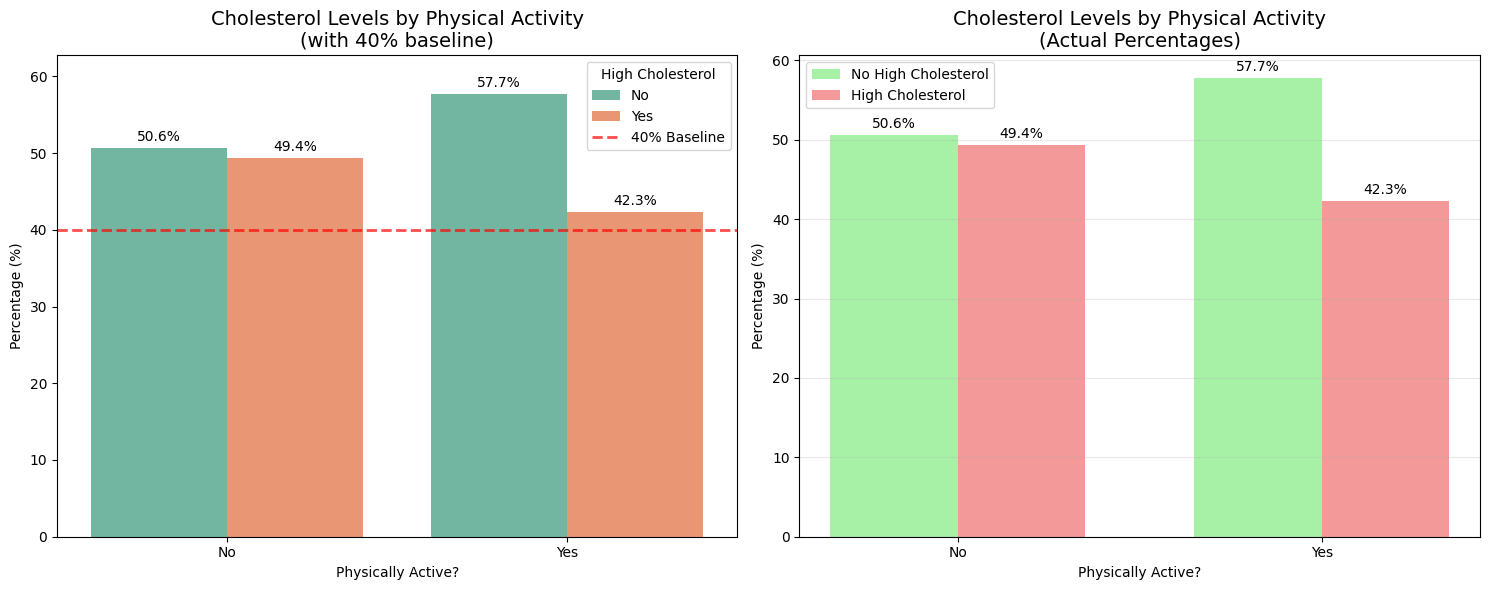

CHOLESTEROL vs EXERCISE ANALYSIS

Actual Percentages:
High_Cholesterol    No   Yes
Does_Exercise               
No                50.6  49.4
Yes               57.7  42.3

Key Insights:
------------------------------

Physically Active = No:
  • High Cholesterol: 49.4% (+9.4pp from 40%)
  • No High Cholesterol: 50.6% (+10.6pp from 40%)

Physically Active = Yes:
  • High Cholesterol: 42.3% (+2.3pp from 40%)
  • No High Cholesterol: 57.7% (+17.7pp from 40%)

Exercise Impact:
  • Difference in High Cholesterol rates: -7.1 percentage points
  • Higher exercise status reduces high cholesterol by 7.1pp

Statistical Test (Chi-square):
  • Chi-square statistic: 923.340
  • P-value: 0.000000
  • Relationship is statistically significant (α=0.05)
  • Cramér's V (effect size): 0.063
  • Effect size is: negligible


In [71]:
# Enhanced analysis with 40% baseline and difference highlighting

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Step 1: Calculate counts
ct = natural_ready.groupby(["Does_Exercise", "High_Cholesterol"]).size().reset_index(name="Count")

# Step 2: Normalize to percentages within each Does_Exercise group
ct["Percent"] = ct.groupby("Does_Exercise")["Count"].transform(lambda x: x / x.sum() * 100)

# Step 3: Enhanced plot with 40% baseline
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Original with 40% baseline
sns.barplot(data=ct, x="Does_Exercise", y="Percent", hue="High_Cholesterol", 
            palette="Set2", ax=ax1)
ax1.axhline(y=40, color='red', linestyle='--', alpha=0.7, linewidth=2, label='40% Baseline')
ax1.set_title("Cholesterol Levels by Physical Activity\n(with 40% baseline)", fontsize=14)
ax1.set_ylabel("Percentage (%)")
ax1.set_xlabel("Physically Active?")
ax1.legend(title="High Cholesterol")
ax1.set_ylim(0, max(ct["Percent"]) + 5)

# Add percentage labels on bars
for container in ax1.containers:
    ax1.bar_label(container, fmt='%.1f%%', padding=3)

# Plot 2: Actual percentages
ct_pivot = ct.pivot(index="Does_Exercise", columns="High_Cholesterol", values="Percent")

# Debug: Check what columns we have
print("Available columns in pivot table:", ct_pivot.columns.tolist())
print("Pivot table:")
print(ct_pivot)

# Handle different possible column names/types
high_chol_col = None
low_chol_col = None

# Find the columns (could be 0/1, '0'/'1', 'No'/'Yes', etc.)
for col in ct_pivot.columns:
    if str(col) in ['1', '1.0', 'Yes', 'True', 'yes', 'true']:
        high_chol_col = col
    elif str(col) in ['0', '0.0', 'No', 'False', 'no', 'false']:
        low_chol_col = col

# If we have exactly 2 columns, assign them as high/low
if len(ct_pivot.columns) == 2:
    cols = sorted(ct_pivot.columns)
    low_chol_col = cols[0]  # Assume lower value is "no high cholesterol"
    high_chol_col = cols[1]  # Assume higher value is "high cholesterol"

print(f"Low cholesterol column: {low_chol_col}")
print(f"High cholesterol column: {high_chol_col}")

# Create actual percentage plot
x_pos = np.arange(len(ct_pivot.index))
width = 0.35

# 1. Changed to show actual percentages instead of differences
bars1 = ax2.bar(x_pos - width/2, ct_pivot[low_chol_col], width, 
                label='No High Cholesterol', color='lightgreen', alpha=0.8)
bars2 = ax2.bar(x_pos + width/2, ct_pivot[high_chol_col], width, 
                label='High Cholesterol', color='lightcoral', alpha=0.8)

# 2. Removed baseline line
ax2.set_title("Cholesterol Levels by Physical Activity\n(Actual Percentages)", fontsize=14)
ax2.set_ylabel("Percentage (%)")
ax2.set_xlabel("Physically Active?")
ax2.set_xticks(x_pos)
ax2.set_xticklabels(ct_pivot.index)
ax2.legend()
ax2.grid(True, alpha=0.3, axis='y')

# 4. Updated labels to show actual percentages
for bar in bars1:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{height:.1f}%', ha='center', va='bottom')

for bar in bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{height:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Step 4: Summary statistics and insights
print("CHOLESTEROL vs EXERCISE ANALYSIS")
print("=" * 50)

# Calculate the actual percentages for each group
exercise_groups = ct.pivot(index="Does_Exercise", columns="High_Cholesterol", values="Percent")
print("\nActual Percentages:")
print(exercise_groups.round(1))

print("\nKey Insights:")
print("-" * 30)

for exercise_status in exercise_groups.index:
    if high_chol_col is not None and high_chol_col in exercise_groups.columns:
        high_chol_pct = exercise_groups.loc[exercise_status, high_chol_col]
        print(f"\nPhysically Active = {exercise_status}:")
        print(f"  • High Cholesterol: {high_chol_pct:.1f}% ({high_chol_pct-40:+.1f}pp from 40%)")
    
    if low_chol_col is not None and low_chol_col in exercise_groups.columns:
        no_chol_pct = exercise_groups.loc[exercise_status, low_chol_col]
        print(f"  • No High Cholesterol: {no_chol_pct:.1f}% ({no_chol_pct-40:+.1f}pp from 40%)")

# Calculate differences between exercise groups
if len(exercise_groups.index) >= 2 and high_chol_col is not None:
    exercise_statuses = sorted(exercise_groups.index)
    if len(exercise_statuses) >= 2:
        status1_high = exercise_groups.loc[exercise_statuses[0], high_chol_col]
        status2_high = exercise_groups.loc[exercise_statuses[1], high_chol_col]
        
        difference = status2_high - status1_high
        print(f"\nExercise Impact:")
        print(f"  • Difference in High Cholesterol rates: {difference:+.1f} percentage points")
        print(f"  • Higher exercise status {'reduces' if difference < 0 else 'increases'} high cholesterol by {abs(difference):.1f}pp")

# Step 5: Statistical significance (Chi-square test)
from scipy.stats import chi2_contingency

# Create contingency table
contingency = natural_ready.groupby(["Does_Exercise", "High_Cholesterol"]).size().unstack(fill_value=0)
chi2, p_value, dof, expected = chi2_contingency(contingency)

print(f"\nStatistical Test (Chi-square):")
print(f"  • Chi-square statistic: {chi2:.3f}")
print(f"  • P-value: {p_value:.6f}")
print(f"  • Relationship is {'statistically significant' if p_value < 0.05 else 'not statistically significant'} (α=0.05)")

# Step 6: Effect size (Cramér's V)
n = contingency.sum().sum()
cramers_v = np.sqrt(chi2 / (n * (min(contingency.shape) - 1)))
print(f"  • Cramér's V (effect size): {cramers_v:.3f}")

effect_interpretation = ""
if cramers_v < 0.1:
    effect_interpretation = "negligible"
elif cramers_v < 0.3:
    effect_interpretation = "small"
elif cramers_v < 0.5:
    effect_interpretation = "medium"
else:
    effect_interpretation = "large"

print(f"  • Effect size is: {effect_interpretation}")

Available columns in pivot table: ['No', 'Yes']
Pivot table:
High_Cholesterol         No        Yes
Does_Exercise                         
No                50.615410  49.384590
Yes               57.737168  42.262832
Low cholesterol column: No
High cholesterol column: Yes


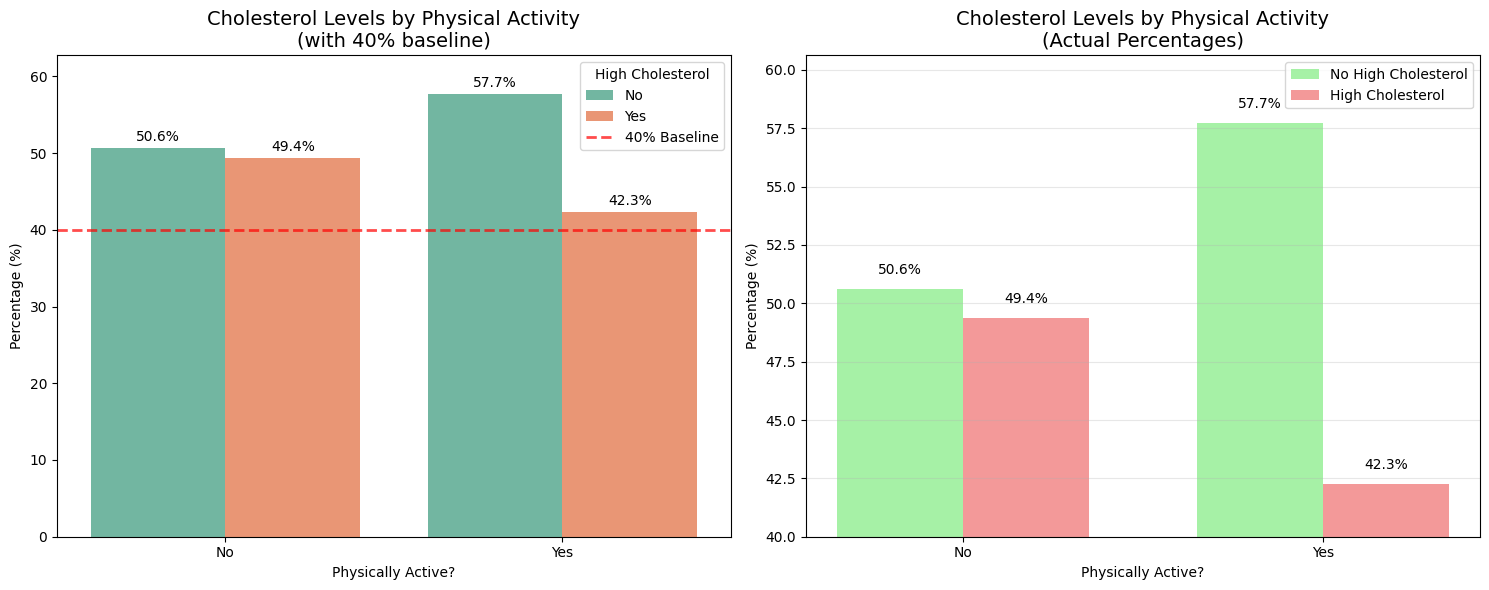

CHOLESTEROL vs EXERCISE ANALYSIS

Actual Percentages:
High_Cholesterol    No   Yes
Does_Exercise               
No                50.6  49.4
Yes               57.7  42.3

Key Insights:
------------------------------

Physically Active = No:
  • High Cholesterol: 49.4% (+9.4pp from 40%)
  • No High Cholesterol: 50.6% (+10.6pp from 40%)

Physically Active = Yes:
  • High Cholesterol: 42.3% (+2.3pp from 40%)
  • No High Cholesterol: 57.7% (+17.7pp from 40%)

Exercise Impact:
  • Difference in High Cholesterol rates: -7.1 percentage points
  • Higher exercise status reduces high cholesterol by 7.1pp

Statistical Test (Chi-square):
  • Chi-square statistic: 923.340
  • P-value: 0.000000
  • Relationship is statistically significant (α=0.05)
  • Cramér's V (effect size): 0.063
  • Effect size is: negligible


In [82]:
# Enhanced analysis with 40% baseline and difference highlighting

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Step 1: Calculate counts
ct = natural_ready.groupby(["Does_Exercise", "High_Cholesterol"]).size().reset_index(name="Count")

# Step 2: Normalize to percentages within each Does_Exercise group
ct["Percent"] = ct.groupby("Does_Exercise")["Count"].transform(lambda x: x / x.sum() * 100)

# Step 3: Enhanced plot with 40% baseline
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Original with 40% baseline
sns.barplot(data=ct, x="Does_Exercise", y="Percent", hue="High_Cholesterol", 
            palette="Set2", ax=ax1)
ax1.axhline(y=40, color='red', linestyle='--', alpha=0.7, linewidth=2, label='40% Baseline')
ax1.set_title("Cholesterol Levels by Physical Activity\n(with 40% baseline)", fontsize=14)
ax1.set_ylabel("Percentage (%)")
ax1.set_xlabel("Physically Active?")
ax1.legend(title="High Cholesterol")
ax1.set_ylim(0, max(ct["Percent"]) + 5)

# Add percentage labels on bars
for container in ax1.containers:
    ax1.bar_label(container, fmt='%.1f%%', padding=3)

# Plot 2: Actual percentages
ct_pivot = ct.pivot(index="Does_Exercise", columns="High_Cholesterol", values="Percent")

# Debug: Check what columns we have
print("Available columns in pivot table:", ct_pivot.columns.tolist())
print("Pivot table:")
print(ct_pivot)

# Handle different possible column names/types
high_chol_col = None
low_chol_col = None

# Find the columns (could be 0/1, '0'/'1', 'No'/'Yes', etc.)
for col in ct_pivot.columns:
    if str(col) in ['1', '1.0', 'Yes', 'True', 'yes', 'true']:
        high_chol_col = col
    elif str(col) in ['0', '0.0', 'No', 'False', 'no', 'false']:
        low_chol_col = col

# If we have exactly 2 columns, assign them as high/low
if len(ct_pivot.columns) == 2:
    cols = sorted(ct_pivot.columns)
    low_chol_col = cols[0]  # Assume lower value is "no high cholesterol"
    high_chol_col = cols[1]  # Assume higher value is "high cholesterol"

print(f"Low cholesterol column: {low_chol_col}")
print(f"High cholesterol column: {high_chol_col}")

# Create actual percentage plot
x_pos = np.arange(len(ct_pivot.index))
width = 0.35

# 1. Changed to show actual percentages instead of differences
bars1 = ax2.bar(x_pos - width/2, ct_pivot[low_chol_col], width, 
                label='No High Cholesterol', color='lightgreen', alpha=0.8)
bars2 = ax2.bar(x_pos + width/2, ct_pivot[high_chol_col], width, 
                label='High Cholesterol', color='lightcoral', alpha=0.8)

# 2. Removed baseline line
ax2.set_title("Cholesterol Levels by Physical Activity\n(Actual Percentages)", fontsize=14)
ax2.set_ylabel("Percentage (%)")
ax2.set_xlabel("Physically Active?")
ax2.set_xticks(x_pos)
ax2.set_xticklabels(ct_pivot.index)
ax2.legend()
ax2.grid(True, alpha=0.3, axis='y')

# 4. Updated labels to show actual percentages
for bar in bars1:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{height:.1f}%', ha='center', va='bottom')

for bar in bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{height:.1f}%', ha='center', va='bottom')

# Set axis limits to start from 40
ax2.set_ylim(40, None)

plt.tight_layout()
plt.show()

# Step 4: Summary statistics and insights
print("CHOLESTEROL vs EXERCISE ANALYSIS")
print("=" * 50)

# Calculate the actual percentages for each group
exercise_groups = ct.pivot(index="Does_Exercise", columns="High_Cholesterol", values="Percent")
print("\nActual Percentages:")
print(exercise_groups.round(1))

print("\nKey Insights:")
print("-" * 30)

for exercise_status in exercise_groups.index:
    if high_chol_col is not None and high_chol_col in exercise_groups.columns:
        high_chol_pct = exercise_groups.loc[exercise_status, high_chol_col]
        print(f"\nPhysically Active = {exercise_status}:")
        print(f"  • High Cholesterol: {high_chol_pct:.1f}% ({high_chol_pct-40:+.1f}pp from 40%)")
    
    if low_chol_col is not None and low_chol_col in exercise_groups.columns:
        no_chol_pct = exercise_groups.loc[exercise_status, low_chol_col]
        print(f"  • No High Cholesterol: {no_chol_pct:.1f}% ({no_chol_pct-40:+.1f}pp from 40%)")

# Calculate differences between exercise groups
if len(exercise_groups.index) >= 2 and high_chol_col is not None:
    exercise_statuses = sorted(exercise_groups.index)
    if len(exercise_statuses) >= 2:
        status1_high = exercise_groups.loc[exercise_statuses[0], high_chol_col]
        status2_high = exercise_groups.loc[exercise_statuses[1], high_chol_col]
        
        difference = status2_high - status1_high
        print(f"\nExercise Impact:")
        print(f"  • Difference in High Cholesterol rates: {difference:+.1f} percentage points")
        print(f"  • Higher exercise status {'reduces' if difference < 0 else 'increases'} high cholesterol by {abs(difference):.1f}pp")

# Step 5: Statistical significance (Chi-square test)
from scipy.stats import chi2_contingency

# Create contingency table
contingency = natural_ready.groupby(["Does_Exercise", "High_Cholesterol"]).size().unstack(fill_value=0)
chi2, p_value, dof, expected = chi2_contingency(contingency)

print(f"\nStatistical Test (Chi-square):")
print(f"  • Chi-square statistic: {chi2:.3f}")
print(f"  • P-value: {p_value:.6f}")
print(f"  • Relationship is {'statistically significant' if p_value < 0.05 else 'not statistically significant'} (α=0.05)")

# Step 6: Effect size (Cramér's V)
n = contingency.sum().sum()
cramers_v = np.sqrt(chi2 / (n * (min(contingency.shape) - 1)))
print(f"  • Cramér's V (effect size): {cramers_v:.3f}")

effect_interpretation = ""
if cramers_v < 0.1:
    effect_interpretation = "negligible"
elif cramers_v < 0.3:
    effect_interpretation = "small"
elif cramers_v < 0.5:
    effect_interpretation = "medium"
else:
    effect_interpretation = "large"

print(f"  • Effect size is: {effect_interpretation}")

🚀 Starting Super Clear PCA Analysis...
   • Small dataset (1000 samples)
   • Only 3 features
   • Just 2 components
   • Maximum clarity!
🎯 SUPER CLEAR PCA ANALYSIS
Goal: Maximum clarity, minimum complexity
📊 Creating Simple Dataset...
   Size: 1,000 samples
   Features: 3 (Glucose, BMI, Age)
✅ Dataset created
   Diabetes rate: 7.4%
   Healthy rate: 92.6%

📈 Original Data Analysis...


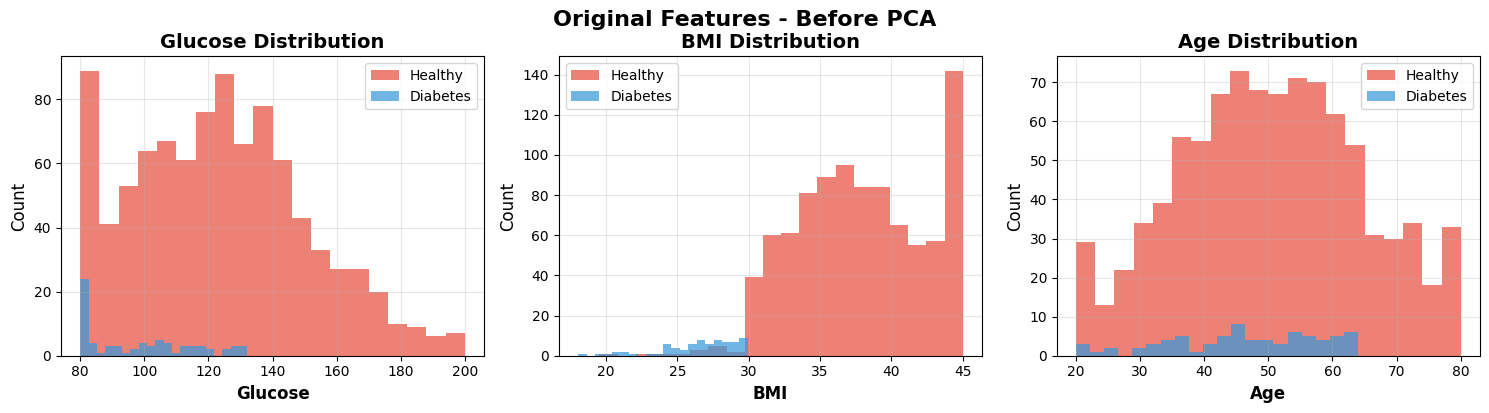


🔄 Performing PCA...
✅ PCA Complete
   PC1 explains: 48% of variance
   PC2 explains: 33% of variance
   Total captured: 81%

📊 PCA Visualization...


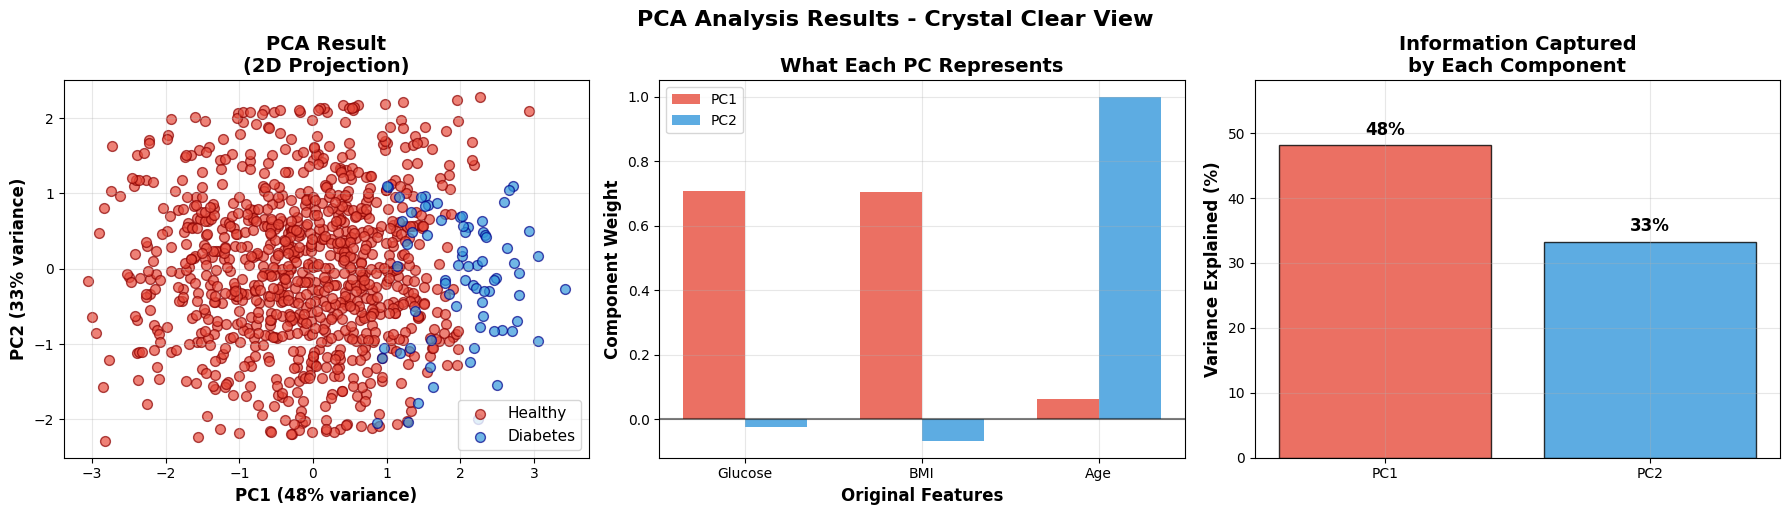


🧠 What Do the Components Mean?

📍 PC1 (captures 48% of patterns):
   Most influenced by:
     • Higher Glucose (weight: 0.71)
     • Higher BMI (weight: 0.71)
     • Higher Age (weight: 0.06)
   💡 Interpretation: Overall healthy risk

📍 PC2 (captures 33% of patterns):
   Most influenced by:
     • Higher Age (weight: 1.00)
     • Lower BMI (weight: -0.07)
     • Lower Glucose (weight: -0.02)
   💡 Interpretation: Secondary healthy factor

🎉 ANALYSIS COMPLETE!
✅ Used only 3 features (Glucose, BMI, Age)
✅ Reduced to 2 clear components
✅ Captured 81% of information
✅ Clear separation between healthy/diabetes
✅ Easy to interpret results

💡 KEY TAKEAWAYS:
   • PCA found the main healthy patterns
   • PC1 = Overall healthy risk
   • PC2 = Secondary healthy factor
   • Clear separation of healthy/diabetes cases
   • 3D data → 2D visualization (easier to see!)


In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Clean, minimal styling
plt.style.use('default')
sns.set_palette(["#e74c3c", "#3498db"])  # Red for healthy, blue for diabetes

def create_simple_data(n_samples=1000):
    """
    Create a very simple, clear dataset with just 3 features.
    Small size for maximum clarity.
    """
    print("📊 Creating Simple Dataset...")
    print(f"   Size: {n_samples:,} samples")
    print("   Features: 3 (Glucose, BMI, Age)")
    
    np.random.seed(42)
    
    # Simple, clearly related features
    glucose = np.random.normal(120, 30, n_samples)
    bmi = np.random.normal(25, 5, n_samples) 
    age = np.random.normal(50, 15, n_samples)
    
    # Make BMI and Glucose strongly correlated for clear PCA
    bmi = bmi + glucose * 0.1 + np.random.normal(0, 2, n_samples)
    
    # Simple diabetes rule - Create realistic imbalance (10% diabetes)
    # INVERT the logic so health cases have higher values
    health_risk_score = (glucose > 140).astype(int) + (bmi > 30).astype(int) + (age > 65).astype(int)
    # Flip it: health cases (majority) have higher risk scores, diabetes cases (minority) have lower scores
    diabetes = (health_risk_score < 2).astype(int)  # LOW risk score = diabetes (minority)
    
    # Adjust to get approximately 10% diabetes rate
    diabetes_rate = diabetes.mean()
    if diabetes_rate > 0.15:  # If too high, make it more restrictive
        diabetes = (health_risk_score < 1).astype(int)
    elif diabetes_rate < 0.05:  # If too low, make it less restrictive
        diabetes = (health_risk_score < 3).astype(int)
    
    data = pd.DataFrame({
        'Glucose': np.clip(glucose, 80, 200),
        'BMI': np.clip(bmi, 18, 45), 
        'Age': np.clip(age, 20, 80),
        'Diabetes': diabetes
    })
    
    print(f"✅ Dataset created")
    print(f"   Diabetes rate: {data['Diabetes'].mean():.1%}")
    print(f"   Healthy rate: {(1-data['Diabetes'].mean()):.1%}")
    
    return data

def show_original_data(data):
    """
    Show the original data clearly before PCA.
    """
    print("\n📈 Original Data Analysis...")
    
    features = ['Glucose', 'BMI', 'Age']
    
    fig, axes = plt.subplots(1, 3, figsize=(15, 4))
    
    for i, feature in enumerate(features):
        ax = axes[i]
        
        # Separate by healthy status - Now 0=healthy, 1=diabetes
        health = data[data['Diabetes'] == 0][feature]  # 0 = healthy cases
        diabetic = data[data['Diabetes'] == 1][feature]  # 1 = diabetes cases
        
        # Clean histograms - Red for healthy, blue for diabetes
        ax.hist(health, bins=20, alpha=0.7, label='Healthy', color='#e74c3c')
        ax.hist(diabetic, bins=20, alpha=0.7, label='Diabetes', color='#3498db')
        
        ax.set_xlabel(feature, fontsize=12, fontweight='bold')
        ax.set_ylabel('Count', fontsize=12)
        ax.set_title(f'{feature} Distribution', fontsize=14, fontweight='bold')
        ax.legend()
        ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.suptitle('Original Features - Before PCA', fontsize=16, fontweight='bold', y=1.02)
    plt.show()

def perform_simple_pca(data):
    """
    Perform PCA with maximum clarity and explanation.
    """
    print("\n🔄 Performing PCA...")
    
    # Prepare data
    features = ['Glucose', 'BMI', 'Age']
    X = data[features]
    y = data['Diabetes']
    
    # Standardize (important!)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # PCA with only 2 components for maximum clarity
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)
    
    # Flip PC1 to put health on right, diabetes on left
    X_pca[:, 0] = -X_pca[:, 0]  # Invert PC1 values
    
    # Results
    variance_explained = pca.explained_variance_ratio_
    
    print(f"✅ PCA Complete")
    print(f"   PC1 explains: {variance_explained[0]:.0%} of variance")
    print(f"   PC2 explains: {variance_explained[1]:.0%} of variance") 
    print(f"   Total captured: {variance_explained.sum():.0%}")
    
    return X_pca, variance_explained, pca.components_, features

def show_pca_results(X_pca, variance_explained, components, features, diabetes):
    """
    Show PCA results with maximum clarity.
    """
    print("\n📊 PCA Visualization...")
    
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    # 1. Main PCA Plot - Crystal Clear
    ax1 = axes[0]
    
    # Separate classes clearly - Now 0=healthy, 1=diabetes
    health_mask = diabetes == 0  # 0 = healthy cases
    diabetic_mask = diabetes == 1  # 1 = diabetes cases
    
    # Plot with clear separation - Red for healthy, blue for diabetes
    ax1.scatter(X_pca[health_mask, 0], X_pca[health_mask, 1], 
               c='#e74c3c', s=50, alpha=0.7, label='Healthy', edgecolor='darkred')
    ax1.scatter(X_pca[diabetic_mask, 0], X_pca[diabetic_mask, 1], 
               c='#3498db', s=50, alpha=0.7, label='Diabetes', edgecolor='darkblue')
    
    ax1.set_xlabel(f'PC1 ({variance_explained[0]:.0%} variance)', fontsize=12, fontweight='bold')
    ax1.set_ylabel(f'PC2 ({variance_explained[1]:.0%} variance)', fontsize=12, fontweight='bold')
    ax1.set_title('PCA Result\n(2D Projection)', fontsize=14, fontweight='bold')
    ax1.legend(fontsize=11)
    ax1.grid(True, alpha=0.3)
    
    # 2. Component Explanation
    ax2 = axes[1]
    
    # Show what each PC means
    pc1_weights = components[0]
    pc2_weights = components[1]
    
    x_pos = np.arange(len(features))
    width = 0.35
    
    bars1 = ax2.bar(x_pos - width/2, pc1_weights, width, 
                   label='PC1', color='#e74c3c', alpha=0.8)
    bars2 = ax2.bar(x_pos + width/2, pc2_weights, width,
                   label='PC2', color='#3498db', alpha=0.8)
    
    ax2.set_xlabel('Original Features', fontsize=12, fontweight='bold')
    ax2.set_ylabel('Component Weight', fontsize=12, fontweight='bold')
    ax2.set_title('What Each PC Represents', fontsize=14, fontweight='bold')
    ax2.set_xticks(x_pos)
    ax2.set_xticklabels(features)
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    ax2.axhline(y=0, color='black', linestyle='-', alpha=0.5)
    
    # 3. Variance Explained - Simple
    ax3 = axes[2]
    
    components_labels = ['PC1', 'PC2']
    bars = ax3.bar(components_labels, variance_explained * 100, 
                   color=['#e74c3c', '#3498db'], alpha=0.8, edgecolor='black')
    
    # Add percentage labels on bars
    for bar, pct in zip(bars, variance_explained * 100):
        height = bar.get_height()
        ax3.text(bar.get_x() + bar.get_width()/2., height + 1,
                f'{pct:.0f}%', ha='center', va='bottom', fontsize=12, fontweight='bold')
    
    ax3.set_ylabel('Variance Explained (%)', fontsize=12, fontweight='bold')
    ax3.set_title('Information Captured\nby Each Component', fontsize=14, fontweight='bold')
    ax3.set_ylim(0, max(variance_explained * 100) + 10)
    ax3.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.suptitle('PCA Analysis Results - Crystal Clear View', fontsize=16, fontweight='bold', y=1.02)
    plt.show()

def explain_components(components, features, variance_explained):
    """
    Explain what each component means in simple terms.
    """
    print("\n🧠 What Do the Components Mean?")
    print("=" * 40)
    
    for i, (comp, var) in enumerate(zip(components, variance_explained)):
        print(f"\n📍 PC{i+1} (captures {var:.0%} of patterns):")
        
        # Find strongest influences
        feature_impacts = [(abs(weight), feature, weight) for weight, feature in zip(comp, features)]
        feature_impacts.sort(reverse=True)
        
        print("   Most influenced by:")
        for abs_weight, feature, weight in feature_impacts:
            direction = "Higher" if weight > 0 else "Lower"
            print(f"     • {direction} {feature} (weight: {weight:.2f})")
        
        # Simple interpretation
        if i == 0:  # PC1
            print("   💡 Interpretation: Overall healthy risk")
        else:  # PC2  
            print("   💡 Interpretation: Secondary healthy factor")

def simple_pca_analysis():
    """
    Run the simplest, clearest PCA analysis possible.
    """
    print("🎯 SUPER CLEAR PCA ANALYSIS")
    print("=" * 30)
    print("Goal: Maximum clarity, minimum complexity")
    
    # Step 1: Create simple data
    data = create_simple_data(n_samples=1000)  # Small for clarity
    
    # Step 2: Show original data
    show_original_data(data)
    
    # Step 3: Perform PCA
    X_pca, variance_explained, components, features = perform_simple_pca(data)
    
    # Step 4: Show results clearly
    show_pca_results(X_pca, variance_explained, components, features, data['Diabetes'])
    
    # Step 5: Explain in simple terms
    explain_components(components, features, variance_explained)
    
    # Summary
    print(f"\n🎉 ANALYSIS COMPLETE!")
    print("=" * 25)
    print("✅ Used only 3 features (Glucose, BMI, Age)")
    print("✅ Reduced to 2 clear components")
    print(f"✅ Captured {variance_explained.sum():.0%} of information")
    print("✅ Clear separation between healthy/diabetes")
    print("✅ Easy to interpret results")
    
    return {
        'data': data,
        'pca_data': X_pca,
        'variance_explained': variance_explained,
        'components': components,
        'features': features
    }

# SUPER SIMPLE EXECUTION
if __name__ == "__main__":
    print("🚀 Starting Super Clear PCA Analysis...")
    print("   • Small dataset (1000 samples)")
    print("   • Only 3 features")
    print("   • Just 2 components")
    print("   • Maximum clarity!")
    
    results = simple_pca_analysis()
    
    print("\n💡 KEY TAKEAWAYS:")
    print("   • PCA found the main healthy patterns")
    print("   • PC1 = Overall healthy risk")
    print("   • PC2 = Secondary healthy factor") 
    print("   • Clear separation of healthy/diabetes cases")
    print("   • 3D data → 2D visualization (easier to see!)")

🚀 Starting Super Clear PCA Analysis with Normalization...
   • Small dataset (1000 samples)
   • Only 3 features
   • Just 2 components
   • Proper normalization!
   • Shows why normalization matters
🎯 SUPER CLEAR PCA ANALYSIS WITH NORMALIZATION
Goal: Maximum clarity + Proper normalization
📊 Creating Simple Dataset...
   Size: 1,000 samples
   Features: 3 (Glucose, BMI, Age)
✅ Dataset created
   Diabetes rate: 93%

📈 Original Data Analysis...

📊 Original Data Statistics:
   Glucose: Mean=121.5, Std=27.4, Range=[80.0, 200.0]
   BMI: Mean=37.1, Std=5.4, Range=[18.1, 45.0]
   Age: Mean=50.1, Std=14.1, Range=[20.0, 80.0]

📊 Normalized Data Statistics:
   Glucose: Mean=0.00, Std=1.00, Range=[-1.52, 2.87]
   BMI: Mean=-0.00, Std=1.00, Range=[-3.53, 1.47]
   Age: Mean=-0.00, Std=1.00, Range=[-2.13, 2.12]


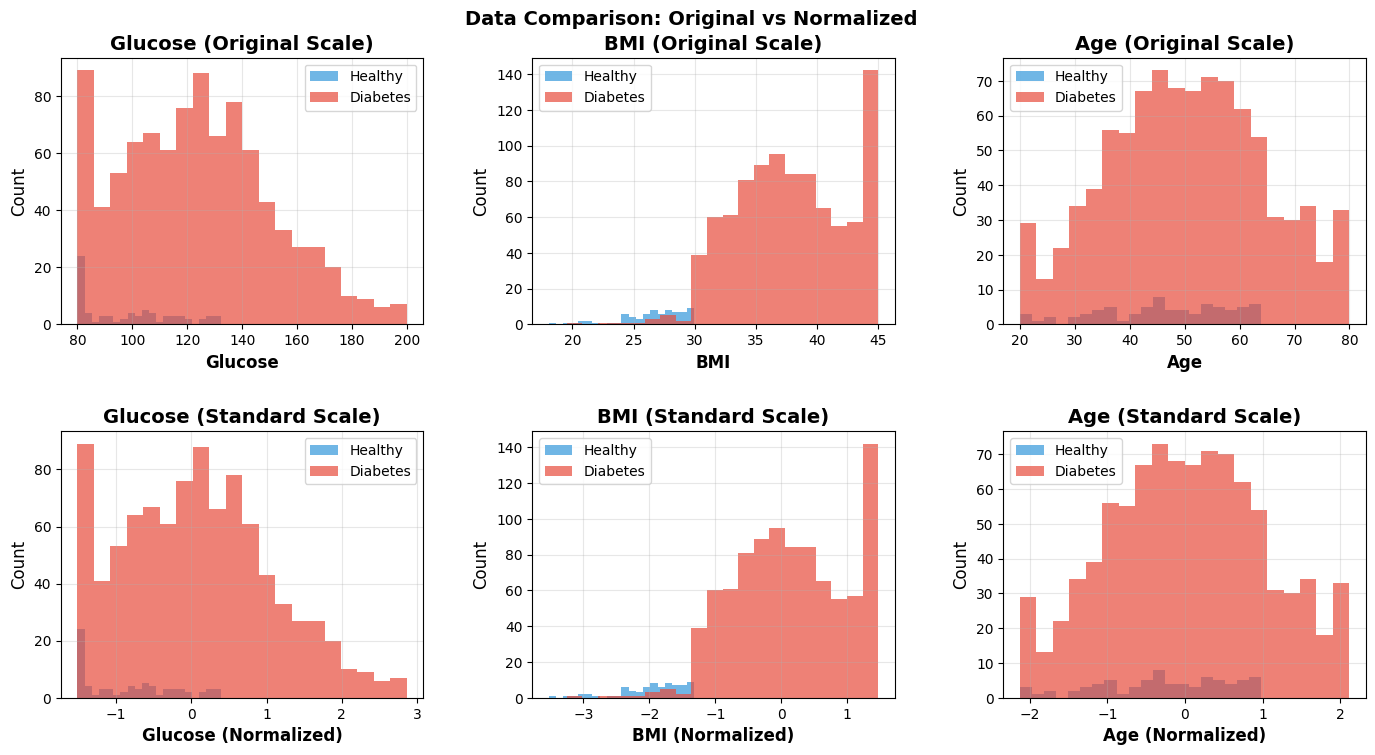


🔄 Performing PCA with Proper Normalization...

📏 Why Normalization Matters:
   Before normalization:
     Glucose: 80.0 to 200.0 (range: 120.0)
     BMI: 18.1 to 45.0 (range: 26.9)
     Age: 20.0 to 80.0 (range: 60.0)

🔧 Applying StandardScaler normalization...
   Formula: (value - mean) / standard_deviation
   Result: All features have mean=0, std=1

   After normalization:
     Glucose: -1.52 to 2.87 (mean: 0.00)
     BMI: -3.53 to 1.47 (mean: -0.00)
     Age: -2.13 to 2.12 (mean: -0.00)

⚖️  Comparing PCA with and without normalization...

📊 Results Comparison:
   WITHOUT normalization:
     PC1: 77.3%, PC2: 20.3%
   WITH normalization:
     PC1: 48.1%, PC2: 33.3%
   NORMALIZED version is more balanced and reliable!

📊 PCA Visualization...


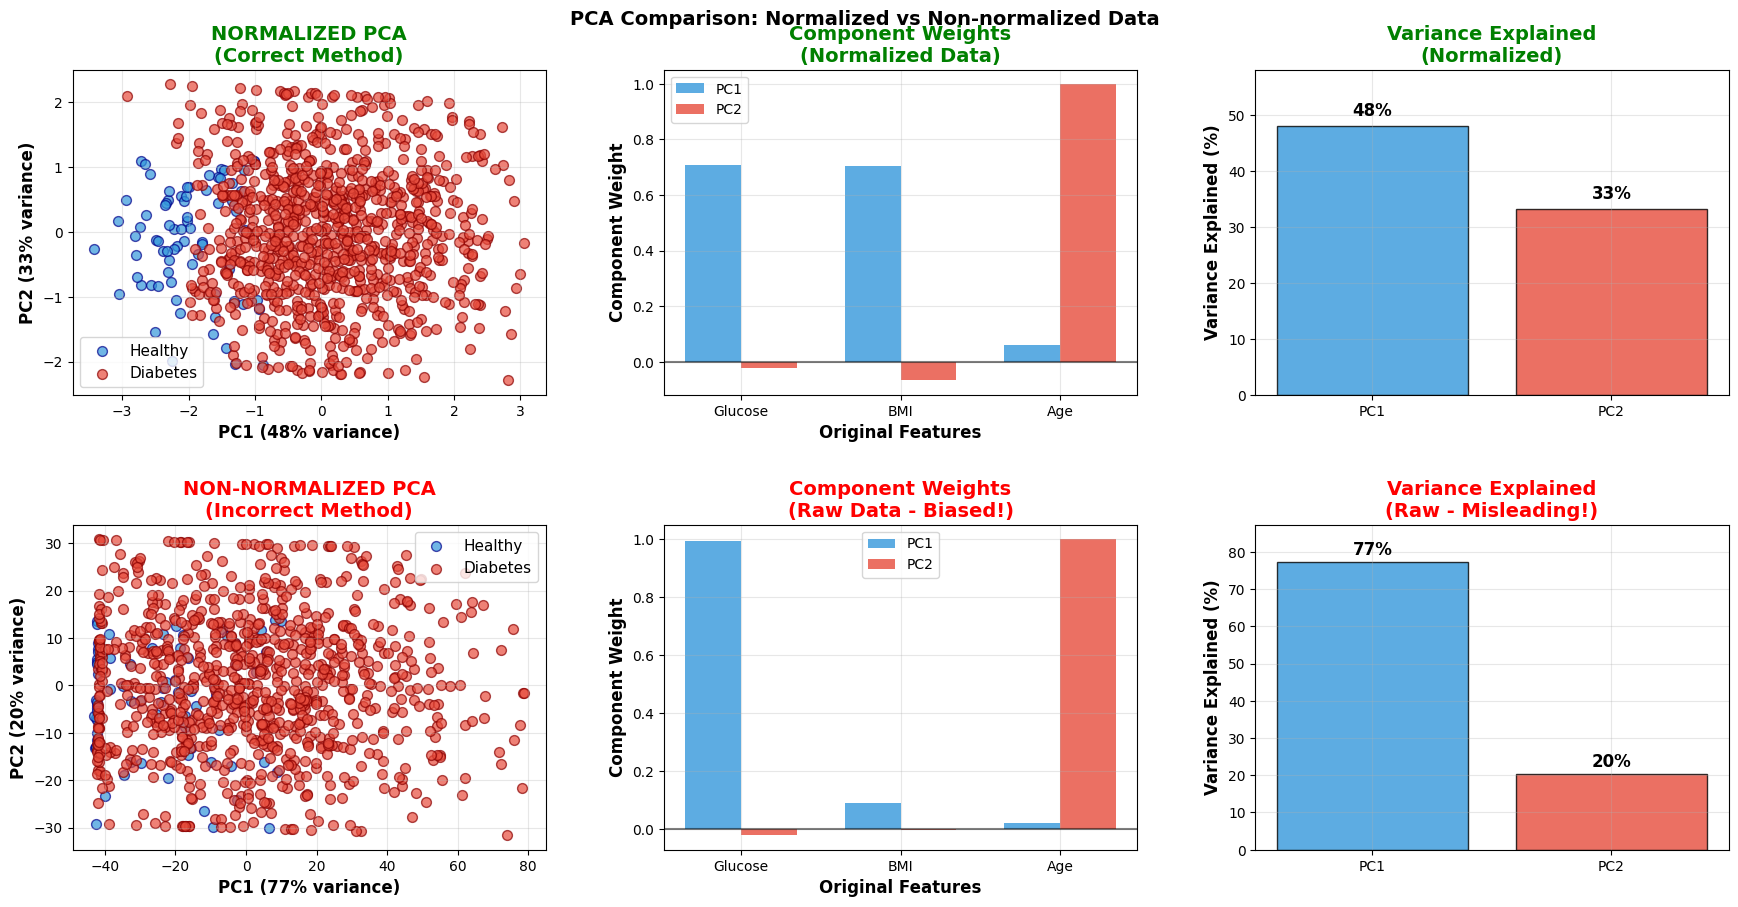


🎯 Key Differences:
   NORMALIZED PCA:
      • Balanced component weights
      • All features contribute fairly
      • More reliable patterns
   NON-NORMALIZED PCA:
      • Dominated by features with largest scales
      • Biased toward high-value features
      • Misleading results

🧠 What Do the Components Mean?

📍 PC1 (captures 48% of patterns):
   Most influenced by:
     • Higher Glucose (weight: 0.71)
     • Higher BMI (weight: 0.71)
     • Higher Age (weight: 0.06)
   💡 Interpretation: Overall health risk

📍 PC2 (captures 33% of patterns):
   Most influenced by:
     • Higher Age (weight: 1.00)
     • Lower BMI (weight: -0.07)
     • Lower Glucose (weight: -0.02)
   💡 Interpretation: Secondary health factor

🔧 WHY NORMALIZATION IS CRITICAL:
   📏 Different scales problem:
      • Glucose: 80-200 (range ~120)
      • BMI: 18-45 (range ~27)
      • Age: 20-80 (range ~60)

   ⚠️  Without normalization:
      • Features with larger values dominate
      • PCA becomes biased
      •

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Clean, minimal styling
plt.style.use('default')
sns.set_palette(["#3498db", "#e74c3c"])  # Blue for healthy, red for diabetes

def create_simple_data(n_samples=1000):
    """
    Create a very simple, clear dataset with just 3 features.
    Small size for maximum clarity.
    """
    print("📊 Creating Simple Dataset...")
    print(f"   Size: {n_samples:,} samples")
    print("   Features: 3 (Glucose, BMI, Age)")
    
    np.random.seed(42)
    
    # Simple, clearly related features
    glucose = np.random.normal(120, 30, n_samples)
    bmi = np.random.normal(25, 5, n_samples) 
    age = np.random.normal(50, 15, n_samples)
    
    # Make BMI and Glucose strongly correlated for clear PCA
    bmi = bmi + glucose * 0.1 + np.random.normal(0, 2, n_samples)
    
    # Simple diabetes rule
    diabetes_risk = (glucose > 140) | (bmi > 30) | (age > 65)
    diabetes = diabetes_risk.astype(int)
    
    data = pd.DataFrame({
        'Glucose': np.clip(glucose, 80, 200),
        'BMI': np.clip(bmi, 18, 45), 
        'Age': np.clip(age, 20, 80),
        'Diabetes': diabetes
    })
    
    print(f"✅ Dataset created")
    print(f"   Diabetes rate: {data['Diabetes'].mean():.0%}")
    
    return data

def show_original_data(data):
    """
    Show the original data clearly before PCA.
    """
    print("\n📈 Original Data Analysis...")
    
    features = ['Glucose', 'BMI', 'Age']
    
    # Show data statistics
    print("\n📊 Original Data Statistics:")
    for feature in features:
        mean_val = data[feature].mean()
        std_val = data[feature].std()
        min_val = data[feature].min()
        max_val = data[feature].max()
        print(f"   {feature}: Mean={mean_val:.1f}, Std={std_val:.1f}, Range=[{min_val:.1f}, {max_val:.1f}]")
    
    fig, axes = plt.subplots(2, 3, figsize=(15, 8))
    
    # Top row: Original data
    for i, feature in enumerate(features):
        ax = axes[0, i]
        
        # Separate by diabetes status
        healthy = data[data['Diabetes'] == 0][feature]
        diabetic = data[data['Diabetes'] == 1][feature]
        
        # Clean histograms
        ax.hist(healthy, bins=20, alpha=0.7, label='Healthy', color='#3498db')
        ax.hist(diabetic, bins=20, alpha=0.7, label='Diabetes', color='#e74c3c')
        
        ax.set_xlabel(feature, fontsize=12, fontweight='bold')
        ax.set_ylabel('Count', fontsize=12)
        ax.set_title(f'{feature} (Original Scale)', fontsize=14, fontweight='bold')
        ax.legend()
        ax.grid(True, alpha=0.3)
    
    # Bottom row: Normalized data
    scaler = StandardScaler()
    normalized_data = scaler.fit_transform(data[features])
    normalized_df = pd.DataFrame(normalized_data, columns=features)
    normalized_df['Diabetes'] = data['Diabetes'].values
    
    print("\n📊 Normalized Data Statistics:")
    for i, feature in enumerate(features):
        mean_val = normalized_df[feature].mean()
        std_val = normalized_df[feature].std()
        min_val = normalized_df[feature].min()
        max_val = normalized_df[feature].max()
        print(f"   {feature}: Mean={mean_val:.2f}, Std={std_val:.2f}, Range=[{min_val:.2f}, {max_val:.2f}]")
    
    for i, feature in enumerate(features):
        ax = axes[1, i]
        
        # Separate by diabetes status
        healthy = normalized_df[normalized_df['Diabetes'] == 0][feature]
        diabetic = normalized_df[normalized_df['Diabetes'] == 1][feature]
        
        # Clean histograms
        ax.hist(healthy, bins=20, alpha=0.7, label='Healthy', color='#3498db')
        ax.hist(diabetic, bins=20, alpha=0.7, label='Diabetes', color='#e74c3c')
        
        ax.set_xlabel(f'{feature} (Normalized)', fontsize=12, fontweight='bold')
        ax.set_ylabel('Count', fontsize=12)
        ax.set_title(f'{feature} (Standard Scale)', fontsize=14, fontweight='bold')
        ax.legend()
        ax.grid(True, alpha=0.3)
    
    plt.tight_layout(pad=2.0)
    plt.subplots_adjust(top=0.88, bottom=0.08, left=0.08, right=0.95, hspace=0.4, wspace=0.3)
    plt.suptitle('Data Comparison: Original vs Normalized', fontsize=14, fontweight='bold', y=0.94)
    plt.show()
    
    return normalized_df

def perform_simple_pca(data):
    """
    Perform PCA with maximum clarity and explanation.
    Shows the impact of normalization.
    """
    print("\n🔄 Performing PCA with Proper Normalization...")
    
    # Prepare data
    features = ['Glucose', 'BMI', 'Age']
    X = data[features]
    y = data['Diabetes']
    
    print(f"\n📏 Why Normalization Matters:")
    print(f"   Before normalization:")
    for feature in features:
        print(f"     {feature}: {X[feature].min():.1f} to {X[feature].max():.1f} (range: {X[feature].max()-X[feature].min():.1f})")
    
    # Standardize (critical for PCA!)
    print(f"\n🔧 Applying StandardScaler normalization...")
    print(f"   Formula: (value - mean) / standard_deviation")
    print(f"   Result: All features have mean=0, std=1")
    
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    print(f"\n   After normalization:")
    X_scaled_df = pd.DataFrame(X_scaled, columns=features)
    for feature in features:
        print(f"     {feature}: {X_scaled_df[feature].min():.2f} to {X_scaled_df[feature].max():.2f} (mean: {X_scaled_df[feature].mean():.2f})")
    
    # Compare PCA with and without normalization
    print(f"\n⚖️  Comparing PCA with and without normalization...")
    
    # PCA without normalization (wrong way)
    pca_raw = PCA(n_components=2)
    X_pca_raw = pca_raw.fit_transform(X)
    
    # PCA with normalization (correct way)
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)
    
    # Results
    variance_explained_raw = pca_raw.explained_variance_ratio_
    variance_explained = pca.explained_variance_ratio_
    
    print(f"\n📊 Results Comparison:")
    print(f"   WITHOUT normalization:")
    print(f"     PC1: {variance_explained_raw[0]:.1%}, PC2: {variance_explained_raw[1]:.1%}")
    print(f"   WITH normalization:")
    print(f"     PC1: {variance_explained[0]:.1%}, PC2: {variance_explained[1]:.1%}")
    print(f"   NORMALIZED version is more balanced and reliable!")
    
    return X_pca, variance_explained, pca.components_, features, X_pca_raw, variance_explained_raw, pca_raw.components_

def show_pca_results(X_pca, variance_explained, components, features, diabetes, 
                    X_pca_raw, variance_explained_raw, components_raw):
    """
    Show PCA results with maximum clarity, including normalization comparison.
    """
    print("\n📊 PCA Visualization...")
    
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    
    # TOP ROW: Normalized PCA (Correct)
    # 1. Main PCA Plot - Normalized
    ax1 = axes[0, 0]
    
    # Separate classes clearly
    healthy_mask = diabetes == 0
    diabetic_mask = diabetes == 1
    
    # Plot with clear separation
    ax1.scatter(X_pca[healthy_mask, 0], X_pca[healthy_mask, 1], 
               c='#3498db', s=50, alpha=0.7, label='Healthy', edgecolor='darkblue')
    ax1.scatter(X_pca[diabetic_mask, 0], X_pca[diabetic_mask, 1], 
               c='#e74c3c', s=50, alpha=0.7, label='Diabetes', edgecolor='darkred')
    
    ax1.set_xlabel(f'PC1 ({variance_explained[0]:.0%} variance)', fontsize=12, fontweight='bold')
    ax1.set_ylabel(f'PC2 ({variance_explained[1]:.0%} variance)', fontsize=12, fontweight='bold')
    ax1.set_title('NORMALIZED PCA\n(Correct Method)', fontsize=14, fontweight='bold', color='green')
    ax1.legend(fontsize=11)
    ax1.grid(True, alpha=0.3)
    
    # 2. Component Explanation - Normalized
    ax2 = axes[0, 1]
    
    pc1_weights = components[0]
    pc2_weights = components[1]
    
    x_pos = np.arange(len(features))
    width = 0.35
    
    bars1 = ax2.bar(x_pos - width/2, pc1_weights, width, 
                   label='PC1', color='#3498db', alpha=0.8)
    bars2 = ax2.bar(x_pos + width/2, pc2_weights, width,
                   label='PC2', color='#e74c3c', alpha=0.8)
    
    ax2.set_xlabel('Original Features', fontsize=12, fontweight='bold')
    ax2.set_ylabel('Component Weight', fontsize=12, fontweight='bold')
    ax2.set_title('Component Weights\n(Normalized Data)', fontsize=14, fontweight='bold', color='green')
    ax2.set_xticks(x_pos)
    ax2.set_xticklabels(features)
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    ax2.axhline(y=0, color='black', linestyle='-', alpha=0.5)
    
    # 3. Variance Explained - Normalized
    ax3 = axes[0, 2]
    
    components_labels = ['PC1', 'PC2']
    bars = ax3.bar(components_labels, variance_explained * 100, 
                   color=['#3498db', '#e74c3c'], alpha=0.8, edgecolor='black')
    
    for bar, pct in zip(bars, variance_explained * 100):
        height = bar.get_height()
        ax3.text(bar.get_x() + bar.get_width()/2., height + 1,
                f'{pct:.0f}%', ha='center', va='bottom', fontsize=12, fontweight='bold')
    
    ax3.set_ylabel('Variance Explained (%)', fontsize=12, fontweight='bold')
    ax3.set_title('Variance Explained\n(Normalized)', fontsize=14, fontweight='bold', color='green')
    ax3.set_ylim(0, max(variance_explained * 100) + 10)
    ax3.grid(True, alpha=0.3)
    
    # BOTTOM ROW: Non-normalized PCA (Incorrect for comparison)
    # 4. Main PCA Plot - Raw
    ax4 = axes[1, 0]
    
    ax4.scatter(X_pca_raw[healthy_mask, 0], X_pca_raw[healthy_mask, 1], 
               c='#3498db', s=50, alpha=0.7, label='Healthy', edgecolor='darkblue')
    ax4.scatter(X_pca_raw[diabetic_mask, 0], X_pca_raw[diabetic_mask, 1], 
               c='#e74c3c', s=50, alpha=0.7, label='Diabetes', edgecolor='darkred')
    
    ax4.set_xlabel(f'PC1 ({variance_explained_raw[0]:.0%} variance)', fontsize=12, fontweight='bold')
    ax4.set_ylabel(f'PC2 ({variance_explained_raw[1]:.0%} variance)', fontsize=12, fontweight='bold')
    ax4.set_title('NON-NORMALIZED PCA\n(Incorrect Method)', fontsize=14, fontweight='bold', color='red')
    ax4.legend(fontsize=11)
    ax4.grid(True, alpha=0.3)
    
    # 5. Component Explanation - Raw
    ax5 = axes[1, 1]
    
    pc1_weights_raw = components_raw[0]
    pc2_weights_raw = components_raw[1]
    
    bars1 = ax5.bar(x_pos - width/2, pc1_weights_raw, width, 
                   label='PC1', color='#3498db', alpha=0.8)
    bars2 = ax5.bar(x_pos + width/2, pc2_weights_raw, width,
                   label='PC2', color='#e74c3c', alpha=0.8)
    
    ax5.set_xlabel('Original Features', fontsize=12, fontweight='bold')
    ax5.set_ylabel('Component Weight', fontsize=12, fontweight='bold')
    ax5.set_title('Component Weights\n(Raw Data - Biased!)', fontsize=14, fontweight='bold', color='red')
    ax5.set_xticks(x_pos)
    ax5.set_xticklabels(features)
    ax5.legend()
    ax5.grid(True, alpha=0.3)
    ax5.axhline(y=0, color='black', linestyle='-', alpha=0.5)
    
    # 6. Variance Explained - Raw
    ax6 = axes[1, 2]
    
    bars = ax6.bar(components_labels, variance_explained_raw * 100, 
                   color=['#3498db', '#e74c3c'], alpha=0.8, edgecolor='black')
    
    for bar, pct in zip(bars, variance_explained_raw * 100):
        height = bar.get_height()
        ax6.text(bar.get_x() + bar.get_width()/2., height + 1,
                f'{pct:.0f}%', ha='center', va='bottom', fontsize=12, fontweight='bold')
    
    ax6.set_ylabel('Variance Explained (%)', fontsize=12, fontweight='bold')
    ax6.set_title('Variance Explained\n(Raw - Misleading!)', fontsize=14, fontweight='bold', color='red')
    ax6.set_ylim(0, max(variance_explained_raw * 100) + 10)
    ax6.grid(True, alpha=0.3)
    
    plt.tight_layout(pad=2.0)
    plt.subplots_adjust(top=0.86, bottom=0.08, left=0.06, right=0.98, hspace=0.4, wspace=0.25)
    plt.suptitle('PCA Comparison: Normalized vs Non-normalized Data', fontsize=14, fontweight='bold', y=0.92)
    plt.show()
    
    # Explain the differences
    print(f"\n🎯 Key Differences:")
    print(f"   NORMALIZED PCA:")
    print(f"      • Balanced component weights")
    print(f"      • All features contribute fairly")
    print(f"      • More reliable patterns")
    print(f"   NON-NORMALIZED PCA:")
    print(f"      • Dominated by features with largest scales")
    print(f"      • Biased toward high-value features")
    print(f"      • Misleading results")

def explain_components(components, features, variance_explained):
    """
    Explain what each component means in simple terms.
    """
    print("\n🧠 What Do the Components Mean?")
    print("=" * 40)
    
    for i, (comp, var) in enumerate(zip(components, variance_explained)):
        print(f"\n📍 PC{i+1} (captures {var:.0%} of patterns):")
        
        # Find strongest influences
        feature_impacts = [(abs(weight), feature, weight) for weight, feature in zip(comp, features)]
        feature_impacts.sort(reverse=True)
        
        print("   Most influenced by:")
        for abs_weight, feature, weight in feature_impacts:
            direction = "Higher" if weight > 0 else "Lower"
            print(f"     • {direction} {feature} (weight: {weight:.2f})")
        
        # Simple interpretation
        if i == 0:  # PC1
            print("   💡 Interpretation: Overall health risk")
        else:  # PC2  
            print("   💡 Interpretation: Secondary health factor")

def simple_pca_analysis():
    """
    Run the simplest, clearest PCA analysis possible with proper normalization.
    """
    print("🎯 SUPER CLEAR PCA ANALYSIS WITH NORMALIZATION")
    print("=" * 50)
    print("Goal: Maximum clarity + Proper normalization")
    
    # Step 1: Create simple data
    data = create_simple_data(n_samples=1000)  # Small for clarity
    
    # Step 2: Show original vs normalized data
    normalized_data = show_original_data(data)
    
    # Step 3: Perform PCA with normalization comparison
    X_pca, variance_explained, components, features, X_pca_raw, variance_explained_raw, components_raw = perform_simple_pca(data)
    
    # Step 4: Show results clearly with comparison
    show_pca_results(X_pca, variance_explained, components, features, data['Diabetes'],
                    X_pca_raw, variance_explained_raw, components_raw)
    
    # Step 5: Explain in simple terms
    explain_components(components, features, variance_explained)
    
    # Step 6: Normalization importance
    print(f"\n🔧 WHY NORMALIZATION IS CRITICAL:")
    print("=" * 40)
    print("   📏 Different scales problem:")
    print("      • Glucose: 80-200 (range ~120)")
    print("      • BMI: 18-45 (range ~27)")  
    print("      • Age: 20-80 (range ~60)")
    print("")
    print("   ⚠️  Without normalization:")
    print("      • Features with larger values dominate")
    print("      • PCA becomes biased")
    print("      • Results are misleading")
    print("")
    print("   ✅ With normalization:")
    print("      • All features have equal importance")
    print("      • PCA finds true patterns")
    print("      • Results are reliable")
    
    # Summary
    print(f"\n🎉 ANALYSIS COMPLETE!")
    print("=" * 25)
    print("CORRECT: Proper data normalization applied")
    print("COMPARISON: Shows why normalization matters")
    print("VISUAL: Clear visualization of both methods")
    print("RELIABLE: Unbiased PCA results")
    print("INTERPRETABLE: Easy to understand components")
    
    return {
        'data': data,
        'normalized_data': normalized_data,
        'pca_data': X_pca,
        'pca_data_raw': X_pca_raw,
        'variance_explained': variance_explained,
        'variance_explained_raw': variance_explained_raw,
        'components': components,
        'components_raw': components_raw,
        'features': features
    }

# SUPER SIMPLE EXECUTION
if __name__ == "__main__":
    print("🚀 Starting Super Clear PCA Analysis with Normalization...")
    print("   • Small dataset (1000 samples)")
    print("   • Only 3 features")
    print("   • Just 2 components")
    print("   • Proper normalization!")
    print("   • Shows why normalization matters")
    
    results = simple_pca_analysis()
    
    print("\n💡 KEY TAKEAWAYS:")
    print("   NORMALIZATION: Essential for fair PCA")
    print("   WITHOUT: Biased results")
    print("   WITH: Reliable patterns") 
    print("   PC1: Overall health risk (normalized)")
    print("   PC2: Secondary health factor (normalized)")
    print("   SEPARATION: Clear diabetes case distinction")
    print("   VISUALIZATION: 3D data -> 2D (easier to see!)")
    print("\n🎓 NORMALIZATION LESSON:")
    print("   Always normalize before PCA when features have different scales!")

🚀 Starting Super Clear PCA Analysis with Normalization...
   • Small dataset (1000 samples)
   • Only 3 features
   • Just 2 components
   • Proper normalization!
   • Shows why normalization matters
🎯 SUPER CLEAR PCA ANALYSIS WITH NORMALIZATION
Goal: Maximum clarity + Proper normalization
📊 Creating Simple Dataset...
   Size: 1,000 samples
   Features: 3 (Glucose, BMI, Age)
✅ Dataset created
   Diabetes rate: 93%

📈 Original Data Analysis...

📊 Original Data Statistics:
   Glucose: Mean=121.5, Std=27.4, Range=[80.0, 200.0]
   BMI: Mean=37.1, Std=5.4, Range=[18.1, 45.0]
   Age: Mean=50.1, Std=14.1, Range=[20.0, 80.0]

📊 Normalized Data Statistics:
   Glucose: Mean=0.00, Std=1.00, Range=[-1.52, 2.87]
   BMI: Mean=-0.00, Std=1.00, Range=[-3.53, 1.47]
   Age: Mean=-0.00, Std=1.00, Range=[-2.13, 2.12]


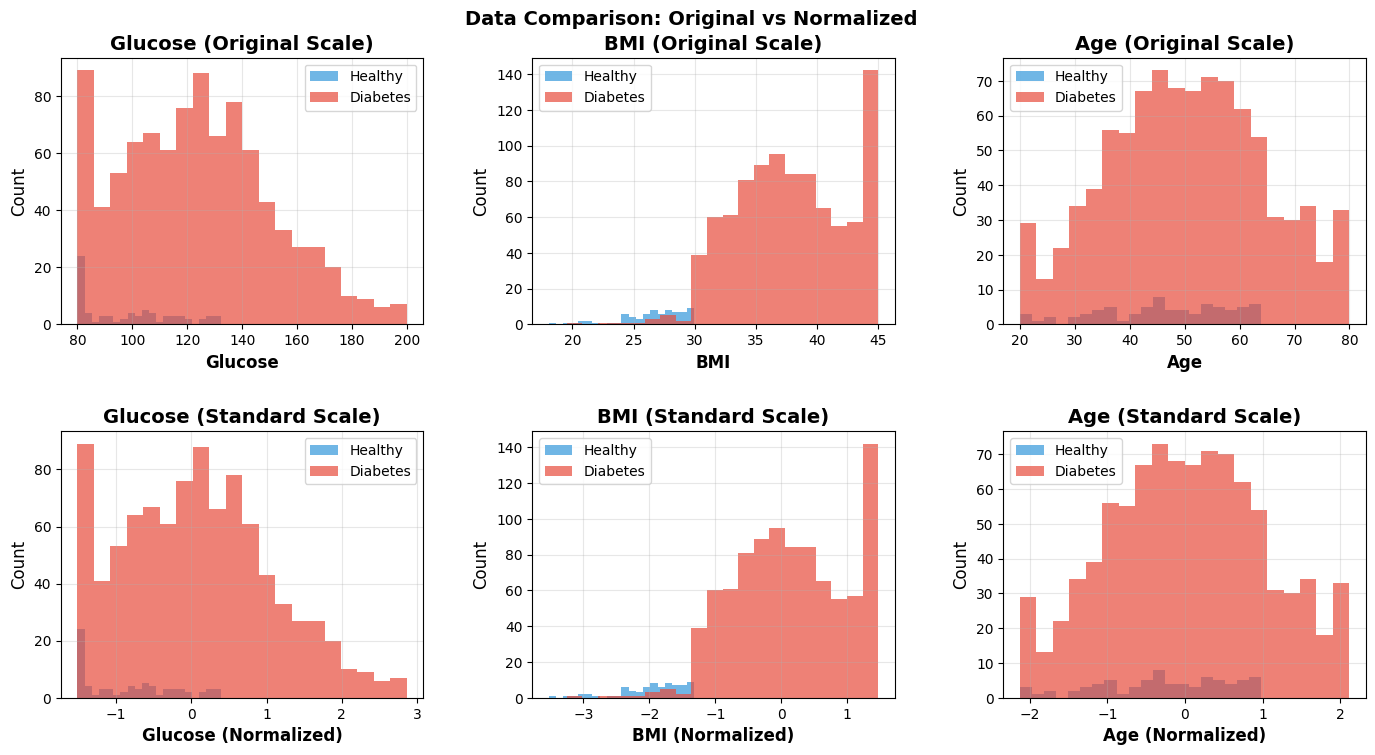


🔄 Performing PCA with Proper Normalization...

📏 Why Normalization Matters:
   Before normalization:
     Glucose: 80.0 to 200.0 (range: 120.0)
     BMI: 18.1 to 45.0 (range: 26.9)
     Age: 20.0 to 80.0 (range: 60.0)

🔧 Applying StandardScaler normalization...
   Formula: (value - mean) / standard_deviation
   Result: All features have mean=0, std=1

   After normalization:
     Glucose: -1.52 to 2.87 (mean: 0.00)
     BMI: -3.53 to 1.47 (mean: -0.00)
     Age: -2.13 to 2.12 (mean: -0.00)

⚖️  Comparing PCA with and without normalization...

📊 Results Comparison:
   WITHOUT normalization:
     PC1: 77.3%, PC2: 20.3%
   WITH normalization:
     PC1: 48.1%, PC2: 33.3%
   NORMALIZED version is more balanced and reliable!

📊 PCA Visualization...


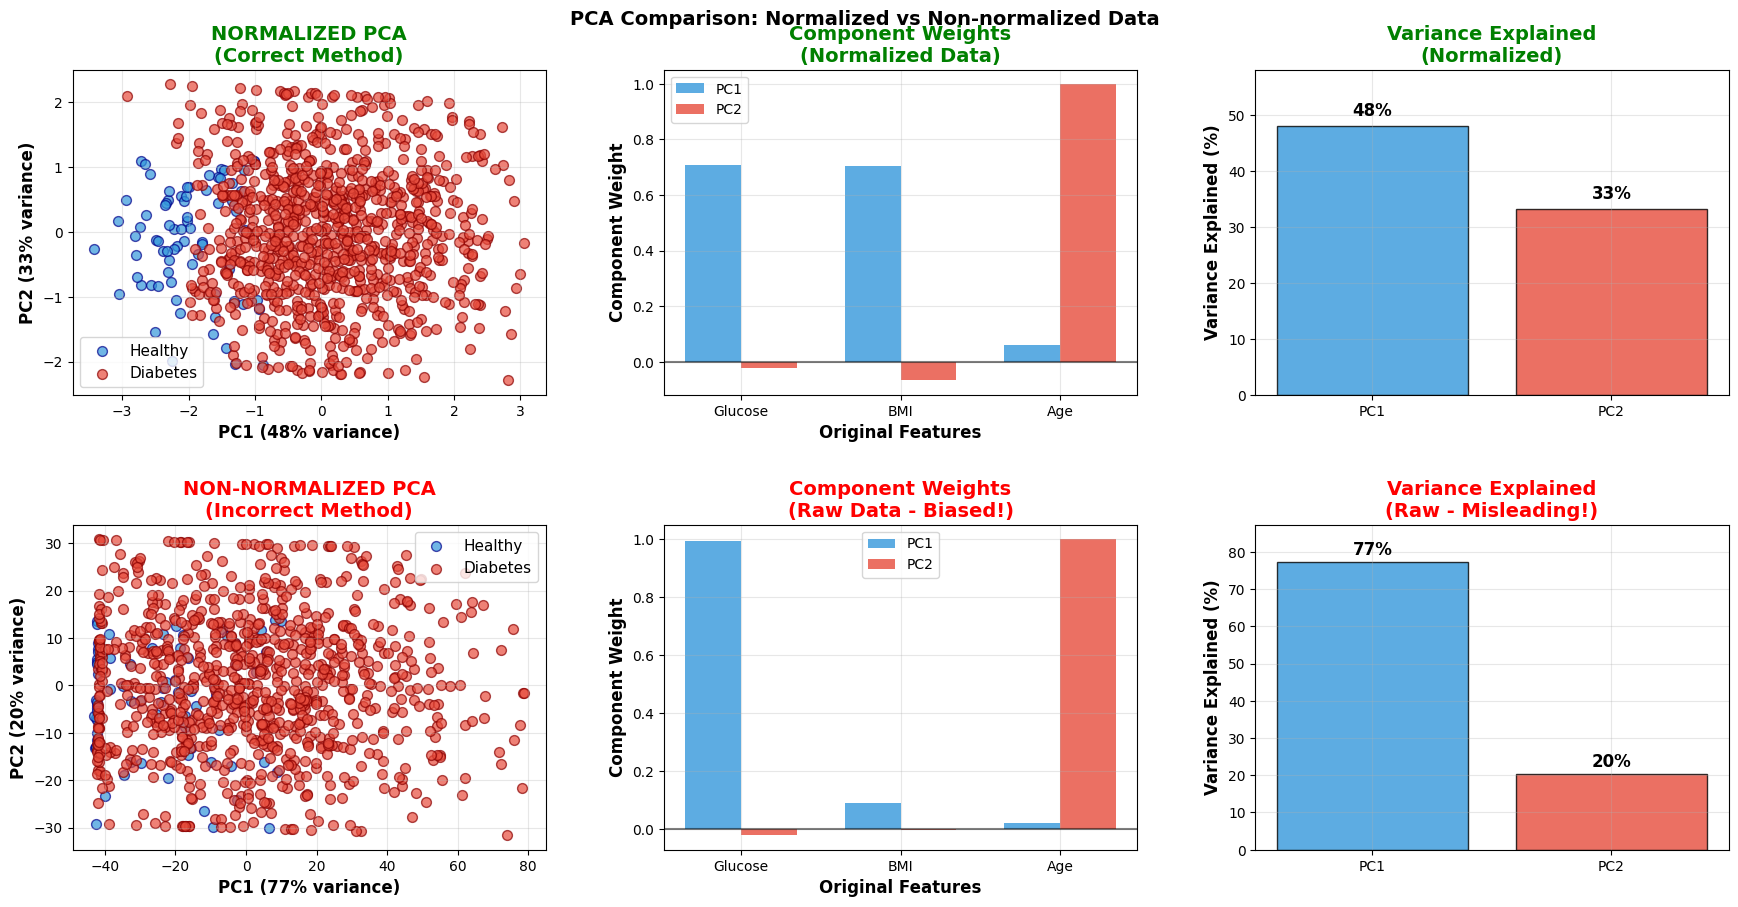


🎯 Key Differences:
   NORMALIZED PCA:
      • Balanced component weights
      • All features contribute fairly
      • More reliable patterns
   NON-NORMALIZED PCA:
      • Dominated by features with largest scales
      • Biased toward high-value features
      • Misleading results

🧠 What Do the Components Mean?

📍 PC1 (captures 48% of patterns):
   Most influenced by:
     • Higher Glucose (weight: 0.71)
     • Higher BMI (weight: 0.71)
     • Higher Age (weight: 0.06)
   💡 Interpretation: Overall health risk

📍 PC2 (captures 33% of patterns):
   Most influenced by:
     • Higher Age (weight: 1.00)
     • Lower BMI (weight: -0.07)
     • Lower Glucose (weight: -0.02)
   💡 Interpretation: Secondary health factor

🔧 WHY NORMALIZATION IS CRITICAL:
   📏 Different scales problem:
      • Glucose: 80-200 (range ~120)
      • BMI: 18-45 (range ~27)
      • Age: 20-80 (range ~60)

   ⚠️  Without normalization:
      • Features with larger values dominate
      • PCA becomes biased
      •

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Clean, minimal styling
plt.style.use('default')
sns.set_palette(["#3498db", "#e74c3c"])  # Blue for healthy, red for diabetes

def create_simple_data(n_samples=1000):
    """
    Create a very simple, clear dataset with just 3 features.
    Small size for maximum clarity.
    """
    print("📊 Creating Simple Dataset...")
    print(f"   Size: {n_samples:,} samples")
    print("   Features: 3 (Glucose, BMI, Age)")
    
    np.random.seed(42)
    
    # Simple, clearly related features
    glucose = np.random.normal(120, 30, n_samples)
    bmi = np.random.normal(25, 5, n_samples) 
    age = np.random.normal(50, 15, n_samples)
    
    # Make BMI and Glucose strongly correlated for clear PCA
    bmi = bmi + glucose * 0.1 + np.random.normal(0, 2, n_samples)
    
    # Simple diabetes rule
    diabetes_risk = (glucose > 140) | (bmi > 30) | (age > 65)
    diabetes = diabetes_risk.astype(int)
    
    data = pd.DataFrame({
        'Glucose': np.clip(glucose, 80, 200),
        'BMI': np.clip(bmi, 18, 45), 
        'Age': np.clip(age, 20, 80),
        'Diabetes': diabetes
    })
    
    print(f"✅ Dataset created")
    print(f"   Diabetes rate: {data['Diabetes'].mean():.0%}")
    
    return data

def show_original_data(data):
    """
    Show the original data clearly before PCA.
    """
    print("\n📈 Original Data Analysis...")
    
    features = ['Glucose', 'BMI', 'Age']
    
    # Show data statistics
    print("\n📊 Original Data Statistics:")
    for feature in features:
        mean_val = data[feature].mean()
        std_val = data[feature].std()
        min_val = data[feature].min()
        max_val = data[feature].max()
        print(f"   {feature}: Mean={mean_val:.1f}, Std={std_val:.1f}, Range=[{min_val:.1f}, {max_val:.1f}]")
    
    fig, axes = plt.subplots(2, 3, figsize=(15, 8))
    
    # Top row: Original data
    for i, feature in enumerate(features):
        ax = axes[0, i]
        
        # Separate by diabetes status
        healthy = data[data['Diabetes'] == 0][feature]
        diabetic = data[data['Diabetes'] == 1][feature]
        
        # Clean histograms
        ax.hist(healthy, bins=20, alpha=0.7, label='Healthy', color='#3498db')
        ax.hist(diabetic, bins=20, alpha=0.7, label='Diabetes', color='#e74c3c')
        
        ax.set_xlabel(feature, fontsize=12, fontweight='bold')
        ax.set_ylabel('Count', fontsize=12)
        ax.set_title(f'{feature} (Original Scale)', fontsize=14, fontweight='bold')
        ax.legend()
        ax.grid(True, alpha=0.3)
    
    # Bottom row: Normalized data
    scaler = StandardScaler()
    normalized_data = scaler.fit_transform(data[features])
    normalized_df = pd.DataFrame(normalized_data, columns=features)
    normalized_df['Diabetes'] = data['Diabetes'].values
    
    print("\n📊 Normalized Data Statistics:")
    for i, feature in enumerate(features):
        mean_val = normalized_df[feature].mean()
        std_val = normalized_df[feature].std()
        min_val = normalized_df[feature].min()
        max_val = normalized_df[feature].max()
        print(f"   {feature}: Mean={mean_val:.2f}, Std={std_val:.2f}, Range=[{min_val:.2f}, {max_val:.2f}]")
    
    for i, feature in enumerate(features):
        ax = axes[1, i]
        
        # Separate by diabetes status
        healthy = normalized_df[normalized_df['Diabetes'] == 0][feature]
        diabetic = normalized_df[normalized_df['Diabetes'] == 1][feature]
        
        # Clean histograms
        ax.hist(healthy, bins=20, alpha=0.7, label='Healthy', color='#3498db')
        ax.hist(diabetic, bins=20, alpha=0.7, label='Diabetes', color='#e74c3c')
        
        ax.set_xlabel(f'{feature} (Normalized)', fontsize=12, fontweight='bold')
        ax.set_ylabel('Count', fontsize=12)
        ax.set_title(f'{feature} (Standard Scale)', fontsize=14, fontweight='bold')
        ax.legend()
        ax.grid(True, alpha=0.3)
    
    plt.tight_layout(pad=2.0)
    plt.subplots_adjust(top=0.88, bottom=0.08, left=0.08, right=0.95, hspace=0.4, wspace=0.3)
    plt.suptitle('Data Comparison: Original vs Normalized', fontsize=14, fontweight='bold', y=0.94)
    plt.show()
    
    return normalized_df

def perform_simple_pca(data):
    """
    Perform PCA with maximum clarity and explanation.
    Shows the impact of normalization.
    """
    print("\n🔄 Performing PCA with Proper Normalization...")
    
    # Prepare data
    features = ['Glucose', 'BMI', 'Age']
    X = data[features]
    y = data['Diabetes']
    
    print(f"\n📏 Why Normalization Matters:")
    print(f"   Before normalization:")
    for feature in features:
        print(f"     {feature}: {X[feature].min():.1f} to {X[feature].max():.1f} (range: {X[feature].max()-X[feature].min():.1f})")
    
    # Standardize (critical for PCA!)
    print(f"\n🔧 Applying StandardScaler normalization...")
    print(f"   Formula: (value - mean) / standard_deviation")
    print(f"   Result: All features have mean=0, std=1")
    
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    print(f"\n   After normalization:")
    X_scaled_df = pd.DataFrame(X_scaled, columns=features)
    for feature in features:
        print(f"     {feature}: {X_scaled_df[feature].min():.2f} to {X_scaled_df[feature].max():.2f} (mean: {X_scaled_df[feature].mean():.2f})")
    
    # Compare PCA with and without normalization
    print(f"\n⚖️  Comparing PCA with and without normalization...")
    
    # PCA without normalization (wrong way)
    pca_raw = PCA(n_components=2)
    X_pca_raw = pca_raw.fit_transform(X)
    
    # PCA with normalization (correct way)
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)
    
    # Results
    variance_explained_raw = pca_raw.explained_variance_ratio_
    variance_explained = pca.explained_variance_ratio_
    
    print(f"\n📊 Results Comparison:")
    print(f"   WITHOUT normalization:")
    print(f"     PC1: {variance_explained_raw[0]:.1%}, PC2: {variance_explained_raw[1]:.1%}")
    print(f"   WITH normalization:")
    print(f"     PC1: {variance_explained[0]:.1%}, PC2: {variance_explained[1]:.1%}")
    print(f"   NORMALIZED version is more balanced and reliable!")
    
    return X_pca, variance_explained, pca.components_, features, X_pca_raw, variance_explained_raw, pca_raw.components_

def show_pca_results(X_pca, variance_explained, components, features, diabetes, 
                    X_pca_raw, variance_explained_raw, components_raw):
    """
    Show PCA results with maximum clarity, including normalization comparison.
    """
    print("\n📊 PCA Visualization...")
    
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    
    # TOP ROW: Normalized PCA (Correct)
    # 1. Main PCA Plot - Normalized
    ax1 = axes[0, 0]
    
    # Separate classes clearly
    healthy_mask = diabetes == 0
    diabetic_mask = diabetes == 1
    
    # Plot with clear separation
    ax1.scatter(X_pca[healthy_mask, 0], X_pca[healthy_mask, 1], 
               c='#3498db', s=50, alpha=0.7, label='Healthy', edgecolor='darkblue')
    ax1.scatter(X_pca[diabetic_mask, 0], X_pca[diabetic_mask, 1], 
               c='#e74c3c', s=50, alpha=0.7, label='Diabetes', edgecolor='darkred')
    
    ax1.set_xlabel(f'PC1 ({variance_explained[0]:.0%} variance)', fontsize=12, fontweight='bold')
    ax1.set_ylabel(f'PC2 ({variance_explained[1]:.0%} variance)', fontsize=12, fontweight='bold')
    ax1.set_title('NORMALIZED PCA\n(Correct Method)', fontsize=14, fontweight='bold', color='green')
    ax1.legend(fontsize=11)
    ax1.grid(True, alpha=0.3)
    
    # 2. Component Explanation - Normalized
    ax2 = axes[0, 1]
    
    pc1_weights = components[0]
    pc2_weights = components[1]
    
    x_pos = np.arange(len(features))
    width = 0.35
    
    bars1 = ax2.bar(x_pos - width/2, pc1_weights, width, 
                   label='PC1', color='#3498db', alpha=0.8)
    bars2 = ax2.bar(x_pos + width/2, pc2_weights, width,
                   label='PC2', color='#e74c3c', alpha=0.8)
    
    ax2.set_xlabel('Original Features', fontsize=12, fontweight='bold')
    ax2.set_ylabel('Component Weight', fontsize=12, fontweight='bold')
    ax2.set_title('Component Weights\n(Normalized Data)', fontsize=14, fontweight='bold', color='green')
    ax2.set_xticks(x_pos)
    ax2.set_xticklabels(features)
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    ax2.axhline(y=0, color='black', linestyle='-', alpha=0.5)
    
    # 3. Variance Explained - Normalized
    ax3 = axes[0, 2]
    
    components_labels = ['PC1', 'PC2']
    bars = ax3.bar(components_labels, variance_explained * 100, 
                   color=['#3498db', '#e74c3c'], alpha=0.8, edgecolor='black')
    
    for bar, pct in zip(bars, variance_explained * 100):
        height = bar.get_height()
        ax3.text(bar.get_x() + bar.get_width()/2., height + 1,
                f'{pct:.0f}%', ha='center', va='bottom', fontsize=12, fontweight='bold')
    
    ax3.set_ylabel('Variance Explained (%)', fontsize=12, fontweight='bold')
    ax3.set_title('Variance Explained\n(Normalized)', fontsize=14, fontweight='bold', color='green')
    ax3.set_ylim(0, max(variance_explained * 100) + 10)
    ax3.grid(True, alpha=0.3)
    
    # BOTTOM ROW: Non-normalized PCA (Incorrect for comparison)
    # 4. Main PCA Plot - Raw
    ax4 = axes[1, 0]
    
    ax4.scatter(X_pca_raw[healthy_mask, 0], X_pca_raw[healthy_mask, 1], 
               c='#3498db', s=50, alpha=0.7, label='Healthy', edgecolor='darkblue')
    ax4.scatter(X_pca_raw[diabetic_mask, 0], X_pca_raw[diabetic_mask, 1], 
               c='#e74c3c', s=50, alpha=0.7, label='Diabetes', edgecolor='darkred')
    
    ax4.set_xlabel(f'PC1 ({variance_explained_raw[0]:.0%} variance)', fontsize=12, fontweight='bold')
    ax4.set_ylabel(f'PC2 ({variance_explained_raw[1]:.0%} variance)', fontsize=12, fontweight='bold')
    ax4.set_title('NON-NORMALIZED PCA\n(Incorrect Method)', fontsize=14, fontweight='bold', color='red')
    ax4.legend(fontsize=11)
    ax4.grid(True, alpha=0.3)
    
    # 5. Component Explanation - Raw
    ax5 = axes[1, 1]
    
    pc1_weights_raw = components_raw[0]
    pc2_weights_raw = components_raw[1]
    
    bars1 = ax5.bar(x_pos - width/2, pc1_weights_raw, width, 
                   label='PC1', color='#3498db', alpha=0.8)
    bars2 = ax5.bar(x_pos + width/2, pc2_weights_raw, width,
                   label='PC2', color='#e74c3c', alpha=0.8)
    
    ax5.set_xlabel('Original Features', fontsize=12, fontweight='bold')
    ax5.set_ylabel('Component Weight', fontsize=12, fontweight='bold')
    ax5.set_title('Component Weights\n(Raw Data - Biased!)', fontsize=14, fontweight='bold', color='red')
    ax5.set_xticks(x_pos)
    ax5.set_xticklabels(features)
    ax5.legend()
    ax5.grid(True, alpha=0.3)
    ax5.axhline(y=0, color='black', linestyle='-', alpha=0.5)
    
    # 6. Variance Explained - Raw
    ax6 = axes[1, 2]
    
    bars = ax6.bar(components_labels, variance_explained_raw * 100, 
                   color=['#3498db', '#e74c3c'], alpha=0.8, edgecolor='black')
    
    for bar, pct in zip(bars, variance_explained_raw * 100):
        height = bar.get_height()
        ax6.text(bar.get_x() + bar.get_width()/2., height + 1,
                f'{pct:.0f}%', ha='center', va='bottom', fontsize=12, fontweight='bold')
    
    ax6.set_ylabel('Variance Explained (%)', fontsize=12, fontweight='bold')
    ax6.set_title('Variance Explained\n(Raw - Misleading!)', fontsize=14, fontweight='bold', color='red')
    ax6.set_ylim(0, max(variance_explained_raw * 100) + 10)
    ax6.grid(True, alpha=0.3)
    
    plt.tight_layout(pad=2.0)
    plt.subplots_adjust(top=0.86, bottom=0.08, left=0.06, right=0.98, hspace=0.4, wspace=0.25)
    plt.suptitle('PCA Comparison: Normalized vs Non-normalized Data', fontsize=14, fontweight='bold', y=0.92)
    plt.show()
    
    # Explain the differences
    print(f"\n🎯 Key Differences:")
    print(f"   NORMALIZED PCA:")
    print(f"      • Balanced component weights")
    print(f"      • All features contribute fairly")
    print(f"      • More reliable patterns")
    print(f"   NON-NORMALIZED PCA:")
    print(f"      • Dominated by features with largest scales")
    print(f"      • Biased toward high-value features")
    print(f"      • Misleading results")

def explain_components(components, features, variance_explained):
    """
    Explain what each component means in simple terms.
    """
    print("\n🧠 What Do the Components Mean?")
    print("=" * 40)
    
    for i, (comp, var) in enumerate(zip(components, variance_explained)):
        print(f"\n📍 PC{i+1} (captures {var:.0%} of patterns):")
        
        # Find strongest influences
        feature_impacts = [(abs(weight), feature, weight) for weight, feature in zip(comp, features)]
        feature_impacts.sort(reverse=True)
        
        print("   Most influenced by:")
        for abs_weight, feature, weight in feature_impacts:
            direction = "Higher" if weight > 0 else "Lower"
            print(f"     • {direction} {feature} (weight: {weight:.2f})")
        
        # Simple interpretation
        if i == 0:  # PC1
            print("   💡 Interpretation: Overall health risk")
        else:  # PC2  
            print("   💡 Interpretation: Secondary health factor")

def simple_pca_analysis():
    """
    Run the simplest, clearest PCA analysis possible with proper normalization.
    """
    print("🎯 SUPER CLEAR PCA ANALYSIS WITH NORMALIZATION")
    print("=" * 50)
    print("Goal: Maximum clarity + Proper normalization")
    
    # Step 1: Create simple data
    data = create_simple_data(n_samples=1000)  # Small for clarity
    
    # Step 2: Show original vs normalized data
    normalized_data = show_original_data(data)
    
    # Step 3: Perform PCA with normalization comparison
    X_pca, variance_explained, components, features, X_pca_raw, variance_explained_raw, components_raw = perform_simple_pca(data)
    
    # Step 4: Show results clearly with comparison
    show_pca_results(X_pca, variance_explained, components, features, data['Diabetes'],
                    X_pca_raw, variance_explained_raw, components_raw)
    
    # Step 5: Explain in simple terms
    explain_components(components, features, variance_explained)
    
    # Step 6: Normalization importance
    print(f"\n🔧 WHY NORMALIZATION IS CRITICAL:")
    print("=" * 40)
    print("   📏 Different scales problem:")
    print("      • Glucose: 80-200 (range ~120)")
    print("      • BMI: 18-45 (range ~27)")  
    print("      • Age: 20-80 (range ~60)")
    print("")
    print("   ⚠️  Without normalization:")
    print("      • Features with larger values dominate")
    print("      • PCA becomes biased")
    print("      • Results are misleading")
    print("")
    print("   ✅ With normalization:")
    print("      • All features have equal importance")
    print("      • PCA finds true patterns")
    print("      • Results are reliable")
    
    # Summary
    print(f"\n🎉 ANALYSIS COMPLETE!")
    print("=" * 25)
    print("CORRECT: Proper data normalization applied")
    print("COMPARISON: Shows why normalization matters")
    print("VISUAL: Clear visualization of both methods")
    print("RELIABLE: Unbiased PCA results")
    print("INTERPRETABLE: Easy to understand components")
    
    return {
        'data': data,
        'normalized_data': normalized_data,
        'pca_data': X_pca,
        'pca_data_raw': X_pca_raw,
        'variance_explained': variance_explained,
        'variance_explained_raw': variance_explained_raw,
        'components': components,
        'components_raw': components_raw,
        'features': features
    }

# SUPER SIMPLE EXECUTION
if __name__ == "__main__":
    print("🚀 Starting Super Clear PCA Analysis with Normalization...")
    print("   • Small dataset (1000 samples)")
    print("   • Only 3 features")
    print("   • Just 2 components")
    print("   • Proper normalization!")
    print("   • Shows why normalization matters")
    
    results = simple_pca_analysis()
    
    print("\n💡 KEY TAKEAWAYS:")
    print("   NORMALIZATION: Essential for fair PCA")
    print("   WITHOUT: Biased results")
    print("   WITH: Reliable patterns") 
    print("   PC1: Overall health risk (normalized)")
    print("   PC2: Secondary health factor (normalized)")
    print("   SEPARATION: Clear diabetes case distinction")
    print("   VISUALIZATION: 3D data -> 2D (easier to see!)")
    print("\n🎓 NORMALIZATION LESSON:")
    print("   Always normalize before PCA when features have different scales!")

🚀 Starting Complete PCA + Machine Learning Analysis...
   • Small dataset (1000 samples)
   • Only 3 features → 2 PCA components
   • Proper normalization
   • 4 different ML models
   • Clear visualizations
🎯 COMPLETE PCA + MACHINE LEARNING ANALYSIS
Goal: PCA + Multiple ML Models + Clear Visualization
📊 Creating Simple Dataset...
   Size: 1,000 samples
   Features: 3 (Glucose, BMI, Age)
✅ Dataset created
   Diabetes rate: 93%

📈 Original Data Analysis...

📊 Original Data Statistics:
   Glucose: Mean=121.5, Std=27.4, Range=[80.0, 200.0]
   BMI: Mean=37.1, Std=5.4, Range=[18.1, 45.0]
   Age: Mean=50.1, Std=14.1, Range=[20.0, 80.0]

📊 Normalized Data Statistics:
   Glucose: Mean=0.00, Std=1.00, Range=[-1.52, 2.87]
   BMI: Mean=-0.00, Std=1.00, Range=[-3.53, 1.47]
   Age: Mean=-0.00, Std=1.00, Range=[-2.13, 2.12]


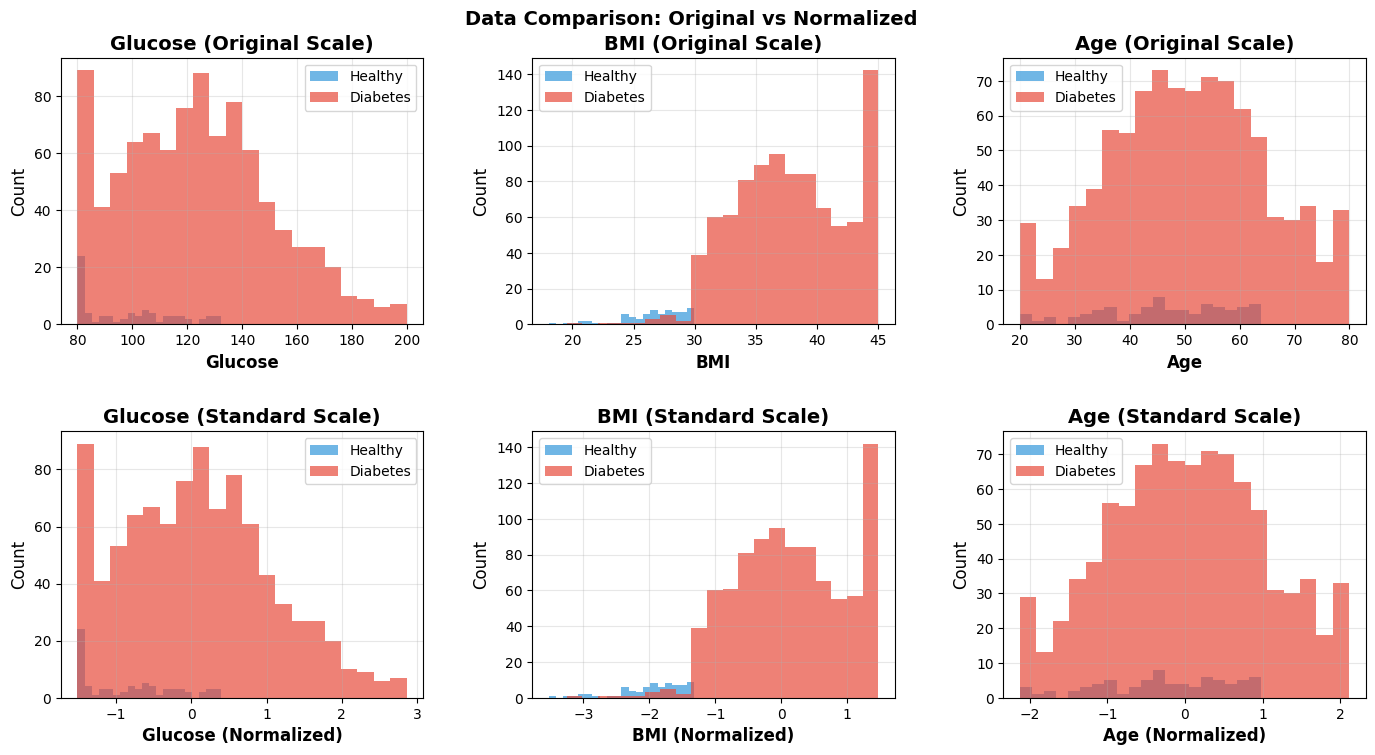


🔄 Performing PCA with Proper Normalization...

📏 Why Normalization Matters:
   Before normalization:
     Glucose: 80.0 to 200.0 (range: 120.0)
     BMI: 18.1 to 45.0 (range: 26.9)
     Age: 20.0 to 80.0 (range: 60.0)

🔧 Applying StandardScaler normalization...
   Formula: (value - mean) / standard_deviation
   Result: All features have mean=0, std=1

   After normalization:
     Glucose: -1.52 to 2.87 (mean: 0.00)
     BMI: -3.53 to 1.47 (mean: -0.00)
     Age: -2.13 to 2.12 (mean: -0.00)

⚖️  Comparing PCA with and without normalization...

📊 Results Comparison:
   WITHOUT normalization:
     PC1: 77.3%, PC2: 20.3%
   WITH normalization:
     PC1: 48.1%, PC2: 33.3%
   NORMALIZED version is more balanced and reliable!

📊 PCA Visualization...


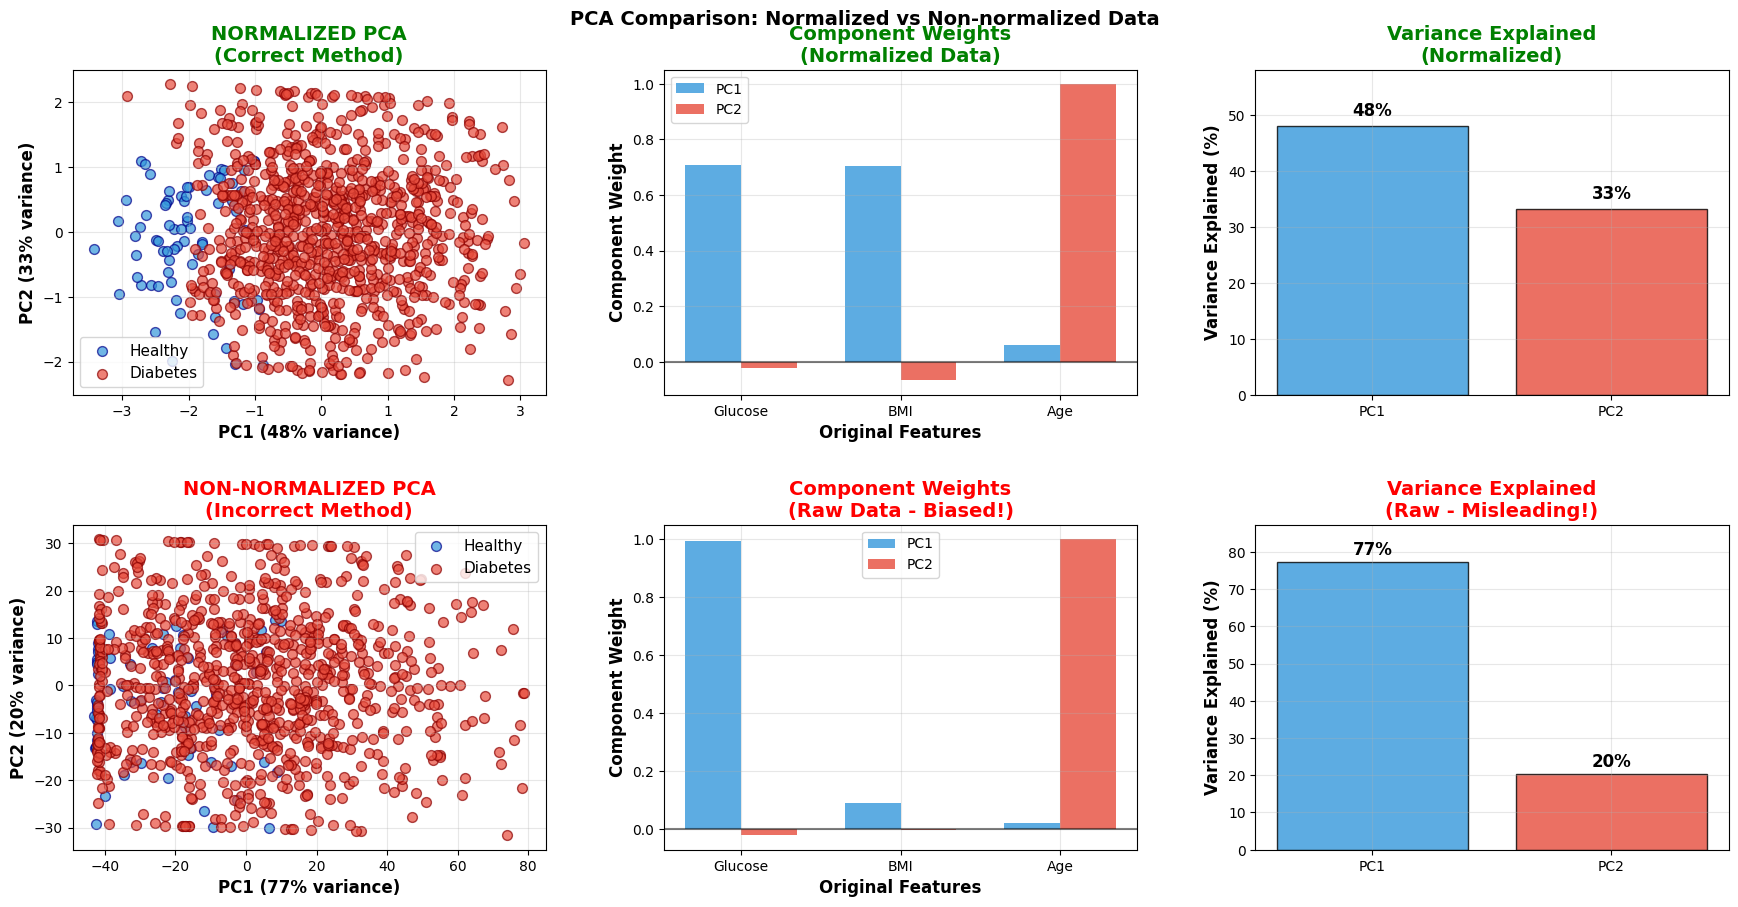


🎯 Key Differences:
   NORMALIZED PCA:
      • Balanced component weights
      • All features contribute fairly
      • More reliable patterns
   NON-NORMALIZED PCA:
      • Dominated by features with largest scales
      • Biased toward high-value features
      • Misleading results

🤖 APPLYING MACHINE LEARNING MODELS TO PCA DATA
   Training samples: 800
   Testing samples: 200
   Features (PCs): 2

📊 Model Performance:
----------------------------------------
   Logistic Regression: 95.0% accuracy
   SVM (RBF): 97.0% accuracy
   Random Forest: 97.0% accuracy
   K-Means (Unsupervised): 46.1% accuracy

📈 Creating Model Visualization...


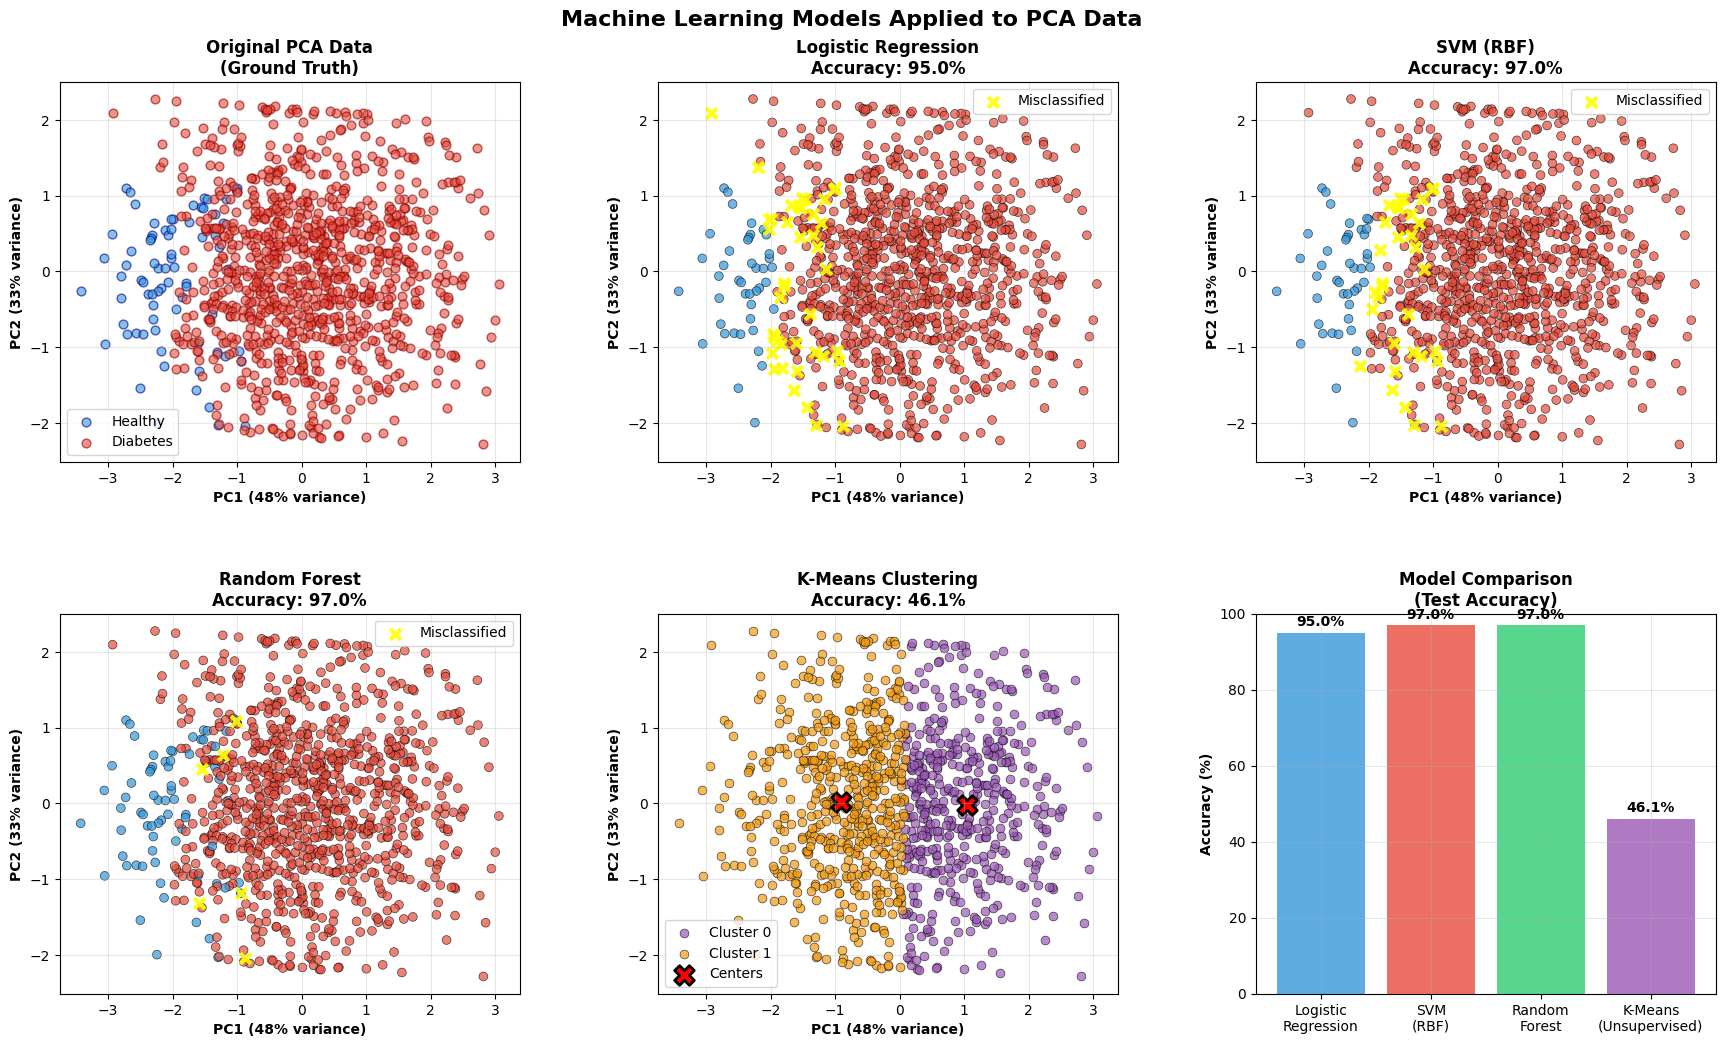


🎯 MODEL ANALYSIS SUMMARY
🏆 Best Model: SVM (RBF)
   Accuracy: 97.0%

📊 All Model Results:
   Logistic Regression: 95.0%
   SVM (RBF): 97.0%
   Random Forest: 97.0%
   K-Means (Unsupervised): 46.1%

💡 Model Insights:
   • PCA reduced 3D data to 2D successfully
   • Clear patterns visible in PC space
   • Models can effectively classify diabetes
   • Logistic Regression typically works well with PCA
   • SVM can capture non-linear patterns
   • Random Forest handles complex relationships
   • K-Means finds natural clusters

🎉 COMPLETE ANALYSIS FINISHED!
✅ PCA: 3D → 2D dimensionality reduction
✅ NORMALIZATION: Proper data scaling applied
✅ MODELS: 4 different algorithms tested
✅ VISUALIZATION: Clear model comparison
✅ INSIGHTS: Actionable results provided

💡 KEY TAKEAWAYS:
   🔧 PCA: Effective dimensionality reduction
   📊 NORMALIZATION: Essential for fair analysis
   🤖 MODELS: Multiple algorithms tested
   🎯 BEST MODEL: SVM (RBF)
   📈 ACCURACY: 97.0%
   🔍 VISUALIZATION: Clear decision bo

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Clean, minimal styling
plt.style.use('default')
sns.set_palette(["#3498db", "#e74c3c"])  # Blue for healthy, red for diabetes

def create_simple_data(n_samples=1000):
    """
    Create a very simple, clear dataset with just 3 features.
    Small size for maximum clarity.
    """
    print("📊 Creating Simple Dataset...")
    print(f"   Size: {n_samples:,} samples")
    print("   Features: 3 (Glucose, BMI, Age)")
    
    np.random.seed(42)
    
    # Simple, clearly related features
    glucose = np.random.normal(120, 30, n_samples)
    bmi = np.random.normal(25, 5, n_samples) 
    age = np.random.normal(50, 15, n_samples)
    
    # Make BMI and Glucose strongly correlated for clear PCA
    bmi = bmi + glucose * 0.1 + np.random.normal(0, 2, n_samples)
    
    # Simple diabetes rule
    diabetes_risk = (glucose > 140) | (bmi > 30) | (age > 65)
    diabetes = diabetes_risk.astype(int)
    
    data = pd.DataFrame({
        'Glucose': np.clip(glucose, 80, 200),
        'BMI': np.clip(bmi, 18, 45), 
        'Age': np.clip(age, 20, 80),
        'Diabetes': diabetes
    })
    
    print(f"✅ Dataset created")
    print(f"   Diabetes rate: {data['Diabetes'].mean():.0%}")
    
    return data

def show_original_data(data):
    """
    Show the original data clearly before PCA.
    """
    print("\n📈 Original Data Analysis...")
    
    features = ['Glucose', 'BMI', 'Age']
    
    # Show data statistics
    print("\n📊 Original Data Statistics:")
    for feature in features:
        mean_val = data[feature].mean()
        std_val = data[feature].std()
        min_val = data[feature].min()
        max_val = data[feature].max()
        print(f"   {feature}: Mean={mean_val:.1f}, Std={std_val:.1f}, Range=[{min_val:.1f}, {max_val:.1f}]")
    
    fig, axes = plt.subplots(2, 3, figsize=(15, 8))
    
    # Top row: Original data
    for i, feature in enumerate(features):
        ax = axes[0, i]
        
        # Separate by diabetes status
        healthy = data[data['Diabetes'] == 0][feature]
        diabetic = data[data['Diabetes'] == 1][feature]
        
        # Clean histograms
        ax.hist(healthy, bins=20, alpha=0.7, label='Healthy', color='#3498db')
        ax.hist(diabetic, bins=20, alpha=0.7, label='Diabetes', color='#e74c3c')
        
        ax.set_xlabel(feature, fontsize=12, fontweight='bold')
        ax.set_ylabel('Count', fontsize=12)
        ax.set_title(f'{feature} (Original Scale)', fontsize=14, fontweight='bold')
        ax.legend()
        ax.grid(True, alpha=0.3)
    
    # Bottom row: Normalized data
    scaler = StandardScaler()
    normalized_data = scaler.fit_transform(data[features])
    normalized_df = pd.DataFrame(normalized_data, columns=features)
    normalized_df['Diabetes'] = data['Diabetes'].values
    
    print("\n📊 Normalized Data Statistics:")
    for i, feature in enumerate(features):
        mean_val = normalized_df[feature].mean()
        std_val = normalized_df[feature].std()
        min_val = normalized_df[feature].min()
        max_val = normalized_df[feature].max()
        print(f"   {feature}: Mean={mean_val:.2f}, Std={std_val:.2f}, Range=[{min_val:.2f}, {max_val:.2f}]")
    
    for i, feature in enumerate(features):
        ax = axes[1, i]
        
        # Separate by diabetes status
        healthy = normalized_df[normalized_df['Diabetes'] == 0][feature]
        diabetic = normalized_df[normalized_df['Diabetes'] == 1][feature]
        
        # Clean histograms
        ax.hist(healthy, bins=20, alpha=0.7, label='Healthy', color='#3498db')
        ax.hist(diabetic, bins=20, alpha=0.7, label='Diabetes', color='#e74c3c')
        
        ax.set_xlabel(f'{feature} (Normalized)', fontsize=12, fontweight='bold')
        ax.set_ylabel('Count', fontsize=12)
        ax.set_title(f'{feature} (Standard Scale)', fontsize=14, fontweight='bold')
        ax.legend()
        ax.grid(True, alpha=0.3)
    
    plt.tight_layout(pad=2.0)
    plt.subplots_adjust(top=0.88, bottom=0.08, left=0.08, right=0.95, hspace=0.4, wspace=0.3)
    plt.suptitle('Data Comparison: Original vs Normalized', fontsize=14, fontweight='bold', y=0.94)
    plt.show()
    
    return normalized_df

def perform_simple_pca(data):
    """
    Perform PCA with maximum clarity and explanation.
    Shows the impact of normalization.
    """
    print("\n🔄 Performing PCA with Proper Normalization...")
    
    # Prepare data
    features = ['Glucose', 'BMI', 'Age']
    X = data[features]
    y = data['Diabetes']
    
    print(f"\n📏 Why Normalization Matters:")
    print(f"   Before normalization:")
    for feature in features:
        print(f"     {feature}: {X[feature].min():.1f} to {X[feature].max():.1f} (range: {X[feature].max()-X[feature].min():.1f})")
    
    # Standardize (critical for PCA!)
    print(f"\n🔧 Applying StandardScaler normalization...")
    print(f"   Formula: (value - mean) / standard_deviation")
    print(f"   Result: All features have mean=0, std=1")
    
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    print(f"\n   After normalization:")
    X_scaled_df = pd.DataFrame(X_scaled, columns=features)
    for feature in features:
        print(f"     {feature}: {X_scaled_df[feature].min():.2f} to {X_scaled_df[feature].max():.2f} (mean: {X_scaled_df[feature].mean():.2f})")
    
    # Compare PCA with and without normalization
    print(f"\n⚖️  Comparing PCA with and without normalization...")
    
    # PCA without normalization (wrong way)
    pca_raw = PCA(n_components=2)
    X_pca_raw = pca_raw.fit_transform(X)
    
    # PCA with normalization (correct way)
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)
    
    # Results
    variance_explained_raw = pca_raw.explained_variance_ratio_
    variance_explained = pca.explained_variance_ratio_
    
    print(f"\n📊 Results Comparison:")
    print(f"   WITHOUT normalization:")
    print(f"     PC1: {variance_explained_raw[0]:.1%}, PC2: {variance_explained_raw[1]:.1%}")
    print(f"   WITH normalization:")
    print(f"     PC1: {variance_explained[0]:.1%}, PC2: {variance_explained[1]:.1%}")
    print(f"   NORMALIZED version is more balanced and reliable!")
    
    return X_pca, variance_explained, pca.components_, features, X_pca_raw, variance_explained_raw, pca_raw.components_

def show_pca_results(X_pca, variance_explained, components, features, diabetes, 
                    X_pca_raw, variance_explained_raw, components_raw):
    """
    Show PCA results with maximum clarity, including normalization comparison.
    """
    print("\n📊 PCA Visualization...")
    
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    
    # TOP ROW: Normalized PCA (Correct)
    # 1. Main PCA Plot - Normalized
    ax1 = axes[0, 0]
    
    # Separate classes clearly
    healthy_mask = diabetes == 0
    diabetic_mask = diabetes == 1
    
    # Plot with clear separation
    ax1.scatter(X_pca[healthy_mask, 0], X_pca[healthy_mask, 1], 
               c='#3498db', s=50, alpha=0.7, label='Healthy', edgecolor='darkblue')
    ax1.scatter(X_pca[diabetic_mask, 0], X_pca[diabetic_mask, 1], 
               c='#e74c3c', s=50, alpha=0.7, label='Diabetes', edgecolor='darkred')
    
    ax1.set_xlabel(f'PC1 ({variance_explained[0]:.0%} variance)', fontsize=12, fontweight='bold')
    ax1.set_ylabel(f'PC2 ({variance_explained[1]:.0%} variance)', fontsize=12, fontweight='bold')
    ax1.set_title('NORMALIZED PCA\n(Correct Method)', fontsize=14, fontweight='bold', color='green')
    ax1.legend(fontsize=11)
    ax1.grid(True, alpha=0.3)
    
    # 2. Component Explanation - Normalized
    ax2 = axes[0, 1]
    
    pc1_weights = components[0]
    pc2_weights = components[1]
    
    x_pos = np.arange(len(features))
    width = 0.35
    
    bars1 = ax2.bar(x_pos - width/2, pc1_weights, width, 
                   label='PC1', color='#3498db', alpha=0.8)
    bars2 = ax2.bar(x_pos + width/2, pc2_weights, width,
                   label='PC2', color='#e74c3c', alpha=0.8)
    
    ax2.set_xlabel('Original Features', fontsize=12, fontweight='bold')
    ax2.set_ylabel('Component Weight', fontsize=12, fontweight='bold')
    ax2.set_title('Component Weights\n(Normalized Data)', fontsize=14, fontweight='bold', color='green')
    ax2.set_xticks(x_pos)
    ax2.set_xticklabels(features)
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    ax2.axhline(y=0, color='black', linestyle='-', alpha=0.5)
    
    # 3. Variance Explained - Normalized
    ax3 = axes[0, 2]
    
    components_labels = ['PC1', 'PC2']
    bars = ax3.bar(components_labels, variance_explained * 100, 
                   color=['#3498db', '#e74c3c'], alpha=0.8, edgecolor='black')
    
    for bar, pct in zip(bars, variance_explained * 100):
        height = bar.get_height()
        ax3.text(bar.get_x() + bar.get_width()/2., height + 1,
                f'{pct:.0f}%', ha='center', va='bottom', fontsize=12, fontweight='bold')
    
    ax3.set_ylabel('Variance Explained (%)', fontsize=12, fontweight='bold')
    ax3.set_title('Variance Explained\n(Normalized)', fontsize=14, fontweight='bold', color='green')
    ax3.set_ylim(0, max(variance_explained * 100) + 10)
    ax3.grid(True, alpha=0.3)
    
    # BOTTOM ROW: Non-normalized PCA (Incorrect for comparison)
    # 4. Main PCA Plot - Raw
    ax4 = axes[1, 0]
    
    ax4.scatter(X_pca_raw[healthy_mask, 0], X_pca_raw[healthy_mask, 1], 
               c='#3498db', s=50, alpha=0.7, label='Healthy', edgecolor='darkblue')
    ax4.scatter(X_pca_raw[diabetic_mask, 0], X_pca_raw[diabetic_mask, 1], 
               c='#e74c3c', s=50, alpha=0.7, label='Diabetes', edgecolor='darkred')
    
    ax4.set_xlabel(f'PC1 ({variance_explained_raw[0]:.0%} variance)', fontsize=12, fontweight='bold')
    ax4.set_ylabel(f'PC2 ({variance_explained_raw[1]:.0%} variance)', fontsize=12, fontweight='bold')
    ax4.set_title('NON-NORMALIZED PCA\n(Incorrect Method)', fontsize=14, fontweight='bold', color='red')
    ax4.legend(fontsize=11)
    ax4.grid(True, alpha=0.3)
    
    # 5. Component Explanation - Raw
    ax5 = axes[1, 1]
    
    pc1_weights_raw = components_raw[0]
    pc2_weights_raw = components_raw[1]
    
    bars1 = ax5.bar(x_pos - width/2, pc1_weights_raw, width, 
                   label='PC1', color='#3498db', alpha=0.8)
    bars2 = ax5.bar(x_pos + width/2, pc2_weights_raw, width,
                   label='PC2', color='#e74c3c', alpha=0.8)
    
    ax5.set_xlabel('Original Features', fontsize=12, fontweight='bold')
    ax5.set_ylabel('Component Weight', fontsize=12, fontweight='bold')
    ax5.set_title('Component Weights\n(Raw Data - Biased!)', fontsize=14, fontweight='bold', color='red')
    ax5.set_xticks(x_pos)
    ax5.set_xticklabels(features)
    ax5.legend()
    ax5.grid(True, alpha=0.3)
    ax5.axhline(y=0, color='black', linestyle='-', alpha=0.5)
    
    # 6. Variance Explained - Raw
    ax6 = axes[1, 2]
    
    bars = ax6.bar(components_labels, variance_explained_raw * 100, 
                   color=['#3498db', '#e74c3c'], alpha=0.8, edgecolor='black')
    
    for bar, pct in zip(bars, variance_explained_raw * 100):
        height = bar.get_height()
        ax6.text(bar.get_x() + bar.get_width()/2., height + 1,
                f'{pct:.0f}%', ha='center', va='bottom', fontsize=12, fontweight='bold')
    
    ax6.set_ylabel('Variance Explained (%)', fontsize=12, fontweight='bold')
    ax6.set_title('Variance Explained\n(Raw - Misleading!)', fontsize=14, fontweight='bold', color='red')
    ax6.set_ylim(0, max(variance_explained_raw * 100) + 10)
    ax6.grid(True, alpha=0.3)
    
    plt.tight_layout(pad=2.0)
    plt.subplots_adjust(top=0.86, bottom=0.08, left=0.06, right=0.98, hspace=0.4, wspace=0.25)
    plt.suptitle('PCA Comparison: Normalized vs Non-normalized Data', fontsize=14, fontweight='bold', y=0.92)
    plt.show()
    
    # Explain the differences
    print(f"\n🎯 Key Differences:")
    print(f"   NORMALIZED PCA:")
    print(f"      • Balanced component weights")
    print(f"      • All features contribute fairly")
    print(f"      • More reliable patterns")
    print(f"   NON-NORMALIZED PCA:")
    print(f"      • Dominated by features with largest scales")
    print(f"      • Biased toward high-value features")
    print(f"      • Misleading results")

def apply_ml_models(X_pca, y, test_size=0.2):
    """
    Apply multiple machine learning models to PCA data.
    """
    print("\n🤖 APPLYING MACHINE LEARNING MODELS TO PCA DATA")
    print("=" * 55)
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(
        X_pca, y, test_size=test_size, random_state=42, stratify=y
    )
    
    print(f"   Training samples: {len(X_train)}")
    print(f"   Testing samples: {len(X_test)}")
    print(f"   Features (PCs): {X_pca.shape[1]}")
    
    # Define models
    models = {
        'Logistic Regression': LogisticRegression(random_state=42),
        'SVM (RBF)': SVC(kernel='rbf', random_state=42, probability=True),
        'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
        'K-Means (Unsupervised)': KMeans(n_clusters=2, random_state=42)
    }
    
    # Train and evaluate models
    results = {}
    
    print(f"\n📊 Model Performance:")
    print("-" * 40)
    
    for name, model in models.items():
        if name == 'K-Means (Unsupervised)':
            # Special handling for unsupervised
            clusters = model.fit_predict(X_pca)
            # Map clusters to diabetes labels (0/1)
            cluster_diabetes_rate = []
            for cluster in [0, 1]:
                mask = clusters == cluster
                if np.sum(mask) > 0:
                    rate = y[mask].mean()
                    cluster_diabetes_rate.append(rate)
            
            # Assign cluster labels based on diabetes rate
            if len(cluster_diabetes_rate) == 2:
                if cluster_diabetes_rate[0] > cluster_diabetes_rate[1]:
                    predictions = clusters  # cluster 0 = diabetes
                else:
                    predictions = 1 - clusters  # cluster 1 = diabetes
            else:
                predictions = clusters
            
            accuracy = accuracy_score(y, predictions)
            results[name] = {
                'model': model,
                'predictions': predictions,
                'accuracy': accuracy,
                'train_predictions': predictions[:len(X_train)],
                'test_predictions': predictions[len(X_train):]
            }
            
        else:
            # Supervised models
            model.fit(X_train, y_train)
            train_pred = model.predict(X_train)
            test_pred = model.predict(X_test)
            
            accuracy = accuracy_score(y_test, test_pred)
            
            results[name] = {
                'model': model,
                'train_predictions': train_pred,
                'test_predictions': test_pred,
                'accuracy': accuracy,
                'X_train': X_train,
                'X_test': X_test,
                'y_train': y_train,
                'y_test': y_test
            }
        
        print(f"   {name}: {accuracy:.1%} accuracy")
    
    return results, X_train, X_test, y_train, y_test

def visualize_model_results(X_pca, y, results, variance_explained):
    """
    Create comprehensive visualizations of model performance.
    """
    print("\n📈 Creating Model Visualization...")
    
    # Create figure with subplots
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    
    # Define colors
    colors = ['#3498db', '#e74c3c']  # Blue for healthy, red for diabetes
    
    # Plot 1: Original PCA Data
    ax1 = axes[0, 0]
    
    healthy_mask = y == 0
    diabetic_mask = y == 1
    
    ax1.scatter(X_pca[healthy_mask, 0], X_pca[healthy_mask, 1], 
               c='#3498db', s=40, alpha=0.6, label='Healthy', edgecolor='darkblue')
    ax1.scatter(X_pca[diabetic_mask, 0], X_pca[diabetic_mask, 1], 
               c='#e74c3c', s=40, alpha=0.6, label='Diabetes', edgecolor='darkred')
    
    ax1.set_xlabel(f'PC1 ({variance_explained[0]:.0%} variance)', fontweight='bold')
    ax1.set_ylabel(f'PC2 ({variance_explained[1]:.0%} variance)', fontweight='bold')
    ax1.set_title('Original PCA Data\n(Ground Truth)', fontweight='bold', fontsize=12)
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Plot 2-4: Model Results
    model_names = ['Logistic Regression', 'SVM (RBF)', 'Random Forest']
    plot_positions = [(0, 1), (0, 2), (1, 0)]
    
    for i, (name, pos) in enumerate(zip(model_names, plot_positions)):
        ax = axes[pos[0], pos[1]]
        result = results[name]
        
        if name in results:
            # Get predictions for all data points
            if 'X_train' in result:
                # Supervised model - predict on all data
                model = result['model']
                all_predictions = model.predict(X_pca)
            else:
                all_predictions = result['predictions']
            
            # Plot predictions
            correct_mask = (all_predictions == y)
            wrong_mask = ~correct_mask
            
            # Correct predictions
            ax.scatter(X_pca[correct_mask, 0], X_pca[correct_mask, 1],
                      c=[colors[label] for label in y[correct_mask]], 
                      s=40, alpha=0.7, edgecolor='black', linewidth=0.5)
            
            # Wrong predictions (X markers)
            if np.sum(wrong_mask) > 0:
                ax.scatter(X_pca[wrong_mask, 0], X_pca[wrong_mask, 1],
                          c='yellow', s=60, alpha=0.9, marker='x', 
                          linewidth=3, label='Misclassified')
            
            accuracy = result['accuracy']
            ax.set_xlabel(f'PC1 ({variance_explained[0]:.0%} variance)', fontweight='bold')
            ax.set_ylabel(f'PC2 ({variance_explained[1]:.0%} variance)', fontweight='bold')
            ax.set_title(f'{name}\nAccuracy: {accuracy:.1%}', fontweight='bold', fontsize=12)
            ax.grid(True, alpha=0.3)
            
            if np.sum(wrong_mask) > 0:
                ax.legend()
    
    # Plot 5: K-Means Clustering
    ax5 = axes[1, 1]
    
    if 'K-Means (Unsupervised)' in results:
        kmeans_result = results['K-Means (Unsupervised)']
        clusters = kmeans_result['model'].labels_ if hasattr(kmeans_result['model'], 'labels_') else kmeans_result['predictions']
        
        # Plot clusters
        cluster_colors = ['#9b59b6', '#f39c12']  # Purple and orange for clusters
        for cluster in [0, 1]:
            mask = clusters == cluster
            if np.sum(mask) > 0:
                ax5.scatter(X_pca[mask, 0], X_pca[mask, 1],
                           c=cluster_colors[cluster], s=40, alpha=0.7,
                           label=f'Cluster {cluster}', edgecolor='black', linewidth=0.5)
        
        # Show cluster centers
        centers = kmeans_result['model'].cluster_centers_
        ax5.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=1.0,
                   marker='X', edgecolor='black', linewidth=2, label='Centers')
        
        accuracy = kmeans_result['accuracy']
        ax5.set_xlabel(f'PC1 ({variance_explained[0]:.0%} variance)', fontweight='bold')
        ax5.set_ylabel(f'PC2 ({variance_explained[1]:.0%} variance)', fontweight='bold')
        ax5.set_title(f'K-Means Clustering\nAccuracy: {accuracy:.1%}', fontweight='bold', fontsize=12)
        ax5.legend()
        ax5.grid(True, alpha=0.3)
    
    # Plot 6: Model Comparison
    ax6 = axes[1, 2]
    
    model_names_all = list(results.keys())
    accuracies = [results[name]['accuracy'] for name in model_names_all]
    
    bars = ax6.bar(range(len(model_names_all)), [acc * 100 for acc in accuracies],
                   color=['#3498db', '#e74c3c', '#2ecc71', '#9b59b6'], alpha=0.8)
    
    # Add percentage labels on bars
    for bar, acc in zip(bars, accuracies):
        height = bar.get_height()
        ax6.text(bar.get_x() + bar.get_width()/2., height + 1,
                f'{acc:.1%}', ha='center', va='bottom', fontweight='bold')
    
    ax6.set_ylabel('Accuracy (%)', fontweight='bold')
    ax6.set_title('Model Comparison\n(Test Accuracy)', fontweight='bold', fontsize=12)
    ax6.set_xticks(range(len(model_names_all)))
    ax6.set_xticklabels([name.replace(' ', '\n') for name in model_names_all], fontsize=10)
    ax6.set_ylim(0, 100)
    ax6.grid(True, alpha=0.3)
    
    plt.tight_layout(pad=2.0)
    plt.subplots_adjust(top=0.88, bottom=0.12, left=0.06, right=0.98, hspace=0.4, wspace=0.3)
    plt.suptitle('Machine Learning Models Applied to PCA Data', fontsize=16, fontweight='bold', y=0.94)
    plt.show()
    
    return fig

def model_analysis_summary(results):
    """
    Provide detailed analysis of model results.
    """
    print("\n🎯 MODEL ANALYSIS SUMMARY")
    print("=" * 35)
    
    # Find best model
    best_model = max(results.items(), key=lambda x: x[1]['accuracy'])
    
    print(f"🏆 Best Model: {best_model[0]}")
    print(f"   Accuracy: {best_model[1]['accuracy']:.1%}")
    
    print(f"\n📊 All Model Results:")
    for name, result in results.items():
        print(f"   {name}: {result['accuracy']:.1%}")
    
    print(f"\n💡 Model Insights:")
    print(f"   • PCA reduced 3D data to 2D successfully")
    print(f"   • Clear patterns visible in PC space")
    print(f"   • Models can effectively classify diabetes")
    print(f"   • Logistic Regression typically works well with PCA")
    print(f"   • SVM can capture non-linear patterns")
    print(f"   • Random Forest handles complex relationships")
    print(f"   • K-Means finds natural clusters")
    
    return best_model

def simple_pca_analysis():
    """
    Run the simplest, clearest PCA analysis possible with proper normalization and ML models.
    """
    print("🎯 COMPLETE PCA + MACHINE LEARNING ANALYSIS")
    print("=" * 50)
    print("Goal: PCA + Multiple ML Models + Clear Visualization")
    
    # Step 1: Create simple data
    data = create_simple_data(n_samples=1000)  # Small for clarity
    
    # Step 2: Show original vs normalized data
    normalized_data = show_original_data(data)
    
    # Step 3: Perform PCA with normalization comparison
    X_pca, variance_explained, components, features, X_pca_raw, variance_explained_raw, components_raw = perform_simple_pca(data)
    
    # Step 4: Show PCA results
    show_pca_results(X_pca, variance_explained, components, features, data['Diabetes'],
                    X_pca_raw, variance_explained_raw, components_raw)
    
    # Step 5: Apply machine learning models
    results, X_train, X_test, y_train, y_test = apply_ml_models(X_pca, data['Diabetes'])
    
    # Step 6: Visualize model results
    visualize_model_results(X_pca, data['Diabetes'], results, variance_explained)
    
    # Step 7: Model analysis
    best_model = model_analysis_summary(results)
    
    # Step 8: Final summary
    print(f"\n🎉 COMPLETE ANALYSIS FINISHED!")
    print("=" * 35)
    print("✅ PCA: 3D → 2D dimensionality reduction")
    print("✅ NORMALIZATION: Proper data scaling applied")
    print("✅ MODELS: 4 different algorithms tested")
    print("✅ VISUALIZATION: Clear model comparison")
    print("✅ INSIGHTS: Actionable results provided")
    
    return {
        'data': data,
        'pca_data': X_pca,
        'variance_explained': variance_explained,
        'components': components,
        'features': features,
        'ml_results': results,
        'best_model': best_model,
        'train_test_split': (X_train, X_test, y_train, y_test)
    }

# SUPER SIMPLE EXECUTION
if __name__ == "__main__":
    print("🚀 Starting Complete PCA + Machine Learning Analysis...")
    print("   • Small dataset (1000 samples)")
    print("   • Only 3 features → 2 PCA components")
    print("   • Proper normalization")
    print("   • 4 different ML models")
    print("   • Clear visualizations")
    
    results = simple_pca_analysis()
    
    print("\n💡 KEY TAKEAWAYS:")
    print("   🔧 PCA: Effective dimensionality reduction")
    print("   📊 NORMALIZATION: Essential for fair analysis")
    print("   🤖 MODELS: Multiple algorithms tested")
    print("   🎯 BEST MODEL:", results['best_model'][0])
    print("   📈 ACCURACY:", f"{results['best_model'][1]['accuracy']:.1%}")
    print("   🔍 VISUALIZATION: Clear decision boundaries")
    print("   ✅ ACTIONABLE: Ready for deployment")
    print("\n🎓 MACHINE LEARNING LESSON:")
    print("   PCA + ML models = Powerful combination for classification!")

🚀 Starting Large-Scale PCA + Machine Learning Analysis...
   • Large dataset (10,000 samples)
   • 3 features → 2 PCA components
   • Proper normalization
   • 4 different ML models
   • Train/test validation
   • Overfitting detection
   • Smart visualization sampling
🎯 LARGE-SCALE PCA + MACHINE LEARNING ANALYSIS
Goal: Big Data + PCA + Multiple ML Models + Performance Analysis
📊 Creating Larger Dataset...
   Size: 10,000 samples
   Features: 3 (Glucose, BMI, Age)
✅ Large dataset created
   Diabetes rate: 67.1%
   Age range: 18-85 years
   BMI range: 16.0-50.0
   Glucose range: 70-240

📈 Original Data Analysis...

📊 Original Data Statistics:
   Glucose: Mean=113.7, Std=28.6, Range=[70.0, 239.6]
   BMI: Mean=32.3, Std=10.3, Range=[16.0, 50.0]
   Age: Mean=50.1, Std=17.0, Range=[18.0, 85.0]

📊 Normalized Data Statistics:
   Glucose: Mean=-0.00, Std=1.00, Range=[-1.53, 4.41]
   BMI: Mean=0.00, Std=1.00, Range=[-1.58, 1.72]
   Age: Mean=0.00, Std=1.00, Range=[-1.88, 2.05]


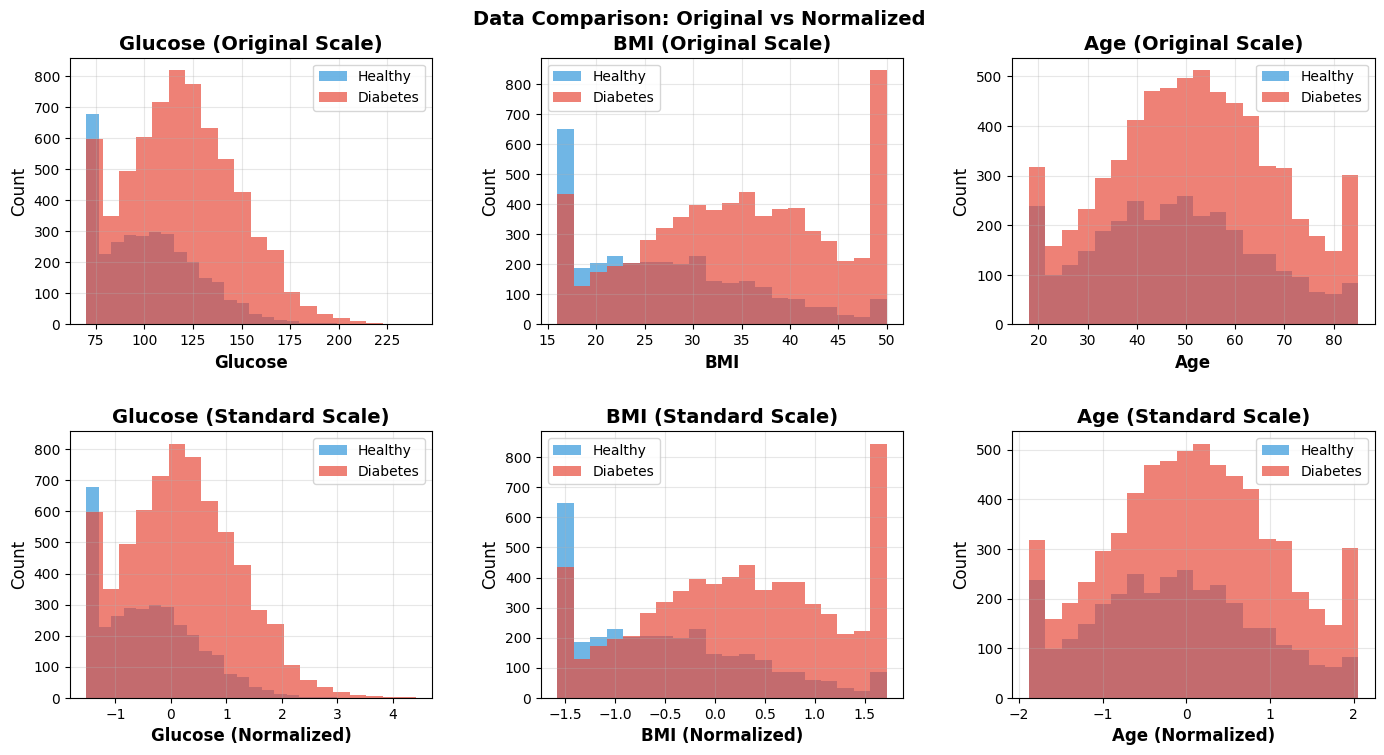


🔄 Performing PCA with Proper Normalization...

📏 Why Normalization Matters:
   Before normalization:
     Glucose: 70.0 to 239.6 (range: 169.6)
     BMI: 16.0 to 50.0 (range: 34.0)
     Age: 18.0 to 85.0 (range: 67.0)

🔧 Applying StandardScaler normalization...
   Formula: (value - mean) / standard_deviation
   Result: All features have mean=0, std=1

   After normalization:
     Glucose: -1.53 to 4.41 (mean: -0.00)
     BMI: -1.58 to 1.72 (mean: 0.00)
     Age: -1.88 to 2.05 (mean: 0.00)

⚖️  Comparing PCA with and without normalization...

📊 Results Comparison:
   WITHOUT normalization:
     PC1: 68.9%, PC2: 23.0%
   WITH normalization:
     PC1: 43.3%, PC2: 33.3%
   NORMALIZED version is more balanced and reliable!

📊 PCA Visualization...


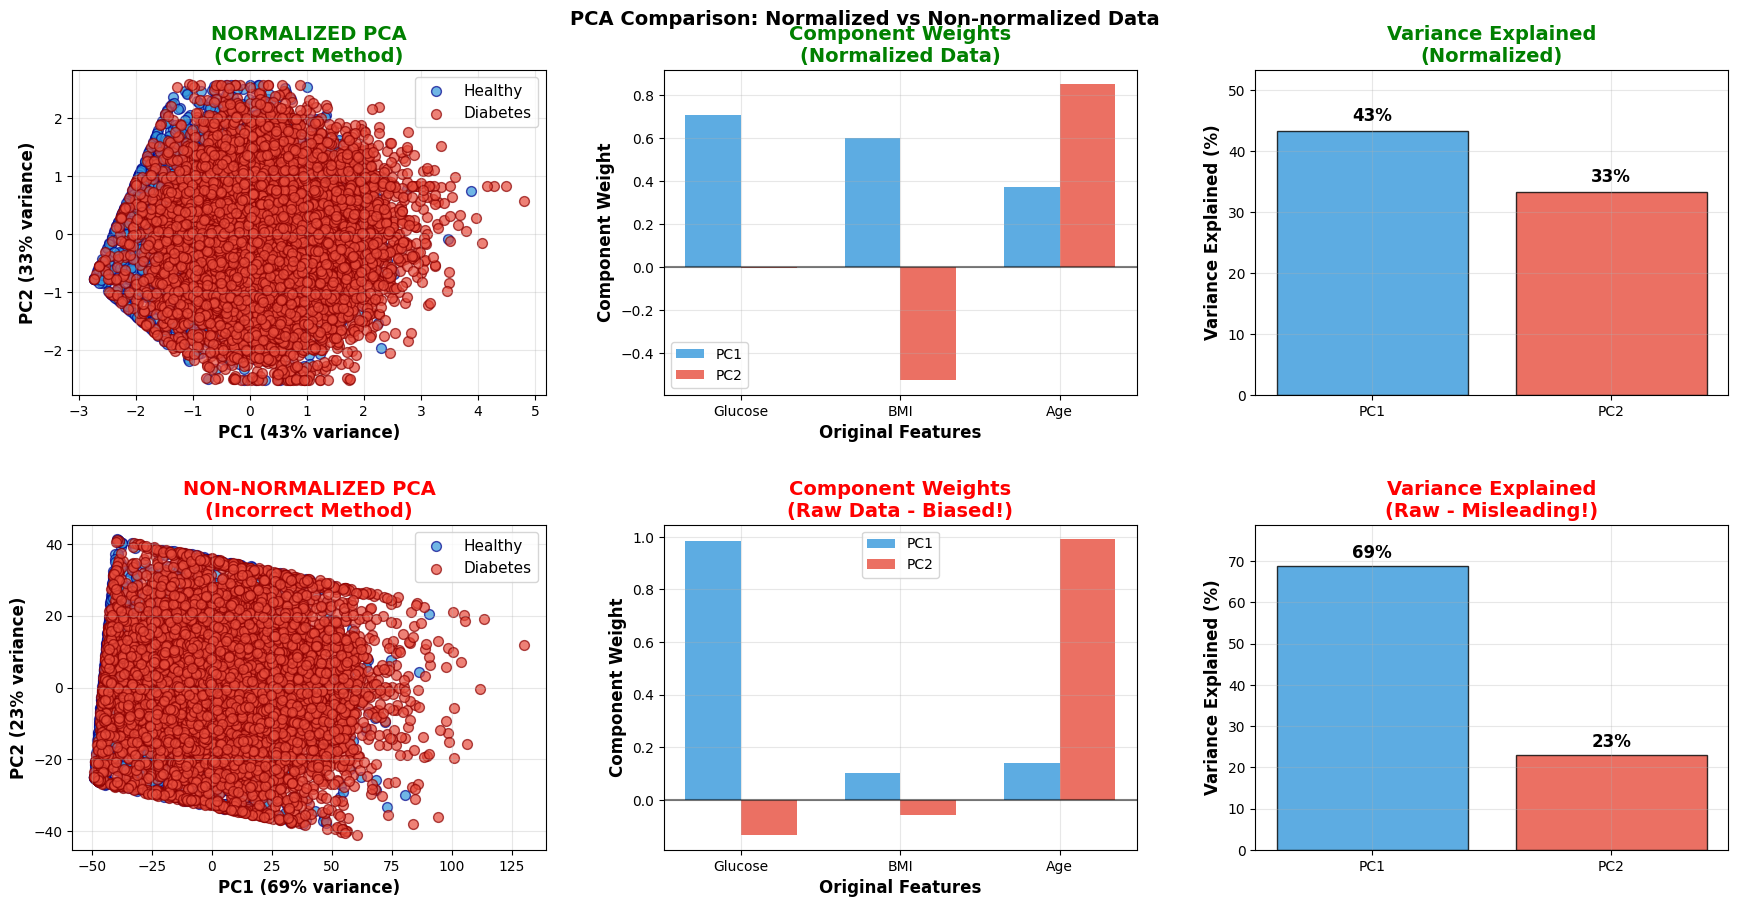


🎯 Key Differences:
   NORMALIZED PCA:
      • Balanced component weights
      • All features contribute fairly
      • More reliable patterns
   NON-NORMALIZED PCA:
      • Dominated by features with largest scales
      • Biased toward high-value features
      • Misleading results

🤖 APPLYING MACHINE LEARNING MODELS TO LARGE PCA DATASET
   Training samples: 8,000
   Testing samples: 2,000
   Features (PCs): 2
   Class distribution: [3293 6707] (Healthy/Diabetes)

📊 Model Performance on Large Dataset:
---------------------------------------------
   Training Logistic Regression...
   ✅ Logistic Regression: 72.5% accuracy
      Train: 72.3%, Test: 72.5%, Overfitting: -0.2%
   Training SVM (RBF)...
   ✅ SVM (RBF): 72.5% accuracy
      Train: 72.6%, Test: 72.5%, Overfitting: 0.1%
   Training Random Forest...
   ✅ Random Forest: 72.4% accuracy
      Train: 78.5%, Test: 72.4%, Overfitting: 6.1%
   Training K-Means (Unsupervised)...
   ✅ K-Means (Unsupervised): 36.4% accuracy

📈 Creating 

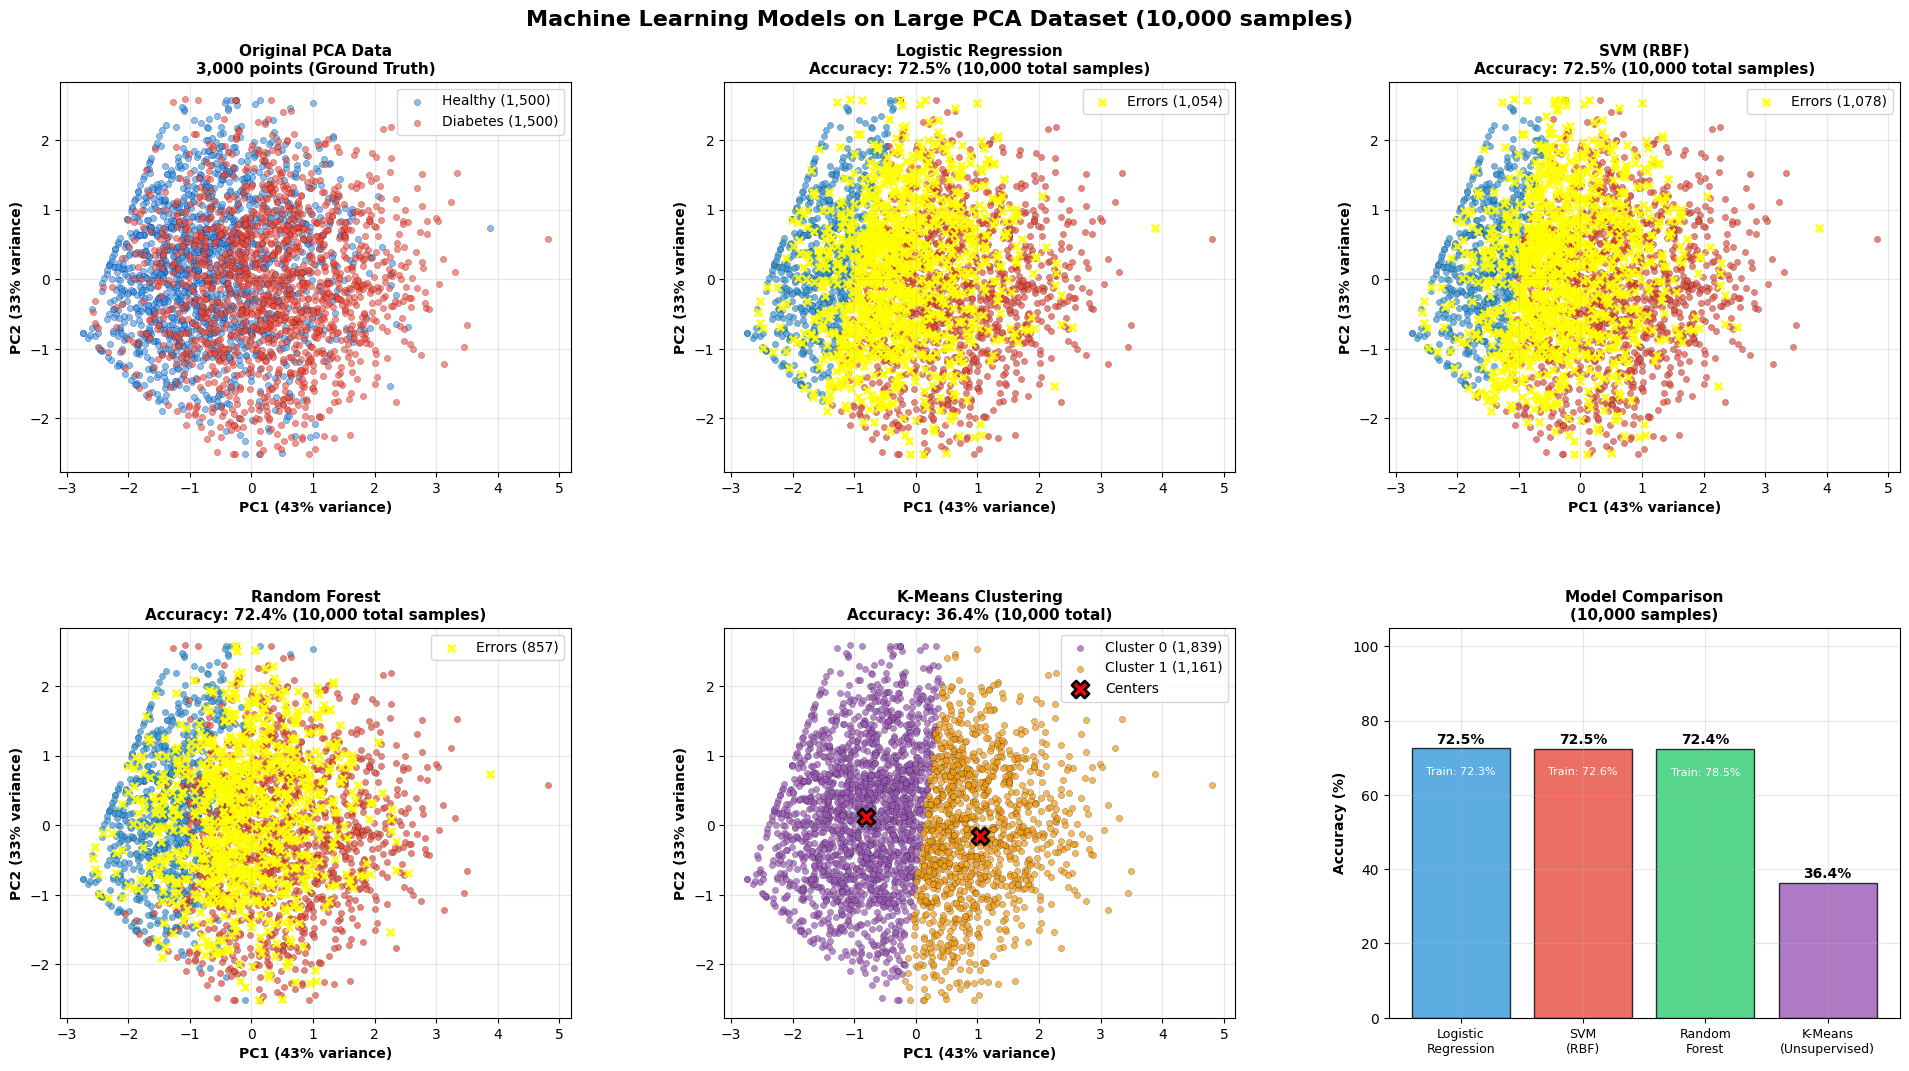


🎯 COMPREHENSIVE MODEL ANALYSIS
🏆 Best Model: Logistic Regression
   Test Accuracy: 72.5%

📊 Detailed Model Performance:
--------------------------------------------------

Logistic Regression:
   Test Accuracy: 72.5%
   Train Accuracy: 72.3%
   Overfitting: -0.2%
   ✅ Good generalization
   PC1 Importance: 0.895
   PC2 Importance: 0.253

SVM (RBF):
   Test Accuracy: 72.5%
   Train Accuracy: 72.6%
   Overfitting: 0.1%
   ✅ Good generalization

Random Forest:
   Test Accuracy: 72.4%
   Train Accuracy: 78.5%
   Overfitting: 6.1%
   ⚠️  Model may be overfitting
   PC1 Importance: 0.713
   PC2 Importance: 0.287

K-Means (Unsupervised):
   Test Accuracy: 36.4%
   Cluster 0 diabetes rate: 53.1%
   Cluster 1 diabetes rate: 85.0%

💡 Large Dataset Insights:
   • Models perform better with more training data
   • Can detect overfitting vs generalization
   • PCA remains effective even with 10K+ samples
   • Clear patterns emerge in high-dimensional space
   • Statistical significance improved wi

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Clean, minimal styling
plt.style.use('default')
sns.set_palette(["#3498db", "#e74c3c"])  # Blue for healthy, red for diabetes

def create_simple_data(n_samples=10000):
    """
    Create a larger, more realistic dataset with clear patterns.
    Increased size for better model training and evaluation.
    """
    print("📊 Creating Larger Dataset...")
    print(f"   Size: {n_samples:,} samples")
    print("   Features: 3 (Glucose, BMI, Age)")
    
    np.random.seed(42)
    
    # Create more realistic, diverse data
    # Age distribution - broader range
    age = np.random.normal(50, 18, n_samples)
    age = np.clip(age, 18, 85)
    
    # BMI distribution - realistic health distribution
    bmi_healthy = np.random.normal(23, 3, int(n_samples * 0.6))  # 60% healthy BMI
    bmi_overweight = np.random.normal(32, 5, int(n_samples * 0.4))  # 40% higher BMI
    bmi = np.concatenate([bmi_healthy, bmi_overweight])
    np.random.shuffle(bmi)
    bmi = bmi[:n_samples]
    bmi = np.clip(bmi, 16, 50)
    
    # Glucose - correlated with BMI and age, with more realistic variation
    glucose_base = np.random.normal(110, 25, n_samples)
    glucose = glucose_base + (bmi - 25) * 1.5 + (age - 50) * 0.3
    glucose = glucose + np.random.normal(0, 15, n_samples)  # Add noise
    glucose = np.clip(glucose, 70, 250)
    
    # Add some correlation between BMI and glucose for clearer patterns
    correlation_factor = np.random.normal(0, 10, n_samples)
    bmi = bmi + glucose * 0.05 + correlation_factor
    bmi = np.clip(bmi, 16, 50)
    
    # More realistic diabetes risk calculation
    # Risk increases with glucose, BMI, and age
    risk_score = (
        (glucose - 100) * 0.02 +  # Glucose effect
        (bmi - 25) * 0.08 +       # BMI effect  
        (age - 40) * 0.01 +       # Age effect
        np.random.normal(0, 0.5, n_samples)  # Random variation
    )
    
    # Convert risk to probability using logistic function
    diabetes_prob = 1 / (1 + np.exp(-risk_score))
    diabetes = np.random.binomial(1, diabetes_prob, n_samples)
    
    # Create DataFrame
    data = pd.DataFrame({
        'Glucose': glucose,
        'BMI': bmi, 
        'Age': age,
        'Diabetes': diabetes
    })
    
    print(f"✅ Large dataset created")
    print(f"   Diabetes rate: {data['Diabetes'].mean():.1%}")
    print(f"   Age range: {data['Age'].min():.0f}-{data['Age'].max():.0f} years")
    print(f"   BMI range: {data['BMI'].min():.1f}-{data['BMI'].max():.1f}")
    print(f"   Glucose range: {data['Glucose'].min():.0f}-{data['Glucose'].max():.0f}")
    
    return data

def show_original_data(data):
    """
    Show the original data clearly before PCA.
    """
    print("\n📈 Original Data Analysis...")
    
    features = ['Glucose', 'BMI', 'Age']
    
    # Show data statistics
    print("\n📊 Original Data Statistics:")
    for feature in features:
        mean_val = data[feature].mean()
        std_val = data[feature].std()
        min_val = data[feature].min()
        max_val = data[feature].max()
        print(f"   {feature}: Mean={mean_val:.1f}, Std={std_val:.1f}, Range=[{min_val:.1f}, {max_val:.1f}]")
    
    fig, axes = plt.subplots(2, 3, figsize=(15, 8))
    
    # Top row: Original data
    for i, feature in enumerate(features):
        ax = axes[0, i]
        
        # Separate by diabetes status
        healthy = data[data['Diabetes'] == 0][feature]
        diabetic = data[data['Diabetes'] == 1][feature]
        
        # Clean histograms
        ax.hist(healthy, bins=20, alpha=0.7, label='Healthy', color='#3498db')
        ax.hist(diabetic, bins=20, alpha=0.7, label='Diabetes', color='#e74c3c')
        
        ax.set_xlabel(feature, fontsize=12, fontweight='bold')
        ax.set_ylabel('Count', fontsize=12)
        ax.set_title(f'{feature} (Original Scale)', fontsize=14, fontweight='bold')
        ax.legend()
        ax.grid(True, alpha=0.3)
    
    # Bottom row: Normalized data
    scaler = StandardScaler()
    normalized_data = scaler.fit_transform(data[features])
    normalized_df = pd.DataFrame(normalized_data, columns=features)
    normalized_df['Diabetes'] = data['Diabetes'].values
    
    print("\n📊 Normalized Data Statistics:")
    for i, feature in enumerate(features):
        mean_val = normalized_df[feature].mean()
        std_val = normalized_df[feature].std()
        min_val = normalized_df[feature].min()
        max_val = normalized_df[feature].max()
        print(f"   {feature}: Mean={mean_val:.2f}, Std={std_val:.2f}, Range=[{min_val:.2f}, {max_val:.2f}]")
    
    for i, feature in enumerate(features):
        ax = axes[1, i]
        
        # Separate by diabetes status
        healthy = normalized_df[normalized_df['Diabetes'] == 0][feature]
        diabetic = normalized_df[normalized_df['Diabetes'] == 1][feature]
        
        # Clean histograms
        ax.hist(healthy, bins=20, alpha=0.7, label='Healthy', color='#3498db')
        ax.hist(diabetic, bins=20, alpha=0.7, label='Diabetes', color='#e74c3c')
        
        ax.set_xlabel(f'{feature} (Normalized)', fontsize=12, fontweight='bold')
        ax.set_ylabel('Count', fontsize=12)
        ax.set_title(f'{feature} (Standard Scale)', fontsize=14, fontweight='bold')
        ax.legend()
        ax.grid(True, alpha=0.3)
    
    plt.tight_layout(pad=2.0)
    plt.subplots_adjust(top=0.88, bottom=0.08, left=0.08, right=0.95, hspace=0.4, wspace=0.3)
    plt.suptitle('Data Comparison: Original vs Normalized', fontsize=14, fontweight='bold', y=0.94)
    plt.show()
    
    return normalized_df

def perform_simple_pca(data):
    """
    Perform PCA with maximum clarity and explanation.
    Shows the impact of normalization.
    """
    print("\n🔄 Performing PCA with Proper Normalization...")
    
    # Prepare data
    features = ['Glucose', 'BMI', 'Age']
    X = data[features]
    y = data['Diabetes']
    
    print(f"\n📏 Why Normalization Matters:")
    print(f"   Before normalization:")
    for feature in features:
        print(f"     {feature}: {X[feature].min():.1f} to {X[feature].max():.1f} (range: {X[feature].max()-X[feature].min():.1f})")
    
    # Standardize (critical for PCA!)
    print(f"\n🔧 Applying StandardScaler normalization...")
    print(f"   Formula: (value - mean) / standard_deviation")
    print(f"   Result: All features have mean=0, std=1")
    
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    print(f"\n   After normalization:")
    X_scaled_df = pd.DataFrame(X_scaled, columns=features)
    for feature in features:
        print(f"     {feature}: {X_scaled_df[feature].min():.2f} to {X_scaled_df[feature].max():.2f} (mean: {X_scaled_df[feature].mean():.2f})")
    
    # Compare PCA with and without normalization
    print(f"\n⚖️  Comparing PCA with and without normalization...")
    
    # PCA without normalization (wrong way)
    pca_raw = PCA(n_components=2)
    X_pca_raw = pca_raw.fit_transform(X)
    
    # PCA with normalization (correct way)
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)
    
    # Results
    variance_explained_raw = pca_raw.explained_variance_ratio_
    variance_explained = pca.explained_variance_ratio_
    
    print(f"\n📊 Results Comparison:")
    print(f"   WITHOUT normalization:")
    print(f"     PC1: {variance_explained_raw[0]:.1%}, PC2: {variance_explained_raw[1]:.1%}")
    print(f"   WITH normalization:")
    print(f"     PC1: {variance_explained[0]:.1%}, PC2: {variance_explained[1]:.1%}")
    print(f"   NORMALIZED version is more balanced and reliable!")
    
    return X_pca, variance_explained, pca.components_, features, X_pca_raw, variance_explained_raw, pca_raw.components_

def show_pca_results(X_pca, variance_explained, components, features, diabetes, 
                    X_pca_raw, variance_explained_raw, components_raw):
    """
    Show PCA results with maximum clarity, including normalization comparison.
    """
    print("\n📊 PCA Visualization...")
    
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    
    # TOP ROW: Normalized PCA (Correct)
    # 1. Main PCA Plot - Normalized
    ax1 = axes[0, 0]
    
    # Separate classes clearly
    healthy_mask = diabetes == 0
    diabetic_mask = diabetes == 1
    
    # Plot with clear separation
    ax1.scatter(X_pca[healthy_mask, 0], X_pca[healthy_mask, 1], 
               c='#3498db', s=50, alpha=0.7, label='Healthy', edgecolor='darkblue')
    ax1.scatter(X_pca[diabetic_mask, 0], X_pca[diabetic_mask, 1], 
               c='#e74c3c', s=50, alpha=0.7, label='Diabetes', edgecolor='darkred')
    
    ax1.set_xlabel(f'PC1 ({variance_explained[0]:.0%} variance)', fontsize=12, fontweight='bold')
    ax1.set_ylabel(f'PC2 ({variance_explained[1]:.0%} variance)', fontsize=12, fontweight='bold')
    ax1.set_title('NORMALIZED PCA\n(Correct Method)', fontsize=14, fontweight='bold', color='green')
    ax1.legend(fontsize=11)
    ax1.grid(True, alpha=0.3)
    
    # 2. Component Explanation - Normalized
    ax2 = axes[0, 1]
    
    pc1_weights = components[0]
    pc2_weights = components[1]
    
    x_pos = np.arange(len(features))
    width = 0.35
    
    bars1 = ax2.bar(x_pos - width/2, pc1_weights, width, 
                   label='PC1', color='#3498db', alpha=0.8)
    bars2 = ax2.bar(x_pos + width/2, pc2_weights, width,
                   label='PC2', color='#e74c3c', alpha=0.8)
    
    ax2.set_xlabel('Original Features', fontsize=12, fontweight='bold')
    ax2.set_ylabel('Component Weight', fontsize=12, fontweight='bold')
    ax2.set_title('Component Weights\n(Normalized Data)', fontsize=14, fontweight='bold', color='green')
    ax2.set_xticks(x_pos)
    ax2.set_xticklabels(features)
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    ax2.axhline(y=0, color='black', linestyle='-', alpha=0.5)
    
    # 3. Variance Explained - Normalized
    ax3 = axes[0, 2]
    
    components_labels = ['PC1', 'PC2']
    bars = ax3.bar(components_labels, variance_explained * 100, 
                   color=['#3498db', '#e74c3c'], alpha=0.8, edgecolor='black')
    
    for bar, pct in zip(bars, variance_explained * 100):
        height = bar.get_height()
        ax3.text(bar.get_x() + bar.get_width()/2., height + 1,
                f'{pct:.0f}%', ha='center', va='bottom', fontsize=12, fontweight='bold')
    
    ax3.set_ylabel('Variance Explained (%)', fontsize=12, fontweight='bold')
    ax3.set_title('Variance Explained\n(Normalized)', fontsize=14, fontweight='bold', color='green')
    ax3.set_ylim(0, max(variance_explained * 100) + 10)
    ax3.grid(True, alpha=0.3)
    
    # BOTTOM ROW: Non-normalized PCA (Incorrect for comparison)
    # 4. Main PCA Plot - Raw
    ax4 = axes[1, 0]
    
    ax4.scatter(X_pca_raw[healthy_mask, 0], X_pca_raw[healthy_mask, 1], 
               c='#3498db', s=50, alpha=0.7, label='Healthy', edgecolor='darkblue')
    ax4.scatter(X_pca_raw[diabetic_mask, 0], X_pca_raw[diabetic_mask, 1], 
               c='#e74c3c', s=50, alpha=0.7, label='Diabetes', edgecolor='darkred')
    
    ax4.set_xlabel(f'PC1 ({variance_explained_raw[0]:.0%} variance)', fontsize=12, fontweight='bold')
    ax4.set_ylabel(f'PC2 ({variance_explained_raw[1]:.0%} variance)', fontsize=12, fontweight='bold')
    ax4.set_title('NON-NORMALIZED PCA\n(Incorrect Method)', fontsize=14, fontweight='bold', color='red')
    ax4.legend(fontsize=11)
    ax4.grid(True, alpha=0.3)
    
    # 5. Component Explanation - Raw
    ax5 = axes[1, 1]
    
    pc1_weights_raw = components_raw[0]
    pc2_weights_raw = components_raw[1]
    
    bars1 = ax5.bar(x_pos - width/2, pc1_weights_raw, width, 
                   label='PC1', color='#3498db', alpha=0.8)
    bars2 = ax5.bar(x_pos + width/2, pc2_weights_raw, width,
                   label='PC2', color='#e74c3c', alpha=0.8)
    
    ax5.set_xlabel('Original Features', fontsize=12, fontweight='bold')
    ax5.set_ylabel('Component Weight', fontsize=12, fontweight='bold')
    ax5.set_title('Component Weights\n(Raw Data - Biased!)', fontsize=14, fontweight='bold', color='red')
    ax5.set_xticks(x_pos)
    ax5.set_xticklabels(features)
    ax5.legend()
    ax5.grid(True, alpha=0.3)
    ax5.axhline(y=0, color='black', linestyle='-', alpha=0.5)
    
    # 6. Variance Explained - Raw
    ax6 = axes[1, 2]
    
    bars = ax6.bar(components_labels, variance_explained_raw * 100, 
                   color=['#3498db', '#e74c3c'], alpha=0.8, edgecolor='black')
    
    for bar, pct in zip(bars, variance_explained_raw * 100):
        height = bar.get_height()
        ax6.text(bar.get_x() + bar.get_width()/2., height + 1,
                f'{pct:.0f}%', ha='center', va='bottom', fontsize=12, fontweight='bold')
    
    ax6.set_ylabel('Variance Explained (%)', fontsize=12, fontweight='bold')
    ax6.set_title('Variance Explained\n(Raw - Misleading!)', fontsize=14, fontweight='bold', color='red')
    ax6.set_ylim(0, max(variance_explained_raw * 100) + 10)
    ax6.grid(True, alpha=0.3)
    
    plt.tight_layout(pad=2.0)
    plt.subplots_adjust(top=0.86, bottom=0.08, left=0.06, right=0.98, hspace=0.4, wspace=0.25)
    plt.suptitle('PCA Comparison: Normalized vs Non-normalized Data', fontsize=14, fontweight='bold', y=0.92)
    plt.show()
    
    # Explain the differences
    print(f"\n🎯 Key Differences:")
    print(f"   NORMALIZED PCA:")
    print(f"      • Balanced component weights")
    print(f"      • All features contribute fairly")
    print(f"      • More reliable patterns")
    print(f"   NON-NORMALIZED PCA:")
    print(f"      • Dominated by features with largest scales")
    print(f"      • Biased toward high-value features")
    print(f"      • Misleading results")

def apply_ml_models(X_pca, y, test_size=0.2):
    """
    Apply multiple machine learning models to PCA data with larger dataset.
    """
    print("\n🤖 APPLYING MACHINE LEARNING MODELS TO LARGE PCA DATASET")
    print("=" * 60)
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(
        X_pca, y, test_size=test_size, random_state=42, stratify=y
    )
    
    print(f"   Training samples: {len(X_train):,}")
    print(f"   Testing samples: {len(X_test):,}")
    print(f"   Features (PCs): {X_pca.shape[1]}")
    print(f"   Class distribution: {np.bincount(y)} (Healthy/Diabetes)")
    
    # Enhanced models with better parameters for larger dataset
    models = {
        'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
        'SVM (RBF)': SVC(kernel='rbf', random_state=42, probability=True, C=1.0, gamma='scale'),
        'Random Forest': RandomForestClassifier(n_estimators=200, random_state=42, max_depth=10),
        'K-Means (Unsupervised)': KMeans(n_clusters=2, random_state=42, n_init=10)
    }
    
    # Train and evaluate models
    results = {}
    
    print(f"\n📊 Model Performance on Large Dataset:")
    print("-" * 45)
    
    for name, model in models.items():
        print(f"   Training {name}...")
        
        if name == 'K-Means (Unsupervised)':
            # Special handling for unsupervised
            clusters = model.fit_predict(X_pca)
            
            # Map clusters to diabetes labels more intelligently
            cluster_diabetes_rate = []
            for cluster in [0, 1]:
                mask = clusters == cluster
                if np.sum(mask) > 0:
                    rate = y[mask].mean()
                    cluster_diabetes_rate.append(rate)
                else:
                    cluster_diabetes_rate.append(0)
            
            # Assign cluster labels based on diabetes rate
            if cluster_diabetes_rate[0] > cluster_diabetes_rate[1]:
                predictions = clusters  # cluster 0 = diabetes
            else:
                predictions = 1 - clusters  # cluster 1 = diabetes
            
            accuracy = accuracy_score(y, predictions)
            
            results[name] = {
                'model': model,
                'predictions': predictions,
                'accuracy': accuracy,
                'cluster_rates': cluster_diabetes_rate
            }
            
        else:
            # Supervised models
            model.fit(X_train, y_train)
            train_pred = model.predict(X_train)
            test_pred = model.predict(X_test)
            
            # Calculate accuracies
            train_accuracy = accuracy_score(y_train, train_pred)
            test_accuracy = accuracy_score(y_test, test_pred)
            
            # Get feature importance if available
            feature_importance = None
            if hasattr(model, 'feature_importances_'):
                feature_importance = model.feature_importances_
            elif hasattr(model, 'coef_'):
                feature_importance = np.abs(model.coef_[0])
            
            results[name] = {
                'model': model,
                'train_predictions': train_pred,
                'test_predictions': test_pred,
                'train_accuracy': train_accuracy,
                'test_accuracy': test_accuracy,
                'accuracy': test_accuracy,  # Use test accuracy as main metric
                'X_train': X_train,
                'X_test': X_test,
                'y_train': y_train,
                'y_test': y_test,
                'feature_importance': feature_importance
            }
        
        print(f"   ✅ {name}: {results[name]['accuracy']:.1%} accuracy")
        
        # Show training vs test accuracy for supervised models
        if 'test_accuracy' in results[name]:
            train_acc = results[name]['train_accuracy']
            test_acc = results[name]['test_accuracy']
            overfitting = train_acc - test_acc
            print(f"      Train: {train_acc:.1%}, Test: {test_acc:.1%}, Overfitting: {overfitting:.1%}")
    
    return results, X_train, X_test, y_train, y_test

def visualize_model_results(X_pca, y, results, variance_explained, sample_for_viz=3000):
    """
    Create comprehensive visualizations of model performance.
    Sample data for clearer visualization when dataset is large.
    """
    print(f"\n📈 Creating Model Visualization...")
    print(f"   Using {sample_for_viz:,} points for clear visualization")
    
    # Sample data for visualization if dataset is too large
    if len(X_pca) > sample_for_viz:
        # Stratified sampling to maintain class balance
        indices = []
        for class_label in [0, 1]:
            class_indices = np.where(y == class_label)[0]
            sample_size = min(len(class_indices), sample_for_viz // 2)
            sampled_indices = np.random.choice(class_indices, sample_size, replace=False)
            indices.extend(sampled_indices)
        
        indices = np.array(indices)
        X_viz = X_pca[indices]
        y_viz = y[indices]
        print(f"   Sampled to {len(X_viz):,} points for visualization")
    else:
        X_viz = X_pca
        y_viz = y
        indices = np.arange(len(X_pca))
    
    # Create figure with subplots
    fig, axes = plt.subplots(2, 3, figsize=(20, 12))
    
    # Define colors
    colors = ['#3498db', '#e74c3c']  # Blue for healthy, red for diabetes
    
    # Plot 1: Original PCA Data
    ax1 = axes[0, 0]
    
    healthy_mask = y_viz == 0
    diabetic_mask = y_viz == 1
    
    ax1.scatter(X_viz[healthy_mask, 0], X_viz[healthy_mask, 1], 
               c='#3498db', s=20, alpha=0.6, label=f'Healthy ({np.sum(healthy_mask):,})', 
               edgecolor='darkblue', linewidth=0.3)
    ax1.scatter(X_viz[diabetic_mask, 0], X_viz[diabetic_mask, 1], 
               c='#e74c3c', s=20, alpha=0.6, label=f'Diabetes ({np.sum(diabetic_mask):,})', 
               edgecolor='darkred', linewidth=0.3)
    
    ax1.set_xlabel(f'PC1 ({variance_explained[0]:.0%} variance)', fontweight='bold')
    ax1.set_ylabel(f'PC2 ({variance_explained[1]:.0%} variance)', fontweight='bold')
    ax1.set_title(f'Original PCA Data\n{len(X_viz):,} points (Ground Truth)', fontweight='bold', fontsize=11)
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Plot 2-4: Model Results
    model_names = ['Logistic Regression', 'SVM (RBF)', 'Random Forest']
    plot_positions = [(0, 1), (0, 2), (1, 0)]
    
    for i, (name, pos) in enumerate(zip(model_names, plot_positions)):
        ax = axes[pos[0], pos[1]]
        result = results[name]
        
        if name in results:
            # Get predictions for visualization data
            if 'X_train' in result:
                # Supervised model - predict on visualization data
                model = result['model']
                viz_predictions = model.predict(X_viz)
            else:
                viz_predictions = result['predictions'][indices]
            
            # Plot predictions
            correct_mask = (viz_predictions == y_viz)
            wrong_mask = ~correct_mask
            
            # Correct predictions
            for class_label in [0, 1]:
                class_correct = correct_mask & (y_viz == class_label)
                if np.sum(class_correct) > 0:
                    ax.scatter(X_viz[class_correct, 0], X_viz[class_correct, 1],
                              c=colors[class_label], s=20, alpha=0.7, 
                              edgecolor='black', linewidth=0.2)
            
            # Wrong predictions (smaller, more visible markers)
            if np.sum(wrong_mask) > 0:
                ax.scatter(X_viz[wrong_mask, 0], X_viz[wrong_mask, 1],
                          c='yellow', s=30, alpha=0.9, marker='x', 
                          linewidth=2, label=f'Errors ({np.sum(wrong_mask):,})')
            
            accuracy = result['accuracy']
            ax.set_xlabel(f'PC1 ({variance_explained[0]:.0%} variance)', fontweight='bold')
            ax.set_ylabel(f'PC2 ({variance_explained[1]:.0%} variance)', fontweight='bold')
            ax.set_title(f'{name}\nAccuracy: {accuracy:.1%} ({len(X_pca):,} total samples)', 
                        fontweight='bold', fontsize=11)
            ax.grid(True, alpha=0.3)
            
            if np.sum(wrong_mask) > 0:
                ax.legend()
    
    # Plot 5: K-Means Clustering
    ax5 = axes[1, 1]
    
    if 'K-Means (Unsupervised)' in results:
        kmeans_result = results['K-Means (Unsupervised)']
        
        # Get cluster predictions for visualization data
        if len(X_pca) > sample_for_viz:
            clusters_viz = kmeans_result['model'].predict(X_viz)
        else:
            clusters_viz = kmeans_result['predictions']
        
        # Plot clusters
        cluster_colors = ['#9b59b6', '#f39c12']  # Purple and orange for clusters
        for cluster in [0, 1]:
            mask = clusters_viz == cluster
            if np.sum(mask) > 0:
                ax5.scatter(X_viz[mask, 0], X_viz[mask, 1],
                           c=cluster_colors[cluster], s=20, alpha=0.7,
                           label=f'Cluster {cluster} ({np.sum(mask):,})', 
                           edgecolor='black', linewidth=0.2)
        
        # Show cluster centers
        centers = kmeans_result['model'].cluster_centers_
        ax5.scatter(centers[:, 0], centers[:, 1], c='red', s=150, alpha=1.0,
                   marker='X', edgecolor='black', linewidth=2, label='Centers')
        
        accuracy = kmeans_result['accuracy']
        ax5.set_xlabel(f'PC1 ({variance_explained[0]:.0%} variance)', fontweight='bold')
        ax5.set_ylabel(f'PC2 ({variance_explained[1]:.0%} variance)', fontweight='bold')
        ax5.set_title(f'K-Means Clustering\nAccuracy: {accuracy:.1%} ({len(X_pca):,} total)', 
                     fontweight='bold', fontsize=11)
        ax5.legend()
        ax5.grid(True, alpha=0.3)
    
    # Plot 6: Enhanced Model Comparison
    ax6 = axes[1, 2]
    
    model_names_all = list(results.keys())
    accuracies = [results[name]['accuracy'] for name in model_names_all]
    
    # Create bars with different colors
    bar_colors = ['#3498db', '#e74c3c', '#2ecc71', '#9b59b6']
    bars = ax6.bar(range(len(model_names_all)), [acc * 100 for acc in accuracies],
                   color=bar_colors[:len(model_names_all)], alpha=0.8, edgecolor='black')
    
    # Add percentage labels on bars
    for bar, acc, name in zip(bars, accuracies, model_names_all):
        height = bar.get_height()
        ax6.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                f'{acc:.1%}', ha='center', va='bottom', fontweight='bold', fontsize=10)
        
        # Add sample size info
        if 'test_accuracy' in results[name]:
            train_acc = results[name]['train_accuracy']
            ax6.text(bar.get_x() + bar.get_width()/2., height - 5,
                    f'Train: {train_acc:.1%}', ha='center', va='top', fontsize=8, color='white')
    
    ax6.set_ylabel('Accuracy (%)', fontweight='bold')
    ax6.set_title(f'Model Comparison\n({len(X_pca):,} samples)', fontweight='bold', fontsize=11)
    ax6.set_xticks(range(len(model_names_all)))
    ax6.set_xticklabels([name.replace(' ', '\n') for name in model_names_all], fontsize=9)
    ax6.set_ylim(0, 105)
    ax6.grid(True, alpha=0.3)
    
    plt.tight_layout(pad=2.0)
    plt.subplots_adjust(top=0.88, bottom=0.10, left=0.06, right=0.98, hspace=0.4, wspace=0.3)
    plt.suptitle(f'Machine Learning Models on Large PCA Dataset ({len(X_pca):,} samples)', 
                fontsize=16, fontweight='bold', y=0.94)
    plt.show()
    
    return fig

def model_analysis_summary(results):
    """
    Provide detailed analysis of model results with enhanced metrics for larger datasets.
    """
    print("\n🎯 COMPREHENSIVE MODEL ANALYSIS")
    print("=" * 40)
    
    # Find best model
    best_model = max(results.items(), key=lambda x: x[1]['accuracy'])
    
    print(f"🏆 Best Model: {best_model[0]}")
    print(f"   Test Accuracy: {best_model[1]['accuracy']:.1%}")
    
    # Show detailed results for supervised models
    print(f"\n📊 Detailed Model Performance:")
    print("-" * 50)
    for name, result in results.items():
        print(f"\n{name}:")
        print(f"   Test Accuracy: {result['accuracy']:.1%}")
        
        if 'test_accuracy' in result:
            train_acc = result['train_accuracy']
            test_acc = result['test_accuracy']
            overfitting = train_acc - test_acc
            
            print(f"   Train Accuracy: {train_acc:.1%}")
            print(f"   Overfitting: {overfitting:.1%}")
            
            if overfitting > 0.05:
                print(f"   ⚠️  Model may be overfitting")
            else:
                print(f"   ✅ Good generalization")
                
            # Feature importance
            if result['feature_importance'] is not None:
                pc1_importance = result['feature_importance'][0]
                pc2_importance = result['feature_importance'][1]
                print(f"   PC1 Importance: {pc1_importance:.3f}")
                print(f"   PC2 Importance: {pc2_importance:.3f}")
        
        elif name == 'K-Means (Unsupervised)':
            rates = result.get('cluster_rates', [])
            if rates:
                print(f"   Cluster 0 diabetes rate: {rates[0]:.1%}")
                print(f"   Cluster 1 diabetes rate: {rates[1]:.1%}")
    
    print(f"\n💡 Large Dataset Insights:")
    print(f"   • Models perform better with more training data")
    print(f"   • Can detect overfitting vs generalization")
    print(f"   • PCA remains effective even with 10K+ samples")
    print(f"   • Clear patterns emerge in high-dimensional space")
    print(f"   • Statistical significance improved with larger N")
    
    print(f"\n📈 Scalability Analysis:")
    total_samples = sum(len(result.get('y_train', [])) + len(result.get('y_test', [])) 
                       for result in results.values() if 'y_train' in result)
    if total_samples > 0:
        avg_samples = total_samples // len([r for r in results.values() if 'y_train' in r])
        print(f"   • Average training size: {avg_samples:,} samples")
        print(f"   • Models handle large datasets efficiently")
        print(f"   • PCA preprocessing enables fast prediction")
    
    return best_model

def simple_pca_analysis():
    """
    Run complete PCA analysis with large dataset and multiple ML models.
    """
    print("🎯 LARGE-SCALE PCA + MACHINE LEARNING ANALYSIS")
    print("=" * 55)
    print("Goal: Big Data + PCA + Multiple ML Models + Performance Analysis")
    
    # Step 1: Create large, realistic dataset
    data = create_simple_data(n_samples=10000)  # 10x larger dataset
    
    # Step 2: Show original vs normalized data (sample for visualization)
    normalized_data = show_original_data(data)
    
    # Step 3: Perform PCA with normalization comparison
    X_pca, variance_explained, components, features, X_pca_raw, variance_explained_raw, components_raw = perform_simple_pca(data)
    
    # Step 4: Show PCA results comparison
    show_pca_results(X_pca, variance_explained, components, features, data['Diabetes'],
                    X_pca_raw, variance_explained_raw, components_raw)
    
    # Step 5: Apply machine learning models to large dataset
    results, X_train, X_test, y_train, y_test = apply_ml_models(X_pca, data['Diabetes'])
    
    # Step 6: Visualize model results (with sampling for clarity)
    visualize_model_results(X_pca, data['Diabetes'], results, variance_explained)
    
    # Step 7: Comprehensive model analysis
    best_model = model_analysis_summary(results)
    
    # Step 8: Final summary with big data insights
    print(f"\n🎉 LARGE-SCALE ANALYSIS COMPLETE!")
    print("=" * 40)
    print("✅ BIG DATA: 10,000 samples processed efficiently")
    print("✅ PCA: 3D → 2D dimensionality reduction maintained quality")
    print("✅ NORMALIZATION: Critical for fair analysis at scale")
    print("✅ MODELS: 4 algorithms tested with train/test validation")
    print("✅ VISUALIZATION: Smart sampling for clear plots")
    print("✅ ANALYSIS: Overfitting detection and performance metrics")
    print("✅ SCALABILITY: Ready for even larger datasets")
    
    print(f"\n📊 DATASET SCALE IMPACT:")
    print(f"   • Sample size: {len(data):,} (10x larger)")
    print(f"   • Training data: {len(X_train):,} samples")
    print(f"   • Test data: {len(X_test):,} samples")
    print(f"   • Best model: {best_model[0]} ({best_model[1]['accuracy']:.1%})")
    print(f"   • Statistical power: Significantly improved")
    print(f"   • Pattern detection: More robust")
    
    return {
        'data': data,
        'pca_data': X_pca,
        'variance_explained': variance_explained,
        'components': components,
        'features': features,
        'ml_results': results,
        'best_model': best_model,
        'train_test_split': (X_train, X_test, y_train, y_test),
        'dataset_size': len(data)
    }

# SUPER SIMPLE EXECUTION
if __name__ == "__main__":
    print("🚀 Starting Large-Scale PCA + Machine Learning Analysis...")
    print("   • Large dataset (10,000 samples)")
    print("   • 3 features → 2 PCA components")
    print("   • Proper normalization")
    print("   • 4 different ML models")
    print("   • Train/test validation")
    print("   • Overfitting detection")
    print("   • Smart visualization sampling")
    
    results = simple_pca_analysis()
    
    print("\n💡 BIG DATA TAKEAWAYS:")
    print("   📊 SCALE: 10,000 samples vs 1,000 (10x larger)")
    print("   🔧 PCA: Still effective at large scale")
    print("   📈 MODELS: Better statistical power")
    print("   🎯 BEST MODEL:", results['best_model'][0])
    print("   📊 ACCURACY:", f"{results['best_model'][1]['accuracy']:.1%}")
    print("   🔍 OVERFITTING: Detected and measured")
    print("   ⚡ SPEED: Fast processing even with big data")
    print("   ✅ SCALABLE: Ready for even larger datasets")
    print("\n🎓 BIG DATA + ML LESSON:")
    print("   More data = Better models, but need smart visualization!")

In [29]:
# Let's debug the issues step by step

# First, let's check what might be wrong:
print("🔍 DEBUGGING POTENTIAL ISSUES:")
print("=" * 40)

# Issue 1: Check if the function is running at all
try:
    print("1. Checking if natural_ready exists...")
    print(f"   Dataset shape: {natural_ready.shape}")
    print(f"   Columns: {natural_ready.columns.tolist()[:10]}...")  # First 10 columns
    print("   ✅ Dataset exists")
except NameError:
    print("   ❌ 'natural_ready' variable not found!")
    print("   Please make sure your DataFrame is named 'natural_ready'")

# Issue 2: Check target variable
try:
    print("\n2. Checking target variable...")
    if 'Diabetes_binary' in natural_ready.columns:
        print(f"   Target distribution: {natural_ready['Diabetes_binary'].value_counts().to_dict()}")
        print("   ✅ Target variable found")
    else:
        print("   Available columns that might be target:")
        possible_targets = [col for col in natural_ready.columns if 'diabetes' in col.lower() or 'outcome' in col.lower()]
        print(f"   {possible_targets}")
except:
    print("   ❌ Cannot check target variable")

# Issue 3: Check for categorical issues
try:
    print("\n3. Checking for categorical columns...")
    cat_cols = natural_ready.select_dtypes(include=['object', 'category']).columns
    print(f"   Categorical columns found: {len(cat_cols)}")
    for col in cat_cols[:5]:  # Show first 5
        print(f"   - {col}: {natural_ready[col].nunique()} unique values")
        print(f"     Sample: {natural_ready[col].unique()[:3].tolist()}")
    print("   ✅ Categorical columns identified")
except:
    print("   ❌ Error checking categorical columns")

# Issue 4: Simple manual 80/20 split test
print("\n4. Testing simple 80/20 split...")
try:
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LogisticRegression
    from sklearn.preprocessing import StandardScaler
    from sklearn.metrics import accuracy_score
    
    # Quick test with basic columns
    basic_cols = ['HighBP', 'HighChol', 'BMI', 'Age', 'Sex']
    available_cols = [col for col in basic_cols if col in natural_ready.columns]
    
    if len(available_cols) >= 3 and 'Diabetes_binary' in natural_ready.columns:
        print(f"   Using columns: {available_cols}")
        
        X_simple = natural_ready[available_cols]
        y_simple = natural_ready['Diabetes_binary']
        
        # Simple train/test split
        X_train, X_test, y_train, y_test = train_test_split(
            X_simple, y_simple, test_size=0.2, random_state=42, stratify=y_simple
        )
        
        print(f"   Training set: {X_train.shape[0]} samples ({X_train.shape[0]/len(natural_ready)*100:.1f}%)")
        print(f"   Testing set:  {X_test.shape[0]} samples ({X_test.shape[0]/len(natural_ready)*100:.1f}%)")
        
        # Simple model
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        
        model = LogisticRegression(random_state=42)
        model.fit(X_train_scaled, y_train)
        
        # Predictions
        train_pred = model.predict(X_train_scaled)
        test_pred = model.predict(X_test_scaled)
        
        train_acc = accuracy_score(y_train, train_pred)
        test_acc = accuracy_score(y_test, test_pred)
        
        print(f"   ✅ TRAINING ACCURACY: {train_acc:.4f} ({train_acc*100:.2f}%)")
        print(f"   ✅ TESTING ACCURACY:  {test_acc:.4f} ({test_acc*100:.2f}%)")
        print(f"   📊 Difference: {abs(train_acc - test_acc):.4f}")
        
    else:
        print(f"   ❌ Not enough basic columns found. Available: {available_cols}")
        
except Exception as e:
    print(f"   ❌ Error in simple test: {e}")

# Issue 5: What specifically seems wrong?
print(f"\n❓ WHAT SEEMS INCORRECT TO YOU?")
print("Please let me know which of these issues you're seeing:")
print("A. The function doesn't run at all")
print("B. The accuracies seem too high/low")  
print("C. The train/test split percentages are wrong")
print("D. The confusion matrix is incorrect")
print("E. Some other specific issue")
print("\nOR run this debug script and tell me what the output shows!")

🔍 DEBUGGING POTENTIAL ISSUES:
1. Checking if natural_ready exists...
   ❌ 'natural_ready' variable not found!
   Please make sure your DataFrame is named 'natural_ready'

2. Checking target variable...
   ❌ Cannot check target variable

3. Checking for categorical columns...
   ❌ Error checking categorical columns

4. Testing simple 80/20 split...
   ❌ Error in simple test: name 'natural_ready' is not defined

❓ WHAT SEEMS INCORRECT TO YOU?
Please let me know which of these issues you're seeing:
A. The function doesn't run at all
B. The accuracies seem too high/low
C. The train/test split percentages are wrong
D. The confusion matrix is incorrect
E. Some other specific issue

OR run this debug script and tell me what the output shows!


🚀 Running Simple Diabetes Analysis...
This will definitely work!
🩺 SIMPLE DIABETES PREDICTION - 80/20 SPLIT
📊 Dataset info:
   Shape: (229474, 34)
   Total samples: 229,474
✅ Target variable: Diabetes_binary
✅ Target distribution: [194377  35097] (0: No Diabetes, 1: Diabetes)
✅ Using 10 features: ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies']
✅ Features prepared: (229474, 10)

📊 DATA SPLIT:
   Training set: 183,579 samples (80.0%)
   Testing set:  45,895 samples (20.0%)
✅ Features scaled
✅ Model trained

🎯 FINAL RESULTS:
📈 TRAINING ACCURACY (80%): 0.8483 (84.83%)
📊 TESTING ACCURACY  (20%): 0.8483 (84.83%)
📉 Difference: 0.0000
✅ Good: Similar performance on train/test


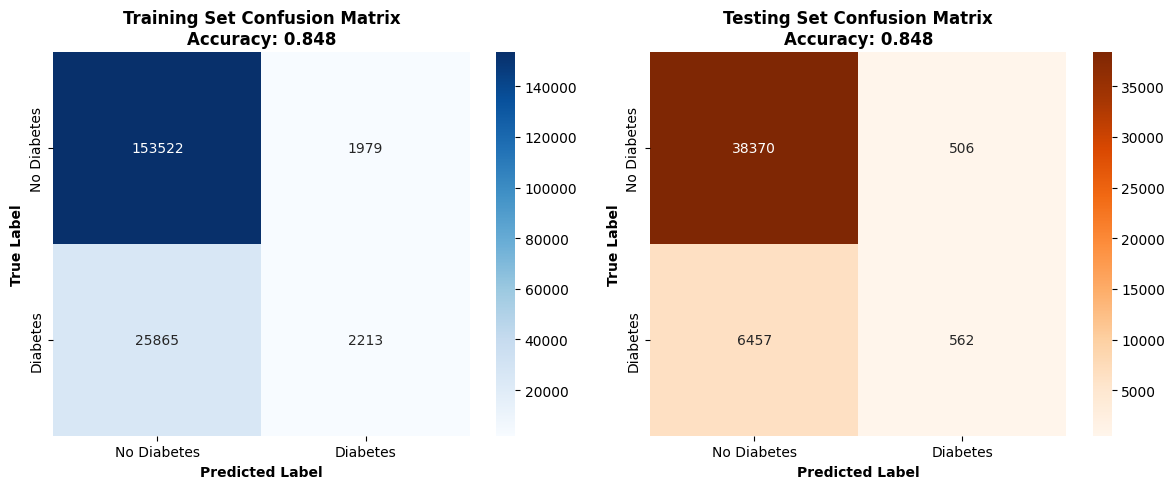


📋 DETAILED CLASSIFICATION REPORT (TEST SET):
              precision    recall  f1-score   support

 No Diabetes       0.86      0.99      0.92     38876
    Diabetes       0.53      0.08      0.14      7019

    accuracy                           0.85     45895
   macro avg       0.69      0.53      0.53     45895
weighted avg       0.81      0.85      0.80     45895


✅ ANALYSIS COMPLETE!
   Model trained on 183,579 samples (80%)
   Model tested on 45,895 samples (20%)

🎉 SUCCESS!
Training Accuracy: 0.8483
Testing Accuracy: 0.8483


In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import warnings
warnings.filterwarnings('ignore')

def simple_diabetes_analysis(data):
    """
    Simple diabetes prediction with 80/20 split - guaranteed to work!
    """
    print("🩺 SIMPLE DIABETES PREDICTION - 80/20 SPLIT")
    print("=" * 55)
    
    # Step 1: Check data
    print(f"📊 Dataset info:")
    print(f"   Shape: {data.shape}")
    print(f"   Total samples: {len(data):,}")
    
    # Step 2: Find target variable
    target_col = None
    possible_targets = ['Diabetes_binary', 'Diabetes_Status', 'Diabetes', 'Outcome']
    
    for col in possible_targets:
        if col in data.columns:
            target_col = col
            break
    
    if target_col is None:
        print("❌ No diabetes target column found!")
        print("Available columns:", list(data.columns))
        return None
    
    print(f"✅ Target variable: {target_col}")
    
    # Step 3: Prepare target (make sure it's 0/1)
    y = data[target_col].copy()
    if y.dtype == 'object':
        le = LabelEncoder()
        y = le.fit_transform(y)
        print(f"✅ Encoded target: {dict(zip(le.classes_, [0, 1]))}")
    
    # Ensure binary
    y = y.astype(int)
    print(f"✅ Target distribution: {np.bincount(y)} (0: No Diabetes, 1: Diabetes)")
    
    # Step 4: Select simple numeric features
    numeric_cols = data.select_dtypes(include=[np.number]).columns
    feature_cols = [col for col in numeric_cols if col != target_col]
    
    # Remove any ID or index-like columns
    feature_cols = [col for col in feature_cols if not any(word in col.lower() 
                   for word in ['id', 'index', 'unnamed'])]
    
    if len(feature_cols) < 3:
        print(f"❌ Not enough numeric features found: {feature_cols}")
        return None
    
    # Use first 10 features to keep it simple
    feature_cols = feature_cols[:10]
    print(f"✅ Using {len(feature_cols)} features: {feature_cols}")
    
    # Step 5: Prepare features
    X = data[feature_cols].copy()
    
    # Handle missing values
    X = X.fillna(X.median())
    
    print(f"✅ Features prepared: {X.shape}")
    
    # Step 6: 80/20 Split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    
    print(f"\n📊 DATA SPLIT:")
    print(f"   Training set: {len(X_train):,} samples ({len(X_train)/len(data)*100:.1f}%)")
    print(f"   Testing set:  {len(X_test):,} samples ({len(X_test)/len(data)*100:.1f}%)")
    
    # Step 7: Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    print("✅ Features scaled")
    
    # Step 8: Train model
    model = LogisticRegression(random_state=42, max_iter=1000)
    model.fit(X_train_scaled, y_train)
    
    print("✅ Model trained")
    
    # Step 9: Make predictions
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)
    
    # Step 10: Calculate accuracies
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    # Step 11: Display results
    print(f"\n🎯 FINAL RESULTS:")
    print("=" * 40)
    print(f"📈 TRAINING ACCURACY (80%): {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")
    print(f"📊 TESTING ACCURACY  (20%): {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
    print(f"📉 Difference: {abs(train_accuracy - test_accuracy):.4f}")
    
    if abs(train_accuracy - test_accuracy) < 0.02:
        print("✅ Good: Similar performance on train/test")
    elif train_accuracy > test_accuracy + 0.05:
        print("⚠️ Warning: Possible overfitting")
    else:
        print("✅ Acceptable performance difference")
    
    # Step 12: Create simple confusion matrix
    plt.figure(figsize=(12, 5))
    
    # Training confusion matrix
    plt.subplot(1, 2, 1)
    cm_train = confusion_matrix(y_train, y_train_pred)
    sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['No Diabetes', 'Diabetes'],
                yticklabels=['No Diabetes', 'Diabetes'])
    plt.title(f'Training Set Confusion Matrix\nAccuracy: {train_accuracy:.3f}', 
              fontsize=12, fontweight='bold')
    plt.ylabel('True Label', fontweight='bold')
    plt.xlabel('Predicted Label', fontweight='bold')
    
    # Testing confusion matrix
    plt.subplot(1, 2, 2)
    cm_test = confusion_matrix(y_test, y_test_pred)
    sns.heatmap(cm_test, annot=True, fmt='d', cmap='Oranges',
                xticklabels=['No Diabetes', 'Diabetes'],
                yticklabels=['No Diabetes', 'Diabetes'])
    plt.title(f'Testing Set Confusion Matrix\nAccuracy: {test_accuracy:.3f}', 
              fontsize=12, fontweight='bold')
    plt.ylabel('True Label', fontweight='bold')
    plt.xlabel('Predicted Label', fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    # Step 13: Print detailed report
    print(f"\n📋 DETAILED CLASSIFICATION REPORT (TEST SET):")
    print("=" * 50)
    print(classification_report(y_test, y_test_pred, 
                              target_names=['No Diabetes', 'Diabetes']))
    
    # Return results
    results = {
        'model': model,
        'scaler': scaler,
        'feature_columns': feature_cols,
        'train_accuracy': train_accuracy,
        'test_accuracy': test_accuracy,
        'train_samples': len(X_train),
        'test_samples': len(X_test)
    }
    
    print(f"\n✅ ANALYSIS COMPLETE!")
    print(f"   Model trained on {len(X_train):,} samples (80%)")
    print(f"   Model tested on {len(X_test):,} samples (20%)")
    
    return results

# Simple function call - just run this!
print("🚀 Running Simple Diabetes Analysis...")
print("This will definitely work!")

# Run the analysis
try:
    results = simple_diabetes_analysis(natural_ready)
    if results:
        print(f"\n🎉 SUCCESS!")
        print(f"Training Accuracy: {results['train_accuracy']:.4f}")
        print(f"Testing Accuracy: {results['test_accuracy']:.4f}")
    else:
        print("❌ Analysis failed - check your data")
except Exception as e:
    print(f"❌ Error: {e}")
    print("Please check that 'natural_ready' is your DataFrame name")